<a href="https://colab.research.google.com/github/kalinajazdzyk/Aplikacja-do-obs-ugi-biblioteki/blob/master/final_magisterka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Połącz z dyskiem google

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## biblioteki

In [ ]:
pip install river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
pip install ucimlrepo

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from river import tree, metrics, drift
from collections import deque
from river.datasets import synth
from river.drift import ADWIN, KSWIN
from river.neighbors import KNNClassifier
from river.tree import HoeffdingAdaptiveTreeClassifier
import river
# from river.ensemble import AdaptiveRandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from ucimlrepo import fetch_ucirepo

def create_and_save_encoders(X, save_path="covertype_encoders.pkl"):
    """Create encoders for categorical columns and save them."""
    encoders = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le  # Save encoder for each column
    joblib.dump(encoders, save_path)  # Save all encoders as a dictionary
    return X

def encode_features(X, encoder_path="covertype_encoders.pkl"):
    """Load encoders and apply them to the features."""
    try:
        encoders = joblib.load(encoder_path)
        for col, le in encoders.items():
            X[col] = le.transform(X[col])
    except FileNotFoundError:
        print(f"Encoders not found. Creating and saving them at {encoder_path}.")
        X = create_and_save_encoders(X, encoder_path)
    return X

def encode_target(y, save_path="covertype_target_encoder.pkl"):
    """Create and save encoder for the target labels."""
    le = LabelEncoder()
    y = le.fit_transform(y)
    joblib.dump(le, save_path)  # Save target encoder
    return y

def load_and_encode_target(y, save_path="covertype_target_encoder.pkl"):
    """Load the target encoder and apply it."""
    try:
        le = joblib.load(save_path)
        return le.transform(y)
    except FileNotFoundError:
        print(f"Target encoder not found. Creating and saving it at {save_path}.")
        return encode_target(y, save_path)

# Load and preprocess the Covertype dataset
def load_covertype_dataset(num_samples):
    covertype = fetch_ucirepo(id=31)
    X, y = covertype.data.features, covertype.data.targets

    # Encode features and target consistently
    X = encode_features(X)
    y = load_and_encode_target(y)

    # Limit dataset to specified number of samples
    return X.iloc[:num_samples], y[:num_samples]


import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from ucimlrepo import fetch_ucirepo

# Load and preprocess the Poker Hand dataset
def create_and_save_encoders(X, save_path="pokerhand_encoders.pkl"):
    """Create encoders for categorical columns and save them."""
    encoders = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le  # Save encoder for each column
    joblib.dump(encoders, save_path)  # Save all encoders
    return X

def encode_features(X, encoder_path="pokerhand_encoders.pkl"):
    """Load encoders and apply them to the features."""
    try:
        encoders = joblib.load(encoder_path)
        for col, le in encoders.items():
            X[col] = le.transform(X[col])
    except FileNotFoundError:
        print(f"Encoders not found. Creating and saving them at {encoder_path}.")
        X = create_and_save_encoders(X, encoder_path)
    return X

def encode_target(y, save_path="pokerhand_target_encoder.pkl"):
    """Create and save encoder for the target labels."""
    le = LabelEncoder()
    y = le.fit_transform(y)
    joblib.dump(le, save_path)
    return y

def load_and_encode_target(y, save_path="pokerhand_target_encoder.pkl"):
    """Load the target encoder and apply it."""
    try:
        le = joblib.load(save_path)
        return le.transform(y)
    except FileNotFoundError:
        print(f"Target encoder not found. Creating and saving it at {save_path}.")
        return encode_target(y, save_path)

def load_pokerhand_dataset(num_samples):
    """Fetch and preprocess the Poker Hand dataset."""
    pokerhand = fetch_ucirepo(id=158)  # Fetch Poker Hand dataset
    X, y = pokerhand.data.features, pokerhand.data.targets

    # Encode features and target labels
    X = encode_features(X)
    y = load_and_encode_target(y)

    # Limit dataset to the specified number of samples
    return X.iloc[:num_samples], y[:num_samples]


## DLBB implementation

In [ ]:
# # z uwzględnieniem średnich do ADWINa
# from collections import deque
# from river import metrics
# from river import drift
# from river.base import DriftDetector

# class DLBBDetector_HATC(DriftDetector):
#     def __init__(self, internal_model_name = 'KNN', K=5, b=10, delay=1000, threshold=0.5,avg_errors = None,n_drift_detected = 0):
#         super().__init__()
#         self.K = K
#         self.b = b
#         self.delay = delay
#         self.threshold = threshold
#         self.D = {}
#         self.errors = deque(maxlen=K)
#         self.inside_errors = deque()
#         self.avg_errors = avg_errors if avg_errors else []
#         self.iteration = 0
#         self.internal_model_name = internal_model_name
#         self.knn_model = tree.HoeffdingAdaptiveTreeClassifier()
#         self.adwin = drift.ADWIN()
#         self.accuracy = metrics.Accuracy()
#         self.accuracies = []
#         self.initail_predictions = {}
#         self.n_drift_detected = n_drift_detected

#     def _hashable_x(self, x_k):
#         if isinstance(x_k, dict):
#             return tuple(sorted(x_k.items()))
#         elif isinstance(x_k, (tuple, list)):
#             return tuple(x_k)
#         else:
#             return x_k

#     def _unhashable_x(self, hashed_x_k):
#         if isinstance(hashed_x_k, tuple) and all(isinstance(i, tuple) and len(i) == 2 for i in hashed_x_k):
#             return dict(hashed_x_k)
#         elif isinstance(hashed_x_k, tuple):
#             return list(hashed_x_k)
#         else:
#             return hashed_x_k

#     def add_prediction(self, x_k, prediction):
#         hashed_x_k = self._hashable_x(x_k)
#         if hashed_x_k not in self.D:
#             self.D[hashed_x_k] = deque(maxlen=self.K)
#         self.D[hashed_x_k].append(prediction)
#     def update(self, value):
#         x_k, y_true = value
#         self._drift_detected = False
#         self.iteration += 1
#         hashed_x_k = self._hashable_x(x_k)

#         # Predict using the model.
#         prediction = self.knn_model.predict_one(x_k)
#         self.add_prediction(x_k, prediction)

#         if y_true is not None:
#             # Online learning step.
#             self.knn_model.learn_one(x_k, y_true)
#             hashed_x_k = self._hashable_x(x_k)
#             y_initial = self.D[hashed_x_k].popleft()
#             # Calculate accuracy
#             self.accuracy.update(y_true, y_initial)
#             self.accuracies.append(self.accuracy.get())

#             # Calculate error
#             error = int(y_initial != y_true)
#             self.errors.append(error)  # Store the error for the window
#             # # Remove stale data if it exists.
#             self.D.pop(hashed_x_k, None)

#         elif self.iteration % self.b == 0:
#             # List comprehension to calculate errors for all keys.
#             errors = [
#                 int(self.knn_model.predict_one(self._unhashable_x(key)) !=
#                     max(set(deq), key=deq.count))
#                 for key, deq in self.D.items()
#             ]
#             avg_error = sum(errors)/len(errors)

#             self.avg_errors.append(avg_error)
#             # Update ADWIN with the average error.
#             self.adwin.update(avg_error)

#             # Check for drift detection.
#             if self.adwin.drift_detected and len(self.accuracies) >= self.delay:
#                 self._drift_detected = True
#                 self.n_drift_detected +=1
#                 # self.adwin = drift.ADWIN() <- tutaj czy ADWIN powinien się resetować???

#             # Add the latest predictions in one batch.
#             predictions = {key: self.knn_model.predict_one(self._unhashable_x(key)) for key in self.D.keys()}
#             for key, pred in predictions.items():
#                 self.add_prediction(key, pred)

#     def clone(self):
#         new_detector = DLBBDetector_HATC(internal_model_name = self.internal_model_name,
#                                          K=self.K, b=self.b, delay=self.delay, threshold=self.threshold, n_drift_detected = self.n_drift_detected)
#         return new_detector
#     def reset(self):
#         """Reset the detector when drift is detected."""
#         self._drift_detected = False

#     @property
#     def drift_detected(self):
#         """Read-only property for drift detection."""
#         return self._drift_detected


In [ ]:
# z uwzględnieniem średnich do ADWINa
from collections import deque
from river import metrics
from river import drift
from river.base import DriftDetector

class DLBBDetector_KNN(DriftDetector):
    def __init__(self, internal_model_name = 'KNN', K=5, b=10, delay=1000, threshold=0.5,avg_errors = None):
        super().__init__()
        self.K = K
        self.b = b
        self.delay = delay
        self.threshold = threshold
        self.D = {}
        self.errors = deque(maxlen=K)
        self.inside_errors = deque()
        self.avg_errors = avg_errors if avg_errors else []
        self.iteration = 0
        self.internal_model_name = internal_model_name
        self.knn_model = KNNClassifier()
        self.adwin = drift.ADWIN()
        self.accuracy = metrics.Accuracy()
        self.accuracies = []
        self.initail_predictions = {}

    def _hashable_x(self, x_k):
        if isinstance(x_k, dict):
            return tuple(sorted(x_k.items()))
        elif isinstance(x_k, (tuple, list)):
            return tuple(x_k)
        else:
            return x_k

    def _unhashable_x(self, hashed_x_k):
        if isinstance(hashed_x_k, tuple) and all(isinstance(i, tuple) and len(i) == 2 for i in hashed_x_k):
            return dict(hashed_x_k)
        elif isinstance(hashed_x_k, tuple):
            return list(hashed_x_k)
        else:
            return hashed_x_k

    def add_prediction(self, x_k, prediction):
        hashed_x_k = self._hashable_x(x_k)
        if hashed_x_k not in self.D:
            self.D[hashed_x_k] = deque(maxlen=self.K)
        self.D[hashed_x_k].append(prediction)
    def update(self, value):
        x_k, y_true = value
        self._drift_detected = False
        self.iteration += 1
        hashed_x_k = self._hashable_x(x_k)

        # Predict using the model.
        prediction = self.knn_model.predict_one(x_k)
        self.add_prediction(x_k, prediction)

        if y_true is not None:
            # Online learning step.
            self.knn_model.learn_one(x_k, y_true)
            hashed_x_k = self._hashable_x(x_k)
            y_initial = self.D[hashed_x_k].popleft()
            # Calculate accuracy
            self.accuracy.update(y_true, y_initial)
            self.accuracies.append(self.accuracy.get())

            # Calculate error
            error = int(y_initial != y_true)
            self.errors.append(error)  # Store the error for the window
            # # Remove stale data if it exists.
            self.D.pop(hashed_x_k, None)

        elif self.iteration % self.b == 0:
            # List comprehension to calculate errors for all keys.
            errors = [
                int(self.knn_model.predict_one(self._unhashable_x(key)) !=
                    max(set(deq), key=deq.count))
                for key, deq in self.D.items()
            ]
            avg_error = sum(errors)/len(errors)

            self.avg_errors.append(avg_error)
            # Update ADWIN with the average error.
            self.adwin.update(avg_error)

            # Check for drift detection.
            if self.adwin.drift_detected and len(self.accuracies) >= self.delay:
                self._drift_detected = True
                # self.adwin = drift.ADWIN() <- tutaj czy ADWIN powinien się resetować???

            # Add the latest predictions in one batch.
            predictions = {key: self.knn_model.predict_one(self._unhashable_x(key)) for key in self.D.keys()}
            for key, pred in predictions.items():
                self.add_prediction(key, pred)

    def clone(self):
        print('Klonujemy')
        new_detector = DLBBDetector_KNN(internal_model_name = self.internal_model_name,
                                         K=self.K, b=self.b, delay=self.delay, threshold=self.threshold)
        return new_detector


In [ ]:
# z uwzględnieniem średnich do ADWINa
from collections import deque
from river import metrics
from river import drift
from river.base import DriftDetector

class DLBBDetector_HATC(DriftDetector):
    def __init__(self, internal_model_name = 'KNN', K=5, b=10, delay=1000, threshold=0.5,avg_errors = None):
        super().__init__()
        self.K = K
        self.b = b
        self.delay = delay
        self.threshold = threshold
        self.D = {}
        self.errors = deque(maxlen=K)
        self.inside_errors = deque()
        self.avg_errors = avg_errors if avg_errors else []
        self.iteration = 0
        self.internal_model_name = internal_model_name
        self.knn_model = tree.HoeffdingAdaptiveTreeClassifier()
        self.adwin = drift.ADWIN()
        self.accuracy = metrics.Accuracy()
        self.accuracies = []
        self.initail_predictions = {}

    def _hashable_x(self, x_k):
        if isinstance(x_k, dict):
            return tuple(sorted(x_k.items()))
        elif isinstance(x_k, (tuple, list)):
            return tuple(x_k)
        else:
            return x_k

    def _unhashable_x(self, hashed_x_k):
        if isinstance(hashed_x_k, tuple) and all(isinstance(i, tuple) and len(i) == 2 for i in hashed_x_k):
            return dict(hashed_x_k)
        elif isinstance(hashed_x_k, tuple):
            return list(hashed_x_k)
        else:
            return hashed_x_k

    def add_prediction(self, x_k, prediction):
        hashed_x_k = self._hashable_x(x_k)
        if hashed_x_k not in self.D:
            self.D[hashed_x_k] = deque(maxlen=self.K)
        self.D[hashed_x_k].append(prediction)
    def update(self, value):
        x_k, y_true = value
        self._drift_detected = False
        self.iteration += 1
        hashed_x_k = self._hashable_x(x_k)

        # Predict using the model.
        prediction = self.knn_model.predict_one(x_k)
        self.add_prediction(x_k, prediction)

        if y_true is not None:
            # Online learning step.
            self.knn_model.learn_one(x_k, y_true)
            hashed_x_k = self._hashable_x(x_k)
            y_initial = self.D[hashed_x_k].popleft()
            # Calculate accuracy
            self.accuracy.update(y_true, y_initial)
            self.accuracies.append(self.accuracy.get())

            # Calculate error
            error = int(y_initial != y_true)
            self.errors.append(error)  # Store the error for the window
            # # Remove stale data if it exists.
            self.D.pop(hashed_x_k, None)

        elif self.iteration % self.b == 0:
            # List comprehension to calculate errors for all keys.
            errors = [
                int(self.knn_model.predict_one(self._unhashable_x(key)) !=
                    max(set(deq), key=deq.count))
                for key, deq in self.D.items()
            ]
            avg_error = sum(errors)/len(errors)

            self.avg_errors.append(avg_error)
            # Update ADWIN with the average error.
            self.adwin.update(avg_error)

            # Check for drift detection.
            if self.adwin.drift_detected and len(self.accuracies) >= self.delay:
                self._drift_detected = True
                # self.adwin = drift.ADWIN() <- tutaj czy ADWIN powinien się resetować???

            # Add the latest predictions in one batch.
            predictions = {key: self.knn_model.predict_one(self._unhashable_x(key)) for key in self.D.keys()}
            for key, pred in predictions.items():
                self.add_prediction(key, pred)

    def clone(self):
        print('Klonujemy')
        new_detector = DLBBDetector_HATC(internal_model_name = self.internal_model_name,
                                         K=self.K, b=self.b, delay=self.delay, threshold=self.threshold)
        return new_detector


In [ ]:
# z uwzględnieniem średnich do ADWINa
from collections import deque
from river import metrics
from river import drift
from river.base import DriftDetector

class DLBBDetector_HTC(DriftDetector):
    def __init__(self, internal_model_name = 'KNN', K=5, b=10, delay=1000, threshold=0.5,avg_errors = None):
        super().__init__()
        self.K = K
        self.b = b
        self.delay = delay
        self.threshold = threshold
        self.D = {}
        self.errors = deque(maxlen=K)
        self.inside_errors = deque()
        self.avg_errors = avg_errors if avg_errors else []
        self.iteration = 0
        self.internal_model_name = internal_model_name
        self.knn_model = tree.HoeffdingTreeClassifier()
        self.adwin = drift.ADWIN()
        self.accuracy = metrics.Accuracy()
        self.accuracies = []
        self.initail_predictions = {}

    def _hashable_x(self, x_k):
        if isinstance(x_k, dict):
            return tuple(sorted(x_k.items()))
        elif isinstance(x_k, (tuple, list)):
            return tuple(x_k)
        else:
            return x_k

    def _unhashable_x(self, hashed_x_k):
        if isinstance(hashed_x_k, tuple) and all(isinstance(i, tuple) and len(i) == 2 for i in hashed_x_k):
            return dict(hashed_x_k)
        elif isinstance(hashed_x_k, tuple):
            return list(hashed_x_k)
        else:
            return hashed_x_k

    def add_prediction(self, x_k, prediction):
        hashed_x_k = self._hashable_x(x_k)
        if hashed_x_k not in self.D:
            self.D[hashed_x_k] = deque(maxlen=self.K)
        self.D[hashed_x_k].append(prediction)
    def update(self, value):
        x_k, y_true = value
        self._drift_detected = False
        self.iteration += 1
        hashed_x_k = self._hashable_x(x_k)

        # Predict using the model.
        prediction = self.knn_model.predict_one(x_k)
        self.add_prediction(x_k, prediction)

        if y_true is not None:
            # Online learning step.
            self.knn_model.learn_one(x_k, y_true)
            hashed_x_k = self._hashable_x(x_k)
            y_initial = self.D[hashed_x_k].popleft()
            # Calculate accuracy
            self.accuracy.update(y_true, y_initial)
            self.accuracies.append(self.accuracy.get())

            # Calculate error
            error = int(y_initial != y_true)
            self.errors.append(error)  # Store the error for the window
            # # Remove stale data if it exists.
            self.D.pop(hashed_x_k, None)

        elif self.iteration % self.b == 0:
            # List comprehension to calculate errors for all keys.
            errors = [
                int(self.knn_model.predict_one(self._unhashable_x(key)) !=
                    max(set(deq), key=deq.count))
                for key, deq in self.D.items()
            ]
            avg_error = sum(errors)/len(errors)

            self.avg_errors.append(avg_error)
            # Update ADWIN with the average error.
            self.adwin.update(avg_error)

            # Check for drift detection.
            if self.adwin.drift_detected and len(self.accuracies) >= self.delay:
                self._drift_detected = True
                # self.adwin = drift.ADWIN() <- tutaj czy ADWIN powinien się resetować???

            # Add the latest predictions in one batch.
            predictions = {key: self.knn_model.predict_one(self._unhashable_x(key)) for key in self.D.keys()}
            for key, pred in predictions.items():
                self.add_prediction(key, pred)

    def clone(self):
        print('Klonujemy')
        new_detector = DLBBDetector_HTC(internal_model_name = self.internal_model_name,
                                         K=self.K, b=self.b, delay=self.delay, threshold=self.threshold)
        return new_detector


## experiment function (run)

In [ ]:
from ucimlrepo import fetch_ucirepo
from river import stream
import pandas as pd
import io
import requests

def load_covertype_dataset():
  # Fetch the Covertype dataset
  covertype = fetch_ucirepo(id=31)

  # Data URL from UCI repository
  data_url = "https://archive.ics.uci.edu/static/public/31/data.csv"

  # Download the dataset directly into a pandas DataFrame
  response = requests.get(data_url)
  data = pd.read_csv(io.StringIO(response.text))

  # Separate features (X) and targets (y)
  X = data.drop(columns='Cover_Type')
  y = data['Cover_Type']

  # Print metadata (optional)
  print(covertype.metadata)

  # Now create a stream from the DataFrame directly
  covertype_stream = stream.iter_pandas(X, y)
  return covertype_stream


def load_pokerhand_dataset():
  # Fetch the Covertype dataset
  pokerhand = fetch_ucirepo(id=158)

  # Data URL from UCI repository
  data_url = "https://archive.ics.uci.edu/static/public/158/data.csv"

  # Download the dataset directly into a pandas DataFrame
  response = requests.get(data_url)
  data = pd.read_csv(io.StringIO(response.text))

  # Separate features (X) and targets (y)
  X = data.drop(columns='CLASS')
  y = data['CLASS']

  # Print metadata (optional)
  print(pokerhand.metadata)

  # Now create a stream from the DataFrame directly
  pokerhand_stream = stream.iter_pandas(X, y)
  return pokerhand_stream


In [ ]:
# import time
# from ucimlrepo import fetch_ucirepo
# from river import forest, metrics
# import os
# import urllib

# images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/spr_diff_models_inside'
# # Cache dictionary to store loaded datasets
# dataset_cache = {}
# def run_experiment(model_name,drift_detector, detector_name, num_samples, delay, dataset_name):
#     global dataset_cache
#     if dataset_name in dataset_cache:
#         # Use the cached version if available
#         dataset = dataset_cache[dataset_name]
#     elif dataset_name == 'PokerHand':
#       dataset = load_pokerhand_dataset()
#       dataset_cache[dataset_name] = dataset

#     elif dataset_name == 'Covertype':
#       dataset = load_covertype_dataset()
#       dataset_cache[dataset_name] = dataset
#     elif dataset_name == 'Sine':
#       dataset = synth.ConceptDriftStream(
#           stream=synth.Sine(classification_function=1, seed=112),
#           drift_stream=synth.Sine(classification_function=2, seed=112),
#           seed=112, position=0.6*num_samples, width=100)
#     elif dataset_name == 'Sine2.0':
#       dataset = synth.ConceptDriftStream(
#           stream=synth.Sine(classification_function=1, seed=22),
#           drift_stream=synth.Sine(classification_function=2, seed=22),
#           seed=112, position=0.6*num_samples, width=100)
#     elif dataset_name == 'Agrawal':
#       dataset = synth.ConceptDriftStream(
#           stream=synth.Agrawal(classification_function=1, seed=112),
#           drift_stream=synth.Agrawal(classification_function=2, seed=112),
#           seed=112, position=0.6*num_samples, width=100)
#     elif dataset_name == 'Stagger':
#        dataset = synth.ConceptDriftStream(
#           stream=synth.STAGGER(classification_function=1, seed=112),
#           drift_stream=synth.STAGGER(classification_function=2, seed=112),
#           seed=112, position=0.6*num_samples, width=100)
#     elif dataset_name == "Hyperplane":
#       dataset = synth.Hyperplane(seed=112, n_features=10, n_drift_features=2, mag_change=0.1, noise_percentage=0.1)
#     elif dataset_name == 'Elec2':
#       dataset = river.datasets.Elec2()
#       dataset_cache[dataset_name] = dataset
#     elif dataset_name == 'CreditCard':
#       dataset = river.datasets.CreditCard()
#       dataset_cache[dataset_name] = dataset
#     else:
#       print(f'Wrong dataset name: {dataset_name}')

#     print(f'Dataset: {dataset_name}')
#     print(f'Model: {model_name}')
#     print(f'Inside model: {inside_model}')
#     print(f'Detector: {detector_name}')
#     print(drift_detector)
#     if drift_detector:
#       if detector_name != 'DLBB':
#         if model_name == 'HATC':
#           model = tree.HoeffdingAdaptiveTreeClassifier(
#           drift_detector=drift_detector,
#           seed = 112
#           )
#         elif model_name == 'ARF':
#           model = forest.ARFClassifier(seed=112, drift_detector = drift_detector)
#       elif detector_name == 'DLBB':
#         if model_name == 'HATC':
#           model = tree.HoeffdingAdaptiveTreeClassifier(
#           drift_detector=drift_detector,
#           seed = 112
#           )
#         elif model_name == 'ARF':
#           model = ModifiedARFClassifier(seed=112, drift_detector = DLBBDetector_HTC(inside_model,K=K, b=10), warning_detector = None)

#         print(model)
#         print(model.drift_detector.knn_model)
#       else:
#         if model_name == 'HATC':
#           model = tree.HoeffdingAdaptiveTreeClassifier(
#           drift_detector=drift.NoDrift(),
#           seed = 112
#           )
#         elif model_name == 'ARF':
#           model = forest.ARFClassifier(seed=112, drift_detector = drift.NoDrift())
#     else:
#       print('Nie wybrano detektora, model HATC bez detektora')
#       model = tree.HoeffdingAdaptiveTreeClassifier(
#       seed = 112
#       )

#     metric_accuracy = metrics.Accuracy()
#     metric_f1 = metrics.F1()
#     metric_precision = metrics.Precision()
#     metric_recall = metrics.Recall()
#     metric_kappa = metrics.CohenKappa()

#     drift_detections = []
#     accuracies = []
#     f1 = []
#     presicion = []
#     recall = []
#     kappa = []
#     manual_accuracies = []
#     timestamps = []
#     avg_errors_inside = []
#     predictions = []
#     true_labels = []

#     label_queue = deque()
#     x_queue = deque()
#     initial_prediction = deque()

#     correct_predictions = 0
#     total_predictions = 0

#     for i, (x, y) in enumerate(dataset):
#         model_id_before = id(model)
#         # Delay label by `delay`
#         label_queue.append(y)
#         x_queue.append(x)
#         # Predict using current data
#         y_pred = model.predict_one(x)
#         initial_prediction.append(y_pred)
#         predictions.append(y_pred)
#         true_labels.append(y)

#         if detector_name == "DLBB":
#           model.drift_detector.update(x)
#           if model.drift_detector.drift_detected:
#             drift_detections.append({
#                 "index": i,
#                 "accuracy": metric_accuracy.get(),
#                 "f1": metric_f1.get(),
#                 "precision": metric_precision.get(),
#                 "f1": metric_recall.get(),
#                 "f1": metric_kappa.get()
#             })
#             print(model.drift_detector)
#             print(model.drift_detector.drift_detected)
#             print(f"🚨🚨🚨 Drift detected at instance {i}")
#             for instance in model._drift_detectors:
#             #   instance._drift_detected = model.drift_detector.drift_detected

#               print(instance.drift_detected)


#         # # Only start learning when we have enough labels in the queue, after 1000 instances start learning
#         if len(label_queue) == delay:
#           delayed_y = label_queue.popleft()  # Pop the delayed label
#           delayed_x = x_queue.popleft()
#           initial_pred = initial_prediction.popleft()
#           # model learing as well as drift detection beeing send to classifier
#           if model.drift_detector.drift_detected:
#             print(f'Iteration: {i}, detected?: {model.drift_detector.drift_detected}')
#             print(model.n_drifts_detected())
#           model.learn_one(delayed_x, delayed_y)
#           if model.drift_detector.drift_detected:
#             print(f'Iteration: {i}, detected?: {model.drift_detector.drift_detected}')
#             print(model.n_drifts_detected())
#           metric_accuracy.update(delayed_y, initial_pred)
#           metric_f1.update(delayed_y, initial_pred)
#           metric_precision.update(delayed_y, initial_pred)
#           metric_recall.update(delayed_y, initial_pred)
#           metric_kappa.update(delayed_y, initial_pred)

#           if detector_name == "ADWIN" or detector_name == "KSWIN":
#               # For ADWIN, use the error rate as the metric
#               error = int(initial_pred != delayed_y)
#               model.drift_detector.update(error)
#               if model.drift_detector.drift_detected:
#                   drift_detections.append({
#                       "index": i,
#                       "accuracy": metric_accuracy.get(),
#                       "f1": metric_f1.get(),
#                       "precision": metric_precision.get(),
#                       "f1": metric_recall.get(),
#                       "f1": metric_kappa.get()
#                   })

#                   print(f"🚨 Drift detected at instance {i}")
#                   for instance in model._drift_detectors:
#                     print(instance.drift_detected)
#               avg_errors_inside.append(error)

#           elif detector_name == "DLBB":
#               # For DLBB, use the custom update method
#               model.drift_detector.update(delayed_x, delayed_y)
#               if model.drift_detector.drift_detected:
#                   drift_detections.append({
#                       "index": i,
#                       "accuracy": metric_accuracy.get(),
#                       "f1": metric_f1.get(),
#                       "precision": metric_precision.get(),
#                       "f1": metric_recall.get(),
#                       "f1": metric_kappa.get()
#                   })

#                   print(f"🚨 Drift detected at instance {i}")
#                   for instance in model._drift_detectors:
#                     # instance.drift_detected = model.drift_detector.drift_detected
#                     print(instance.drift_detected)
#                   model.learn_one(delayed_x, delayed_y)
#               avg_errors_inside.append(model.drift_detector.avg_errors[-1])

#           accuracies.append(metric_accuracy.get())
#           f1.append(metric_f1.get())
#           presicion.append(metric_precision.get())
#           recall.append(metric_recall.get())
#           kappa.append(metric_kappa.get())

#           timestamps.append(i)
#         if i == num_samples:
#             break
#     print(f'Accuracy: {metric_accuracy},F1: {metric_f1}, Precision: {metric_precision} Recall: {metric_recall}')
#     return {
#         "detector": detector_name,
#         "accuracy": accuracies,
#         "internal_model_accuracy": model.drift_detector.accuracies if detector_name == "DLBB" else detector_name,
#         "f1":f1,
#         "presicion":presicion,
#         "recall":recall,
#         "kappa":kappa,
#         "timestamps": timestamps,
#         "drift_detections": drift_detections,
#         'errors_inside_detector':avg_errors_inside if avg_errors_inside else detector_name,
#         "predictions": predictions
#     }



In [ ]:
import time
from ucimlrepo import fetch_ucirepo
from river import forest, metrics
import os
import urllib

images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/spr_diff_models_inside'
# Cache dictionary to store loaded datasets
dataset_cache = {}
def run_experiment(model_name,drift_detector, detector_name, num_samples, delay, dataset_name):
    global dataset_cache
    if dataset_name in dataset_cache:
        # Use the cached version if available
        dataset = dataset_cache[dataset_name]
    elif dataset_name == 'PokerHand':
      dataset = load_pokerhand_dataset()
      dataset_cache[dataset_name] = dataset

    elif dataset_name == 'Covertype':
      dataset = load_covertype_dataset()
      dataset_cache[dataset_name] = dataset
    elif dataset_name == 'Sine':
      dataset = synth.ConceptDriftStream(
          stream=synth.Sine(classification_function=1, seed=112),
          drift_stream=synth.Sine(classification_function=2, seed=112),
          seed=112, position=0.6*num_samples, width=100)
    elif dataset_name == 'Sine2.0':
      dataset = synth.ConceptDriftStream(
          stream=synth.Sine(classification_function=1, seed=22),
          drift_stream=synth.Sine(classification_function=2, seed=22),
          seed=112, position=0.6*num_samples, width=100)
    elif dataset_name == 'Sine3.0':
      dataset = synth.ConceptDriftStream(
          stream=synth.Sine(classification_function=3, seed=22),
          drift_stream=synth.Sine(classification_function=4, seed=22),
          seed=112, position=0.6*num_samples, width=100)
    elif dataset_name == 'Agrawal':
      dataset = synth.ConceptDriftStream(
          stream=synth.Agrawal(classification_function=1, seed=112),
          drift_stream=synth.Agrawal(classification_function=2, seed=112),
          seed=112, position=0.6*num_samples, width=100)
    elif dataset_name == 'Stagger':
       dataset = synth.ConceptDriftStream(
          stream=synth.STAGGER(classification_function=1, seed=112),
          drift_stream=synth.STAGGER(classification_function=2, seed=112),
          seed=112, position=0.6*num_samples, width=100)
    elif dataset_name == "Hyperplane":
      dataset = synth.Hyperplane(seed=112, n_features=10, n_drift_features=2, mag_change=0.1, noise_percentage=0.1)
    elif dataset_name == "Hyperplane_2":
      dataset = synth.Hyperplane(seed=112, n_features=2)
    elif dataset_name == "Hyperplane_5":
      dataset = synth.Hyperplane(seed=112, n_features=5)
    elif dataset_name == "Hyperplane_10":
      dataset = synth.Hyperplane(seed=112, n_features=10)
    elif dataset_name == "Hyperplane_20":
      dataset = synth.Hyperplane(seed=112, n_features=20)
    elif dataset_name == "Hyperplane_50":
      dataset = synth.Hyperplane(seed=112, n_features=50)
    elif dataset_name == "Hyperplane_100":
      dataset = synth.Hyperplane(seed=112, n_features=100)
    elif dataset_name == "Hyperplane_200":
      dataset = synth.Hyperplane(seed=112, n_features=200)
    elif dataset_name == 'Elec2':
      dataset = river.datasets.Elec2()
      dataset_cache[dataset_name] = dataset
    elif dataset_name == 'CreditCard':
      dataset = river.datasets.CreditCard()
      dataset_cache[dataset_name] = dataset
    else:
      print(f'Wrong dataset name: {dataset_name}')

    print(f'Dataset: {dataset_name}')
    print(f'Model: {model_name}')
    print(f'Inside model: {inside_model}')
    print(f'Detector: {detector_name}')
    print(drift_detector)
    if drift_detector:
      if detector_name != 'DLBB':
        if model_name == 'HATC':
          model = tree.HoeffdingAdaptiveTreeClassifier(
          drift_detector=drift_detector,
          seed = 112
          )
        elif model_name == 'ARF':
          model = forest.ARFClassifier(seed=112, drift_detector = drift_detector)
      elif detector_name == 'DLBB':
        if model_name == 'HATC':
          model = tree.HoeffdingAdaptiveTreeClassifier(
          drift_detector=drift_detector,
          seed = 112
          )
        elif model_name == 'ARF':
          model = ModifiedARFClassifier(seed=112, drift_detector = drift_detector, warning_detector = None)

        print(model)
        print(model.drift_detector.knn_model)
      else:
        if model_name == 'HATC':
          model = tree.HoeffdingAdaptiveTreeClassifier(
          drift_detector=drift.NoDrift(),
          seed = 112
          )
        elif model_name == 'ARF':
          model = forest.ARFClassifier(seed=112, drift_detector = drift.NoDrift())
    else:
      print('Nie wybrano detektora, model HATC bez detektora')
      model = tree.HoeffdingAdaptiveTreeClassifier(
      seed = 112
      )

    metric_accuracy = metrics.Accuracy()
    metric_f1 = metrics.F1()
    metric_precision = metrics.Precision()
    metric_recall = metrics.Recall()
    metric_kappa = metrics.CohenKappa()

    drift_detections = []
    accuracies = []
    f1 = []
    presicion = []
    recall = []
    kappa = []
    manual_accuracies = []
    timestamps = []
    avg_errors_inside = []
    predictions = []

    label_queue = deque()
    x_queue = deque()
    initial_prediction = deque()

    for i, (x, y) in enumerate(dataset):
        # Delay label by `delay`
        label_queue.append(y)
        x_queue.append(x)
        # Predict using current data
        y_pred = model.predict_one(x)
        initial_prediction.append(y_pred)
        predictions.append(y_pred)
        # detector update for new arriving instaces
        if detector_name == "DLBB":
          models_drift_detected = {i: model.n_drifts_detected(i) for i,_ in enumerate(model._drift_detectors)}
          model.drift_update_delay(x)
          # print(models_drift_detected)
          for model_idx, m in enumerate(model._drift_detectors):
            if model.n_drifts_detected(model_idx) != models_drift_detected[model_idx]:
              drift_detections.append({
                  'model_idx': model_idx,
                  "index": i,
                  "accuracy": metric_accuracy.get(),
                  "f1": metric_f1.get(),
                  "precision": metric_precision.get(),
                  "f1": metric_recall.get(),
                  "f1": metric_kappa.get()
              })
              print(f"🚨 Drift detected at instance {i} with model: {model_idx}")


        # # Only start learning when we have enough labels in the queue, after 1000 instances start learning
        if len(label_queue) == delay:
          delayed_y = label_queue.popleft()  # Pop the delayed label
          delayed_x = x_queue.popleft()
          initial_pred = initial_prediction.popleft()

          # model learing as well as drift detection beeing send to classifier
          # river libraray update method for drift detector ovverriden
          # for DLBB nothing happend when learn_one function is used

          models_drift_detected = {i: model.n_drifts_detected(i) for i,_ in enumerate(model._drift_detectors)}
          model.learn_one(delayed_x, delayed_y)


          metric_accuracy.update(delayed_y, initial_pred)
          metric_f1.update(delayed_y, initial_pred)
          metric_precision.update(delayed_y, initial_pred)
          metric_recall.update(delayed_y, initial_pred)
          metric_kappa.update(delayed_y, initial_pred)

          if detector_name == "ADWIN" or detector_name == "KSWIN":
              # For ADWIN, use the error rate as the metric
              error = int(initial_pred != delayed_y)
              for model_idx, m in enumerate(model._drift_detectors):
                if model.n_drifts_detected(model_idx) != models_drift_detected[model_idx]:
                  drift_detections.append({
                      'model_idx': model_idx,
                      "index": i,
                      "accuracy": metric_accuracy.get(),
                      "f1": metric_f1.get(),
                      "precision": metric_precision.get(),
                      "f1": metric_recall.get(),
                      "f1": metric_kappa.get()
                  })
                  print(f"🚨🚨🚨 Drift detected at instance {i} with model: {model_idx}")

              avg_errors_inside.append(error)

          elif detector_name == "DLBB":

            # For DLBB, use the custom update method
            model.drift_detector.update((delayed_x, delayed_y))
            for model_idx, m in enumerate(model._drift_detectors):
              if model.n_drifts_detected(model_idx) != models_drift_detected[model_idx]:
                drift_detections.append({
                    'model_idx': model_idx,
                    "index": i,
                    "accuracy": metric_accuracy.get(),
                    "f1": metric_f1.get(),
                    "precision": metric_precision.get(),
                    "f1": metric_recall.get(),
                    "f1": metric_kappa.get()
                })
                print(f"🚨🚨🚨 Drift detected at instance {i} with model: {model_idx}")

              try:
                avg_errors_inside.append(model._drift_detectors[0].avg_errors[-1])
              except Exception:
                avg_errors_inside.append(None)

          accuracies.append(metric_accuracy.get())
          f1.append(metric_f1.get())
          presicion.append(metric_precision.get())
          recall.append(metric_recall.get())
          kappa.append(metric_kappa.get())

          timestamps.append(i)
        if i == num_samples:
            break
    print(f'Accuracy: {metric_accuracy},F1: {metric_f1}, Precision: {metric_precision} Recall: {metric_recall}')
    return {
        "detector": detector_name,
        "accuracy": accuracies,
        "internal_model_accuracy": model.drift_detector.accuracies if detector_name == "DLBB" else detector_name,
        "f1":f1,
        "presicion":presicion,
        "recall":recall,
        "kappa":kappa,
        "timestamps": timestamps,
        "drift_detections": drift_detections,
        'errors_inside_detector':avg_errors_inside if avg_errors_inside else detector_name,
        "predictions": predictions
    }



## Hyperparams

In [ ]:
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'

# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
datasets = ['Sine2.0','Stagger','Agrawal', 'Hyperplane','Elec2','PokerHand',"Covertype"]
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = delay  # DLBBDetector parameter

In [ ]:
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'
datasets = ["Covertype"]
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = delay  # DLBBDetector parameter

## function from river library

In [ ]:
from __future__ import annotations

import abc
import collections
import copy
import math
import random
import typing

import numpy as np

from river import base, metrics, stats
from river.drift import ADWIN, NoDrift
from river.tree.hoeffding_tree_classifier import HoeffdingTreeClassifier
from river.tree.hoeffding_tree_regressor import HoeffdingTreeRegressor
from river.tree.nodes.arf_htc_nodes import (
    RandomLeafMajorityClass,
    RandomLeafNaiveBayes,
    RandomLeafNaiveBayesAdaptive,
)
from river.tree.nodes.arf_htr_nodes import RandomLeafAdaptive, RandomLeafMean, RandomLeafModel
from river.tree.splitter import Splitter
from river.utils.random import poisson
from river.base import Classifier

class BaseForest(base.Ensemble):
    _FEATURES_SQRT = "sqrt"
    _FEATURES_LOG2 = "log2"

    def __init__(
        self,
        n_models: int,
        max_features: bool | str | int,
        lambda_value: int,
        drift_detector: base.DriftDetector,
        warning_detector: base.DriftDetector,
        metric: metrics.base.MultiClassMetric | metrics.base.RegressionMetric,
        disable_weighted_vote,
        seed,
    ):
        super().__init__([])  # type: ignore
        self.n_models = n_models
        self.max_features = max_features
        self.lambda_value = lambda_value
        self.metric = metric
        self.disable_weighted_vote = disable_weighted_vote
        self.drift_detector = drift_detector
        self.warning_detector = warning_detector
        self.seed = seed

        self._rng = random.Random(self.seed)

        self._warning_detectors: list[base.DriftDetector]
        self._warning_detection_disabled = True
        if not isinstance(self.warning_detector, NoDrift):
            self._warning_detectors = [self.warning_detector.clone() for _ in range(self.n_models)]
            self._warning_detection_disabled = False

        self._drift_detectors: list[base.DriftDetector]
        self._drift_detection_disabled = True
        if not isinstance(self.drift_detector, NoDrift):
            self._drift_detectors = [self.drift_detector.clone() for _ in range(self.n_models)]
            self._drift_detection_disabled = False

        # The background models
        self._background: list[BaseTreeClassifier  | None] = (
            None if self._warning_detection_disabled else [None] * self.n_models  # type: ignore
        )

        # Performance metrics used for weighted voting/aggregation
        self._metrics = [self.metric.clone() for _ in range(self.n_models)]

        # Drift and warning logging
        self._warning_tracker: dict = (
            collections.defaultdict(int) if not self._warning_detection_disabled else None  # type: ignore
        )
        self._drift_tracker: dict = (
            collections.defaultdict(int) if not self._drift_detection_disabled else None  # type: ignore
        )


    @property
    def _min_number_of_models(self):
        return 0

    @classmethod
    def _unit_test_params(cls):
        yield {"n_models": 3}

    def _unit_test_skips(self):
        return {"check_shuffle_features_no_impact"}

    @abc.abstractmethod
    def _drift_detector_input(
        self,
        tree_id: int,
        y_true,
        y_pred,
    ) -> tuple:
        raise NotImplementedError

    @abc.abstractmethod
    def _new_base_model(self) -> BaseTreeClassifier:
        raise NotImplementedError

    def n_warnings_detected(self, tree_id: int | None = None) -> int:
        """Get the total number of concept drift warnings detected, or the number on an individual
        tree basis (optionally).

        Parameters
        ----------
        tree_id
            The number of the base learner in the ensemble: `[0, self.n_models - 1]. If `None`,
            the total number of warnings is returned instead.

        Returns
        -------
            The number of concept drift warnings detected.

        """

        if self._warning_detection_disabled:
            return 0

        if tree_id is None:
            return sum(self._warning_tracker.values())

        return self._warning_tracker[tree_id]

    def n_drifts_detected(self, tree_id: int | None = None) -> int:
        """Get the total number of concept drifts detected, or such number on an individual
        tree basis (optionally).

        Parameters
        ----------
        tree_id
            The number of the base learner in the ensemble: `[0, self.n_models - 1]. If `None`,
            the total number of warnings is returned instead.

        Returns
        -------
            The number of concept drifts detected.

        """

        if self._drift_detection_disabled:
            return 0

        if tree_id is None:
            return sum(self._drift_tracker.values())

        return self._drift_tracker[tree_id]

    def learn_one(self, x: dict, y: base.typing.Target, **kwargs):
          if len(self) == 0:
              self._init_ensemble(sorted(x.keys()))

          for i, model in enumerate(self):
              y_pred = model.predict_one(x)

              # Update performance evaluator
              self._metrics[i].update(
                  y_true=y,
                  y_pred=(
                      model.predict_proba_one(x)
                      if isinstance(self.metric, metrics.base.ClassificationMetric)
                      and not self.metric.requires_labels
                      else y_pred
                  ),
              )

              k = poisson(rate=self.lambda_value, rng=self._rng)
              if k > 0:
                  if not self._warning_detection_disabled and self._background[i] is not None:
                      self._background[i].learn_one(x=x, y=y, w=k)  # type: ignore

                  model.learn_one(x=x, y=y, w=k)

                  drift_input = None

                  if not self._drift_detection_disabled:
                      drift_input = (
                          drift_input
                          if drift_input is not None
                          else self._drift_detector_input(i, x, y)
                      )
                      self._drift_detectors[i].update(drift_input)

                      if self._drift_detectors[i].drift_detected:
                          print(f'Drift detected by detector: {i}')
                          self.data[i] = self._new_base_model()
                          self._drift_detectors[i] = self.drift_detector.clone()
                          self._metrics[i] = self.metric.clone()

                          # Update warning tracker
                          self._drift_tracker[i] += 1
    def drift_update_delay(self,x):
      for i, model in enumerate(self):
        drift_input = None
        if not self._drift_detection_disabled:
            drift_input = (
                drift_input
                if drift_input is not None
                else self._drift_detector_input(i, x, None)
            )
            self._drift_detectors[i].update(drift_input)

            if self._drift_detectors[i].drift_detected:
              print(f'@Drift detected by detector: {i}')
              self.data[i] = self._new_base_model()
              self._drift_detectors[i] = self.drift_detector.clone()
              self._metrics[i] = self.metric.clone()

              # Update warning tracker
              self._drift_tracker[i] += 1

    def _init_ensemble(self, features: list):
        self._set_max_features(len(features))
        self.data = [self._new_base_model() for _ in range(self.n_models)]

    def _set_max_features(self, n_features):
        if self.max_features == "sqrt":
            self.max_features = round(math.sqrt(n_features))
        elif self.max_features == "log2":
            self.max_features = round(math.log2(n_features))
        elif isinstance(self.max_features, int):
            # Consider 'max_features' features at each split.
            pass
        elif isinstance(self.max_features, float):
            # Consider 'max_features' as a percentage
            self.max_features = int(self.max_features * n_features)
        elif self.max_features is None:
            self.max_features = n_features
        else:
            raise AttributeError(
                f"Invalid max_features: {self.max_features}.\n"
                f"Valid options are: int [2, M], float (0., 1.],"
                f" {self._FEATURES_SQRT}, {self._FEATURES_LOG2}"
            )
        # Sanity checks
        # max_features is negative, use max_features + n
        if self.max_features < 0:
            self.max_features += n_features
        # max_features <= 0
        # (m can be negative if max_features is negative and abs(max_features) > n),
        # use max_features = 1
        if self.max_features <= 0:
            self.max_features = 1
        # max_features > n, then use n
        if self.max_features > n_features:
            self.max_features = n_features


class BaseTreeClassifier(HoeffdingTreeClassifier):
    """Adaptive Random Forest Hoeffding Tree Classifier.

    This is the base-estimator of the Adaptive Random Forest classifier.
    This variant of the Hoeffding Tree classifier includes the `max_features`
    parameter, which defines the number of randomly selected features to be
    considered at each split.

    """

    def __init__(
        self,
        max_features: int = 2,
        grace_period: int = 200,
        max_depth: int | None = None,
        split_criterion: str = "info_gain",
        delta: float = 1e-7,
        tau: float = 0.05,
        leaf_prediction: str = "nba",
        nb_threshold: int = 0,
        nominal_attributes: list | None = None,
        splitter: Splitter | None = None,
        binary_split: bool = False,
        min_branch_fraction: float = 0.01,
        max_share_to_split: float = 0.99,
        max_size: float = 100.0,
        memory_estimate_period: int = 1000000,
        stop_mem_management: bool = False,
        remove_poor_attrs: bool = False,
        merit_preprune: bool = True,
        rng: random.Random | None = None,
    ):
        super().__init__(
            grace_period=grace_period,
            max_depth=max_depth,
            split_criterion=split_criterion,
            delta=delta,
            tau=tau,
            leaf_prediction=leaf_prediction,
            nb_threshold=nb_threshold,
            nominal_attributes=nominal_attributes,
            splitter=splitter,
            binary_split=binary_split,
            min_branch_fraction=min_branch_fraction,
            max_share_to_split=max_share_to_split,
            max_size=max_size,
            memory_estimate_period=memory_estimate_period,
            stop_mem_management=stop_mem_management,
            remove_poor_attrs=remove_poor_attrs,
            merit_preprune=merit_preprune,
        )

        self.max_features = max_features
        self.rng = rng

    def _new_leaf(self, initial_stats=None, parent=None):
        if initial_stats is None:
            initial_stats = {}

        if parent is None:
            depth = 0
        else:
            depth = parent.depth + 1

        if self._leaf_prediction == self._MAJORITY_CLASS:
            return RandomLeafMajorityClass(
                initial_stats,
                depth,
                self.splitter,
                self.max_features,
                self.rng,
            )
        elif self._leaf_prediction == self._NAIVE_BAYES:
            return RandomLeafNaiveBayes(
                initial_stats,
                depth,
                self.splitter,
                self.max_features,
                self.rng,
            )
        else:  # NAIVE BAYES ADAPTIVE (default)
            return RandomLeafNaiveBayesAdaptive(
                initial_stats,
                depth,
                self.splitter,
                self.max_features,
                self.rng,
            )

class ModifiedARFClassifier(BaseForest, Classifier):
    def __init__(
        self,
        n_models: int = 10,
        max_features: bool | str | int = "sqrt",
        lambda_value: int = 6,
        metric: metrics.base.MultiClassMetric | None = None,
        disable_weighted_vote=False,
        drift_detector: base.DriftDetector | None = None,
        warning_detector: base.DriftDetector | None = None,
        # Tree parameters
        grace_period: int = 50,
        max_depth: int | None = None,
        split_criterion: str = "info_gain",
        delta: float = 0.01,
        tau: float = 0.05,
        leaf_prediction: str = "nba",
        nb_threshold: int = 0,
        nominal_attributes: list | None = None,
        splitter: Splitter | None = None,
        binary_split: bool = False,
        min_branch_fraction: float = 0.01,
        max_share_to_split: float = 0.99,
        max_size: float = 100.0,
        memory_estimate_period: int = 2_000_000,
        stop_mem_management: bool = False,
        remove_poor_attrs: bool = False,
        merit_preprune: bool = True,
        seed: int | None = None,
    ):
        super().__init__(
            n_models=n_models,
            max_features=max_features,
            lambda_value=lambda_value,
            metric=metric or metrics.Accuracy(),
            disable_weighted_vote=disable_weighted_vote,
            drift_detector=drift_detector or ADWIN(delta=0.001),
            warning_detector=warning_detector or ADWIN(delta=0.01),
            seed=seed,
        )

        # Tree parameters
        self.grace_period = grace_period
        self.max_depth = max_depth
        self.split_criterion = split_criterion
        self.delta = delta
        self.tau = tau
        self.leaf_prediction = leaf_prediction
        self.nb_threshold = nb_threshold
        self.nominal_attributes = nominal_attributes
        self.splitter = splitter
        self.binary_split = binary_split
        self.min_branch_fraction = min_branch_fraction
        self.max_share_to_split = max_share_to_split
        self.max_size = max_size
        self.memory_estimate_period = memory_estimate_period
        self.stop_mem_management = stop_mem_management
        self.remove_poor_attrs = remove_poor_attrs
        self.merit_preprune = merit_preprune

    @property
    def _mutable_attributes(self):
        return {
            "max_features",
            "lambda_value",
            "grace_period",
            "delta",
            "tau",
        }

    @property
    def _multiclass(self):
        return True

    def predict_proba_one(self, x: dict) -> dict[base.typing.ClfTarget, float]:
        y_pred: typing.Counter = collections.Counter()

        if len(self) == 0:
            self._init_ensemble(sorted(x.keys()))
            return y_pred  # type: ignore

        for i, model in enumerate(self):
            y_proba_temp = model.predict_proba_one(x)
            metric_value = self._metrics[i].get()
            if not self.disable_weighted_vote and metric_value > 0.0:
                y_proba_temp = {k: val * metric_value for k, val in y_proba_temp.items()}
            y_pred.update(y_proba_temp)

        total = sum(y_pred.values())
        if total > 0:
            return {label: proba / total for label, proba in y_pred.items()}
        return y_pred  # type: ignore

    def _new_base_model(self):
        return BaseTreeClassifier(
            max_features=self.max_features,
            grace_period=self.grace_period,
            split_criterion=self.split_criterion,
            delta=self.delta,
            tau=self.tau,
            leaf_prediction=self.leaf_prediction,
            nb_threshold=self.nb_threshold,
            nominal_attributes=self.nominal_attributes,
            splitter=self.splitter,
            max_depth=self.max_depth,
            binary_split=self.binary_split,
            min_branch_fraction=self.min_branch_fraction,
            max_share_to_split=self.max_share_to_split,
            max_size=self.max_size,
            memory_estimate_period=self.memory_estimate_period,
            stop_mem_management=self.stop_mem_management,
            remove_poor_attrs=self.remove_poor_attrs,
            merit_preprune=self.merit_preprune,
            rng=self._rng,
        )

    def _drift_detector_input(
        self, tree_id: int, y_true, y_pred) -> tuple:
        return (y_true, y_pred)




## Different internal model in ARF

In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'HTC'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_HTC(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  # with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'r') as json_file:
  #       log_data = json.load(json_file)
  #       results_dlbb = log_data["results"][0]
  #       time_comparison = log_data["time"]

  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      # "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  break
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)



In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'HATC'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_HATC(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  # with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'r') as json_file:
  #       log_data = json.load(json_file)
  #       results_dlbb = log_data["results"][0]
  #       time_comparison = log_data["time"]
  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      # "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'KNN'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))

  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_KNN(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))

  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_2_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


Dataset: Covertype
Model: ARF
Inside model: KNN
Detector: ADWIN
ADWIN
🚨🚨🚨 Drift detected at instance 1094 with model: 1
🚨🚨🚨 Drift detected at instance 1478 with model: 5
🚨🚨🚨 Drift detected at instance 1479 with model: 2
🚨🚨🚨 Drift detected at instance 1479 with model: 3
🚨🚨🚨 Drift detected at instance 1737 with model: 7
🚨🚨🚨 Drift detected at instance 1799 with model: 0
🚨🚨🚨 Drift detected at instance 1800 with model: 4
🚨🚨🚨 Drift detected at instance 1800 with model: 6
🚨🚨🚨 Drift detected at instance 1991 with model: 1
🚨🚨🚨 Drift detected at instance 2184 with model: 0
🚨🚨🚨 Drift detected at instance 2185 with model: 7
🚨🚨🚨 Drift detected at instance 2217 with model: 4
🚨🚨🚨 Drift detected at instance 2249 with model: 3
🚨🚨🚨 Drift detected at instance 2410 with model: 2
🚨🚨🚨 Drift detected at instance 2540 with model: 9
🚨🚨🚨 Drift detected at instance 2824 with model: 0
🚨🚨🚨 Drift detected at instance 2855 with model: 1
🚨🚨🚨 Drift detected at instance 2923 with model: 6
🚨🚨🚨 Drift detected at instance

## Dimensions

In [ ]:
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'

# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
datasets = ['Hyperplane_2','Hyperplane_5','Hyperplane_10',"Hyperplane_20",'Hyperplane_50']
datasets = ["Hyperplane_100"]
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = delay  # DLBBDetector parameter

In [ ]:
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'

# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
datasets = ['Hyperplane_2','Hyperplane_5','Hyperplane_10',"Hyperplane_20",'Hyperplane_50']
datasets = ["Hyperplane_100","Hyperplane_200"]
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 500  # DLBBDetector parameter

In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'KNN'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_KNN(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  log_data = {
      # "results": [results_dlbb,results_adwin,results_kswin,results_no_drift],
      "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


Dataset: Hyperplane_2
Model: ARF
Inside model: KNN
Detector: ADWIN
ADWIN
🚨🚨🚨 Drift detected at instance 1737 with model: 8
🚨🚨🚨 Drift detected at instance 3276 with model: 3
🚨🚨🚨 Drift detected at instance 3625 with model: 5
🚨🚨🚨 Drift detected at instance 4428 with model: 0
🚨🚨🚨 Drift detected at instance 5389 with model: 4
🚨🚨🚨 Drift detected at instance 7546 with model: 7
🚨🚨🚨 Drift detected at instance 8600 with model: 0
Accuracy: Accuracy: 84.19%,F1: F1: 88.89%, Precision: Precision: 94.58% Recall: Recall: 83.86%
Comparison with ADWIN took 32.810972 seconds


Dataset: Hyperplane_2
Model: ARF
Inside model: KNN
Detector: KSWIN
KSWIN
Accuracy: Accuracy: 84.24%,F1: F1: 88.93%, Precision: Precision: 94.74% Recall: Recall: 83.79%
Comparison with KSWIN took 89.206594 seconds


Dataset: Hyperplane_2
Model: ARF
Inside model: KNN
Detector: DLBB
DLBBDetector_KNN
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
ModifiedARFClassifier
KNNClassifier


KeyboardInterrupt: 

In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'HTC'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  print(K)
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_HTC(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      # "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


Dataset: Hyperplane_100
Model: ARF
Inside model: HTC
Detector: ADWIN
ADWIN
Accuracy: Accuracy: 51.68%,F1: F1: 53.14%, Precision: Precision: 57.69% Recall: Recall: 49.26%
Comparison with ADWIN took 33.311653 seconds


Dataset: Hyperplane_100
Model: ARF
Inside model: HTC
Detector: KSWIN
KSWIN
🚨🚨🚨 Drift detected at instance 1712 with model: 6
🚨🚨🚨 Drift detected at instance 2638 with model: 0
🚨🚨🚨 Drift detected at instance 2855 with model: 3
🚨🚨🚨 Drift detected at instance 2957 with model: 4
🚨🚨🚨 Drift detected at instance 3727 with model: 4
🚨🚨🚨 Drift detected at instance 3836 with model: 9
🚨🚨🚨 Drift detected at instance 3891 with model: 8
🚨🚨🚨 Drift detected at instance 4215 with model: 3
🚨🚨🚨 Drift detected at instance 4306 with model: 2
🚨🚨🚨 Drift detected at instance 4336 with model: 1
🚨🚨🚨 Drift detected at instance 4914 with model: 7
🚨🚨🚨 Drift detected at instance 5042 with model: 5
🚨🚨🚨 Drift detected at instance 5176 with model: 2
🚨🚨🚨 Drift detected at instance 5740 with model: 6
🚨🚨🚨 Drif

In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'HTC'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  print(K)
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_HTC(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      # "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


In [ ]:
from river import forest, metrics
external_model = "ARF"
inside_model = 'HTC'

for dataset_name in datasets:
  time_comparison = []
  # Run experiments with delayed labels
  start_time = time.time()
  results_adwin = run_experiment(external_model,drift.ADWIN(), "ADWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with ADWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('ADWIN',end_time - start_time))
  # # Run experiments with delayed labels no drift detector
  # start_time = time.time()
  # results_no_drift = run_experiment(external_model,False, 'Brak', num_samples, delay, dataset_name=dataset_name)
  # end_time = time.time()  # Record end time
  # print(f"Comparison with Brak took {end_time - start_time:.6f} seconds")
  # print("\n")
  start_time = time.time()
  results_kswin = run_experiment(external_model,drift.KSWIN(), "KSWIN", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with KSWIN took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('KSWIN',end_time - start_time))
  print(K)
  start_time = time.time()
  results_dlbb = run_experiment(external_model,DLBBDetector_HTC(inside_model,K=K, b=10),
                                "DLBB", num_samples, delay, dataset_name=dataset_name)
  end_time = time.time()  # Record end time
  print(f"Comparison with DLBB took {end_time - start_time:.6f} seconds")
  print("\n")
  time_comparison.append(('DLBB',end_time - start_time))
  log_data = {
      "results": [results_dlbb,results_adwin,results_kswin],
      # "results": [results_dlbb],
      'time': time_comparison
  }
  print(results_dlbb['detector'])
  print(results_dlbb['accuracy'][-1])
  print(results_dlbb['internal_model_accuracy'][-1])
  print(results_dlbb['f1'][-1])
  print(results_dlbb['presicion'][-1])
  print(results_dlbb['recall'][-1])
  print(results_dlbb['kappa'][-1])
  print(results_dlbb['timestamps'][-1])
  print(results_dlbb['drift_detections'])
  print(results_dlbb['errors_inside_detector'][-1])
  print(results_dlbb['predictions'][-1])
  with open(f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json', 'w') as json_file:
      json.dump(log_data, json_file, indent=4)


Dataset: Hyperplane_2
Model: ARF
Inside model: HTC
Detector: ADWIN
ADWIN
🚨🚨🚨 Drift detected at instance 1737 with model: 8
🚨🚨🚨 Drift detected at instance 3276 with model: 3
🚨🚨🚨 Drift detected at instance 3625 with model: 5
🚨🚨🚨 Drift detected at instance 4428 with model: 0
🚨🚨🚨 Drift detected at instance 5389 with model: 4
🚨🚨🚨 Drift detected at instance 7546 with model: 7
🚨🚨🚨 Drift detected at instance 8600 with model: 0
Accuracy: Accuracy: 84.19%,F1: F1: 88.89%, Precision: Precision: 94.58% Recall: Recall: 83.86%
Comparison with ADWIN took 19.076857 seconds


Dataset: Hyperplane_2
Model: ARF
Inside model: HTC
Detector: KSWIN
KSWIN
Accuracy: Accuracy: 84.24%,F1: F1: 88.93%, Precision: Precision: 94.74% Recall: Recall: 83.79%
Comparison with KSWIN took 91.435827 seconds


500
Dataset: Hyperplane_2
Model: ARF
Inside model: HTC
Detector: DLBB
DLBBDetector_HTC
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
Klonujemy
ModifiedARFClassifier
HoeffdingTr

## PLOTS

###PLOTS func

In [ ]:
import re

def extract_dataset_name(filepath, dataset_names):
    """
    Extracts the dataset_name from a given filepath string based on a list of possible names.

    Args:
        filepath (str): The string containing the filepath.
        dataset_names (list): A list of possible dataset names.

    Returns:
        str or None: The extracted dataset name if found, otherwise None.
    """
    # Create a regex pattern from the dataset names
    pattern = r'(' + '|'.join(re.escape(name) for name in dataset_names) + r')'

    # Search for the dataset name in the filepath
    match = re.search(pattern, filepath)

    return match.group(1) if match else None

def extract_inside_model_name(filepath, inside_model_names):
    """
    Extracts the dataset_name from a given filepath string based on a list of possible names.

    Args:
        filepath (str): The string containing the filepath.
        dataset_names (list): A list of possible dataset names.

    Returns:
        str or None: The extracted dataset name if found, otherwise None.
    """
    # Create a regex pattern from the dataset names
    pattern = r'(' + '|'.join(re.escape(name) for name in inside_model_names) + r')'
    # Search for the dataset name in the filepath
    match = re.search(pattern, filepath)
    if match == None:
      pattern = 'KNN'

    return match.group(1) if match else None


# List of possible dataset names
dataset_names = ['PokerHand', 'Covertype', 'Elec2', 'Hyperplane', 'Sine2.0', 'Stagger', 'Agrawal']
inside_model_names = ['KNN','HTC','HATC']
def generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = False):
    results = []
    metrics = {}
    times = {}
    # Load data from multiple JSON files
    for images_dir in images_dirs:
        with open(images_dir, 'r') as json_file:
            log_data = json.load(json_file)
            results.append(log_data["results"])
            try:
              times[(dataset_name,extract_inside_model_name(images_dir,inside_model_names))] = [log_data["time"]]
            except Exception:
              pass


    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    for dataset_results, model_name in zip(results, model_names):
        for result in dataset_results:
          if only_dlbb:
            if result["detector"] == 'DLBB':
              plt.plot(result["timestamps"], result["accuracy"], label=f'{result["detector"]} ({model_name})')
          else:
            plt.plot(result["timestamps"], result["accuracy"], label=f'{result["detector"]} ({model_name})')
          metrics[(dataset_name,result["detector"],model_name,'accuracy')] = [result["accuracy"][-1]]
          metrics[(dataset_name,result["detector"],model_name,'presicion')] = [result["presicion"][-1]]
          metrics[(dataset_name,result["detector"],model_name,'recall')] = [result["recall"][-1]]
          metrics[(dataset_name,result["detector"],model_name,'f1')] = [result["f1"][-1]]
          metrics[(dataset_name,result["detector"],model_name,'kappa')] = [result["kappa"][-1]]
          metrics[(dataset_name,result["detector"],model_name,'n_drifts')] = [len(result["drift_detections"])]

    if drift:
        plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
        plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    plt.xlabel('Instance')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Drift Detection Events
    plt.figure(figsize=(14, 6))
    y_offset = 0  # Initial offset for y-axis positioning

    for dataset_results, model_name in zip(results, model_names):
        for result in dataset_results:
            drift_points = [d["index"] for d in result["drift_detections"]]
            if only_dlbb and result["detector"] != 'DLBB':
                continue  # Skip non-DLBB detectors if only_dlbb is True

            # Use y_offset for staggered display
            y_positions = [y_offset for i in range(len(drift_points))]
            plt.scatter(drift_points, y_positions, label=f'{result["detector"]} ({model_name})', marker='x')

            y_offset -= 1  # Increment offset for the next detector/model combination

    if drift:
        plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
        plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')

    plt.xlabel('Instance')
    plt.ylabel('Drift Point Detections')
    plt.yticks([])
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Error Rates Over Time
    plt.figure(figsize=(14, 6))
    for dataset_results, model_name in zip(results, model_names):
        for result in dataset_results:
          if only_dlbb:
            if result["detector"] == 'DLBB':
              errors = [1 - acc for acc in result["accuracy"]]  # Calculate error rate
              plt.plot(result["timestamps"], errors, label=f'{result["detector"]} ({model_name})')
          else:
            errors = [1 - acc for acc in result["accuracy"]]  # Calculate error rate
            plt.plot(result["timestamps"], errors, label=f'{result["detector"]} ({model_name})')
    if drift:
        plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
        plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    plt.xlim(delay, num_samples)
    plt.xlabel('Instance')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid(True)
    plt.show()


    with open(images_dirs[0], 'r') as json_file:
      log_data = json.load(json_file)
      results=log_data["results"]
    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    flat_errors = [item for sublist in results[0]['errors_inside_detector'] for item in sublist] if any(isinstance(i, list) for i in results[0]['errors_inside_detector']) else results[0]['errors_inside_detector']
    plt.plot(flat_errors)
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    plt.plot(results[0]['internal_model_accuracy'])
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('Internal accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    plt.plot(results[0]['f1'])
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('F1')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    plt.plot(results[0]['presicion'])
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('presicion')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    plt.plot(results[0]['recall'])
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('recall')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy Over Time
    plt.figure(figsize=(14, 6))
    plt.plot(results[0]['kappa'])
    if drift:
      plt.axvline(x=drift_point, color='red', linestyle='--', label='Drift Point')
      plt.axvline(x=drift_point + 100, color='red', linestyle='--', label='Drift Point')
    drift_points = [d["index"] for d in results[0]["drift_detections"]]
    plt.scatter(drift_points,[1 for i in range(len(drift_points))], marker='x', color = "violet")
    plt.xlabel('Instance')
    plt.ylabel('kappa')
    plt.legend()
    plt.grid(True)
    plt.show()
    return metrics,times

import pandas as pd

def extract_metrics(data):
    """Extracts metrics and execution times from the provided data structure."""
    metrics_dict, time_dict = data
    extracted_data = []

    # Extract performance metrics
    for (dataset, detector, model, metric), value in metrics_dict.items():
        extracted_data.append({
            'Dataset': dataset,
            'Detector': detector,
            'Model': model,
            'Metric': metric,
            'Value': value[0]
        })

    # Convert to DataFrame
    df = pd.DataFrame(extracted_data)
    df = df.pivot_table(index=['Dataset', 'Detector', 'Model'], columns='Metric', values='Value').reset_index()

    # Extract time information
    for (dataset, model), times in time_dict.items():
        for detector, time in times[0]:
            df.loc[(df['Dataset'] == dataset) & (df['Detector'] == detector) & (df['Model'] == model), 'Time'] = time

    return df

def update_table(existing_df, new_data):
    """Updates an existing DataFrame with new data, adding missing rows if necessary."""
    new_df = extract_metrics(new_data)

    # Merge with existing table, filling in missing values if needed
    updated_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=['Dataset', 'Detector', 'Model'], keep='last')

    return updated_df

In [ ]:
import pandas as pd

def extract_metrics(data):
    """Extracts metrics and execution times from the provided data structure."""
    metrics_dict, time_dict = data
    extracted_data = []

    # Extract performance metrics
    for (dataset, detector, model, metric), value in metrics_dict.items():
        extracted_data.append({
            'Dataset': dataset,
            'Detector': detector,
            'Model': model,
            'Metric': metric,
            'Value': value[0]
        })

    # Convert to DataFrame
    df = pd.DataFrame(extracted_data)
    df = df.pivot_table(index=['Dataset', 'Detector', 'Model'], columns='Metric', values='Value').reset_index()

    # Extract time information
    for (dataset, model), times in time_dict.items():
        for detector, time in times[0]:
            df.loc[(df['Dataset'] == dataset) & (df['Detector'] == detector) & (df['Model'] == model), 'Time'] = time

    return df

def update_table(existing_df, new_data):
    """Updates an existing DataFrame with new data, adding missing rows if necessary."""
    new_df = extract_metrics(new_data)

    # Merge with existing table, filling in missing values if needed
    updated_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=['Dataset', 'Detector', 'Model'], keep='last')

    return updated_df

### Generating

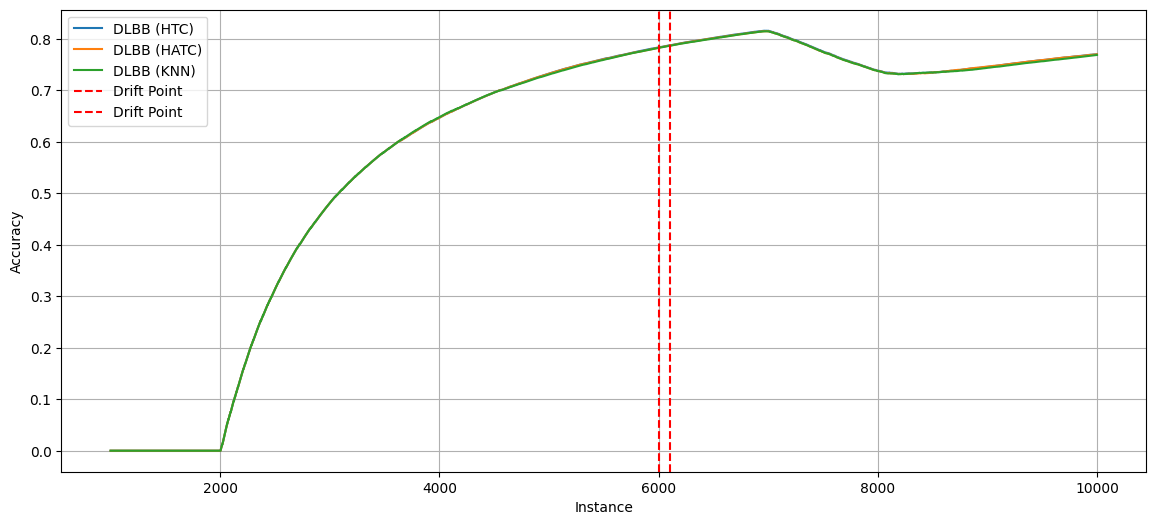

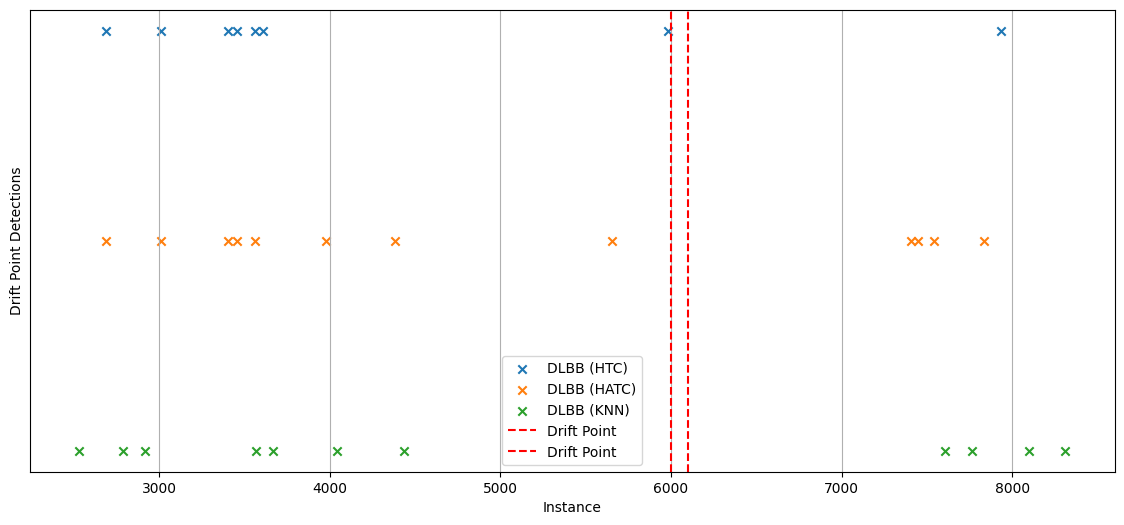

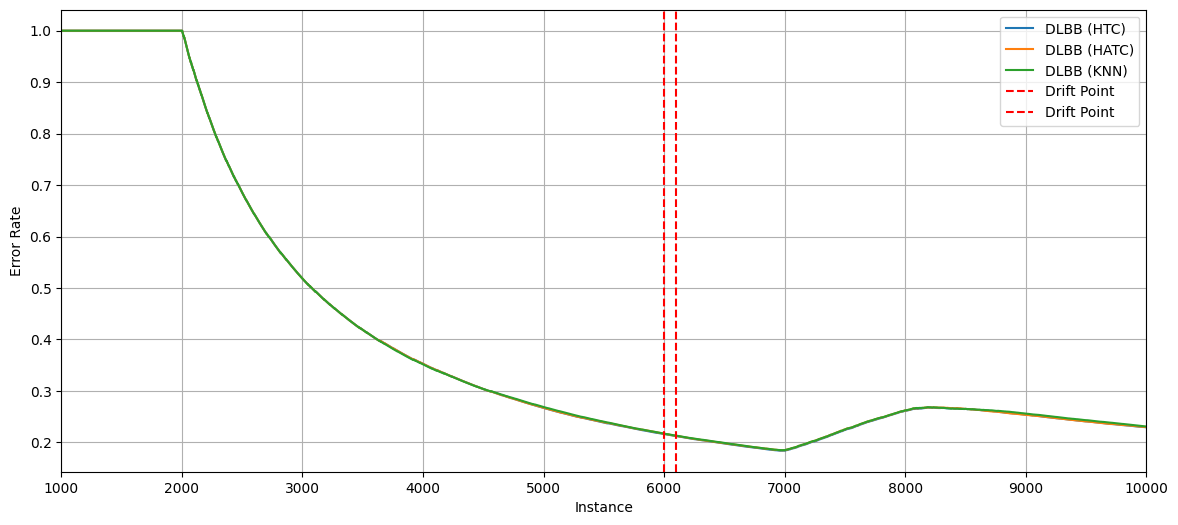

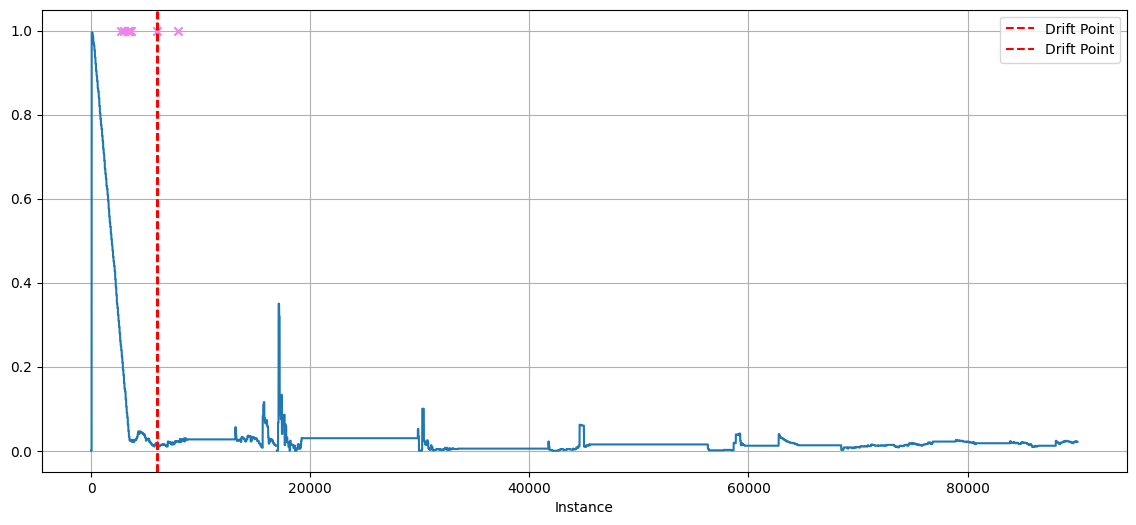

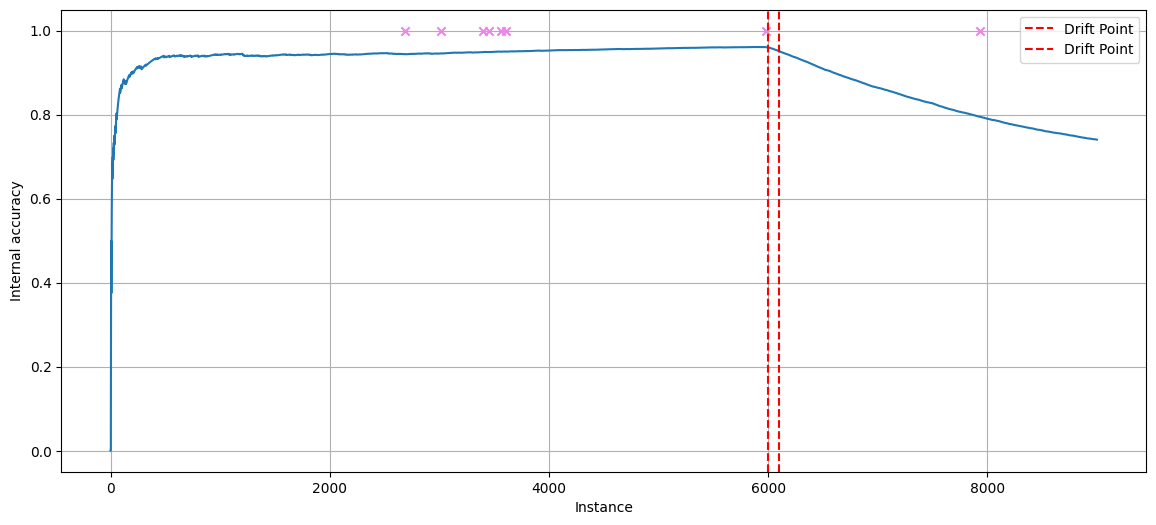

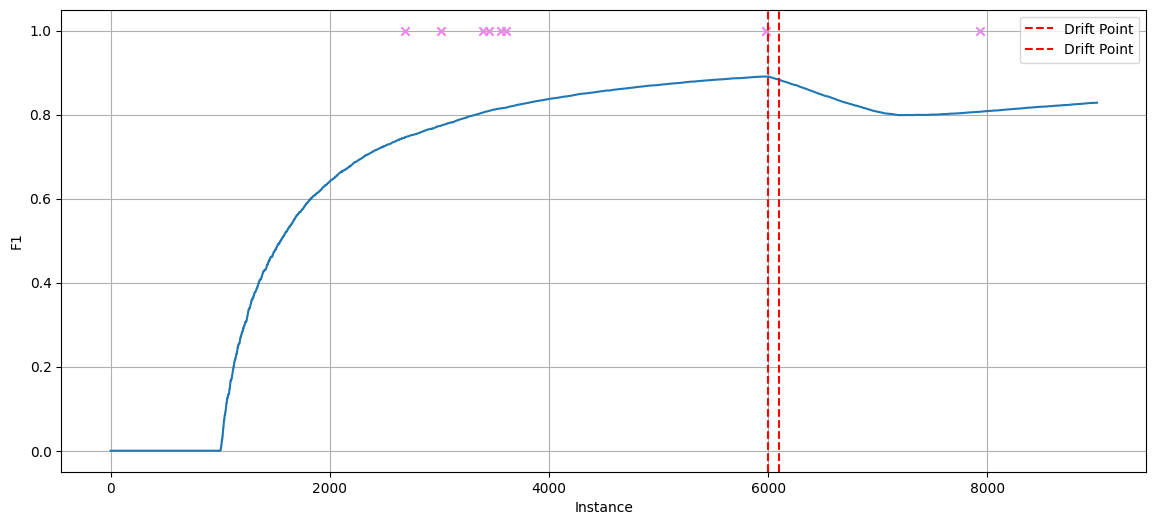

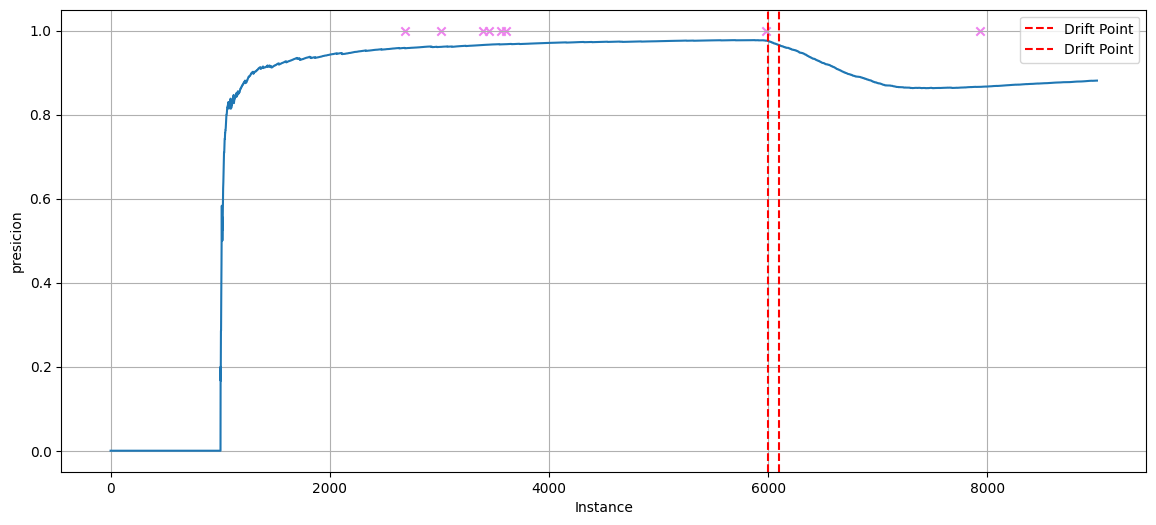

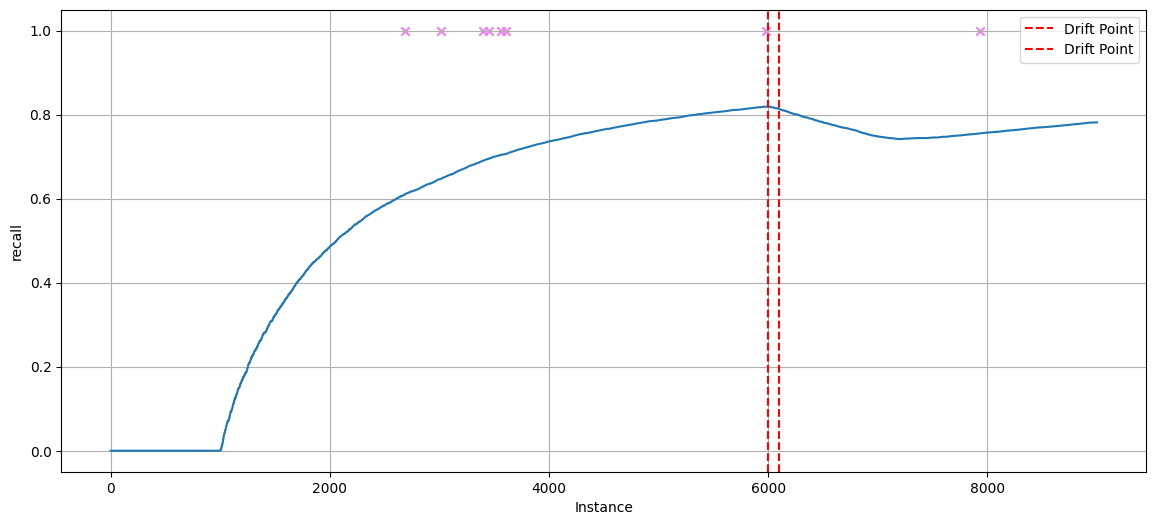

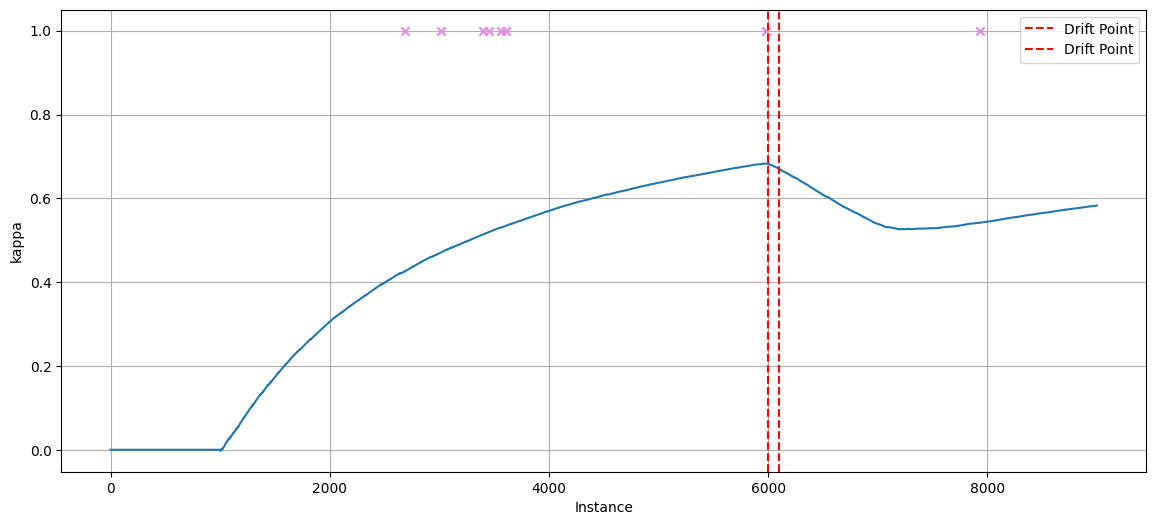

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Sine2.0'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=drift_point, only_dlbb = True)
wyniki = extract_metrics((metrics,times))

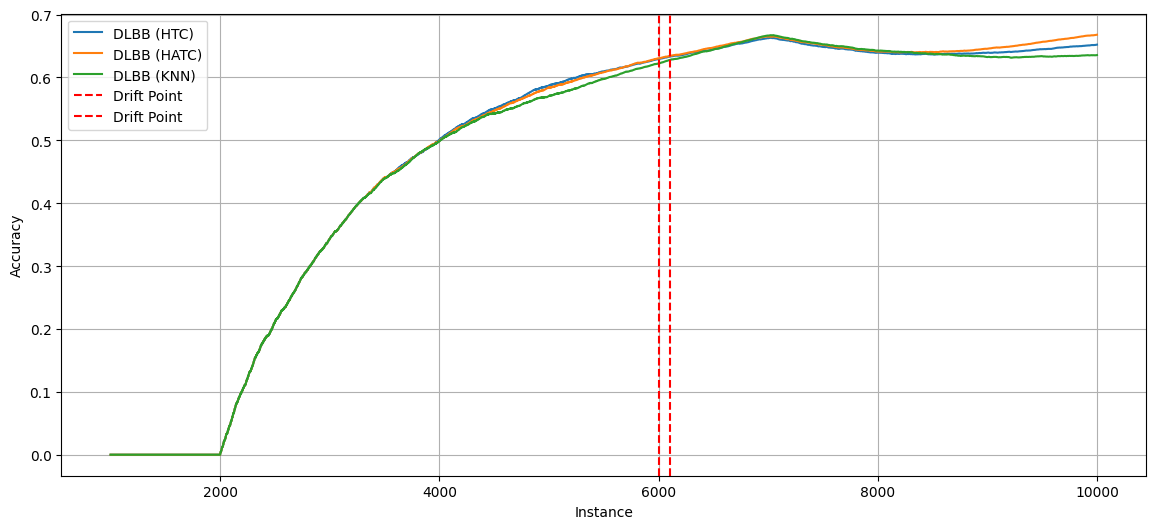

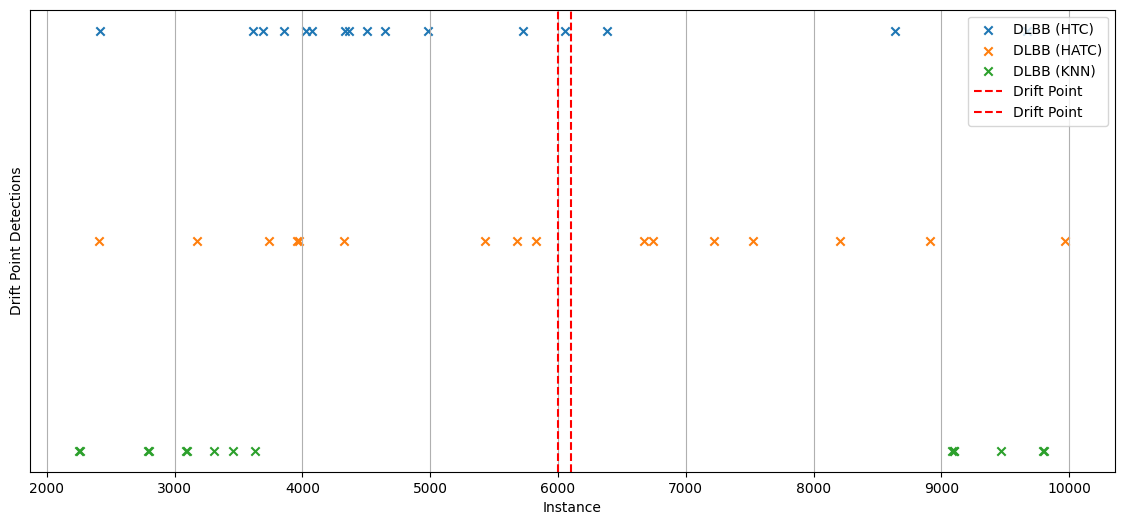

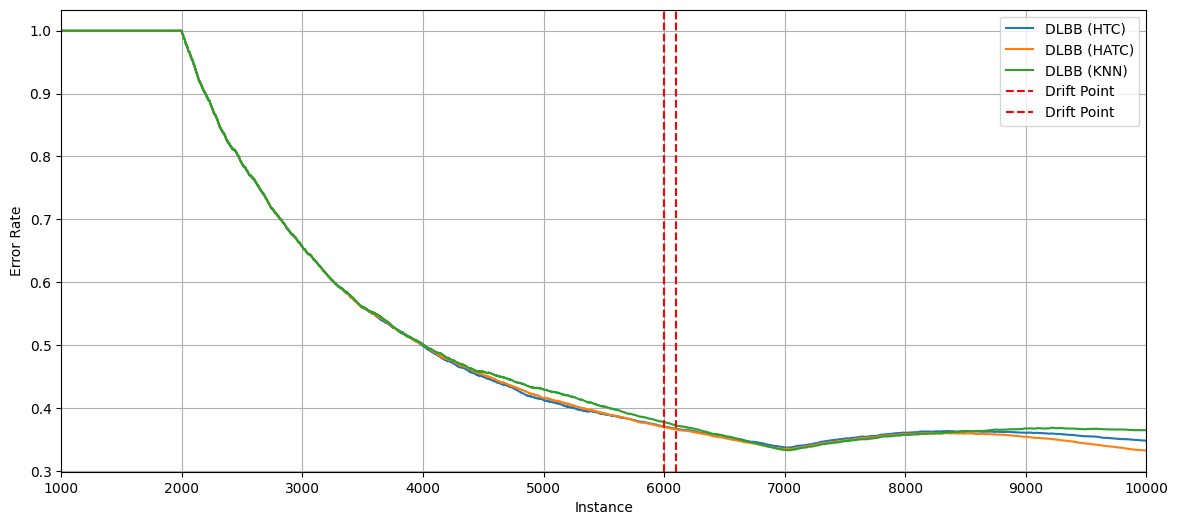

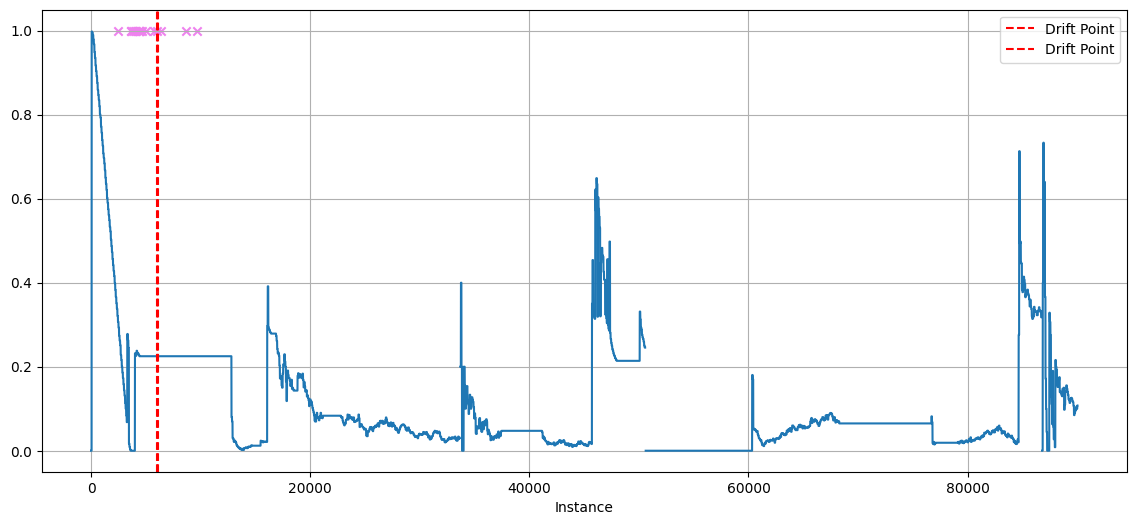

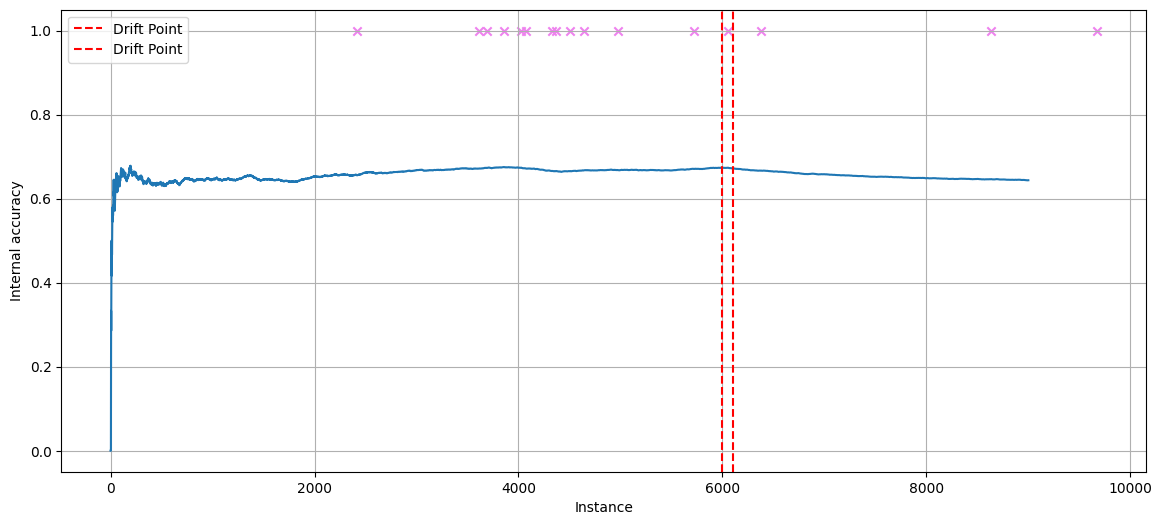

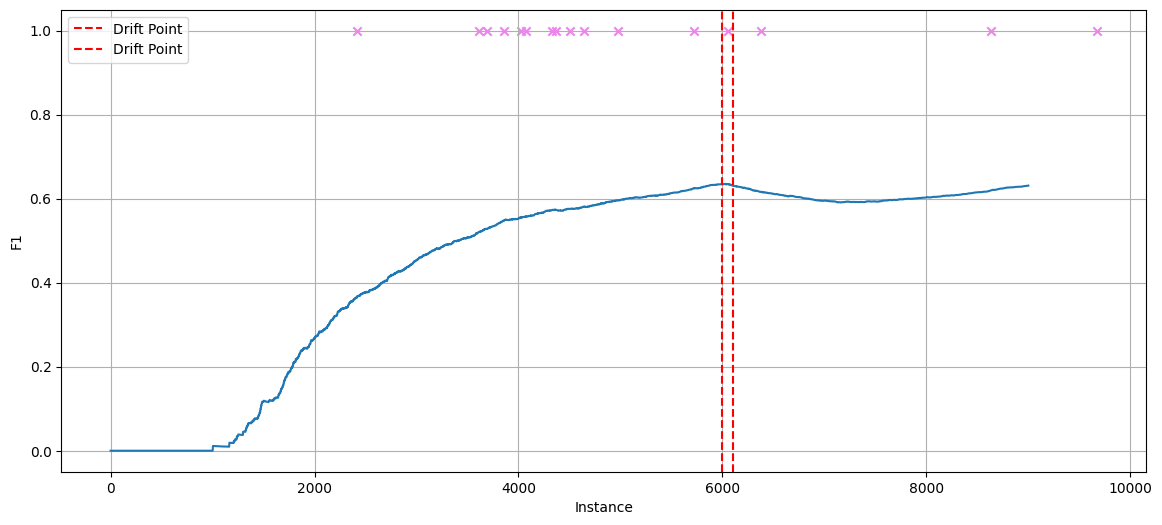

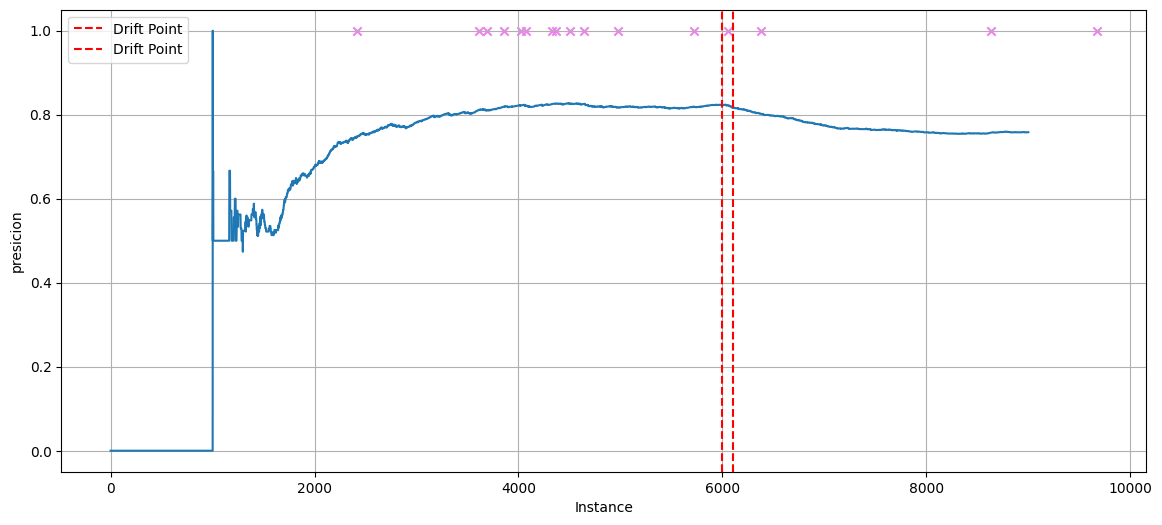

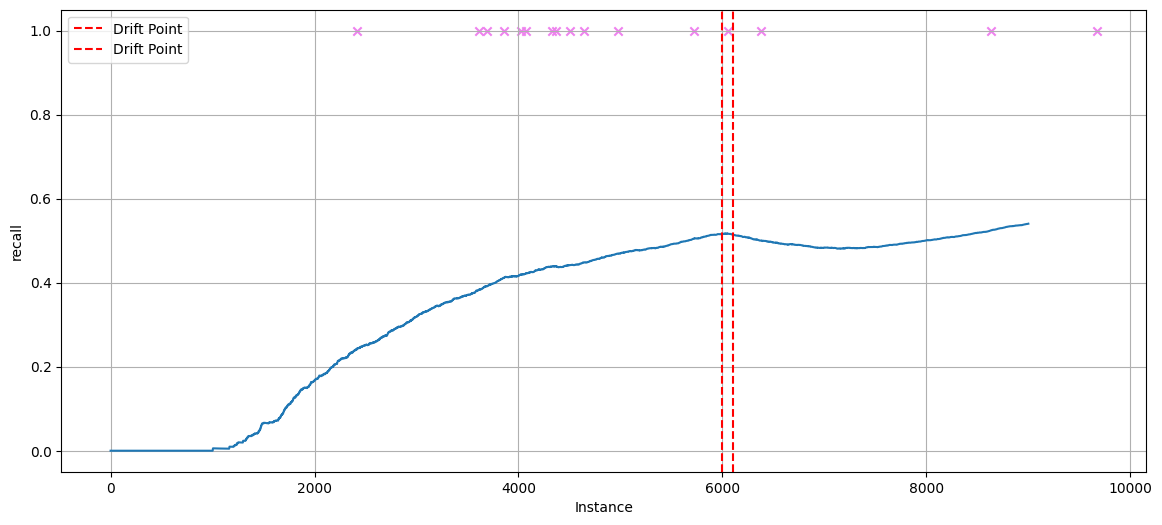

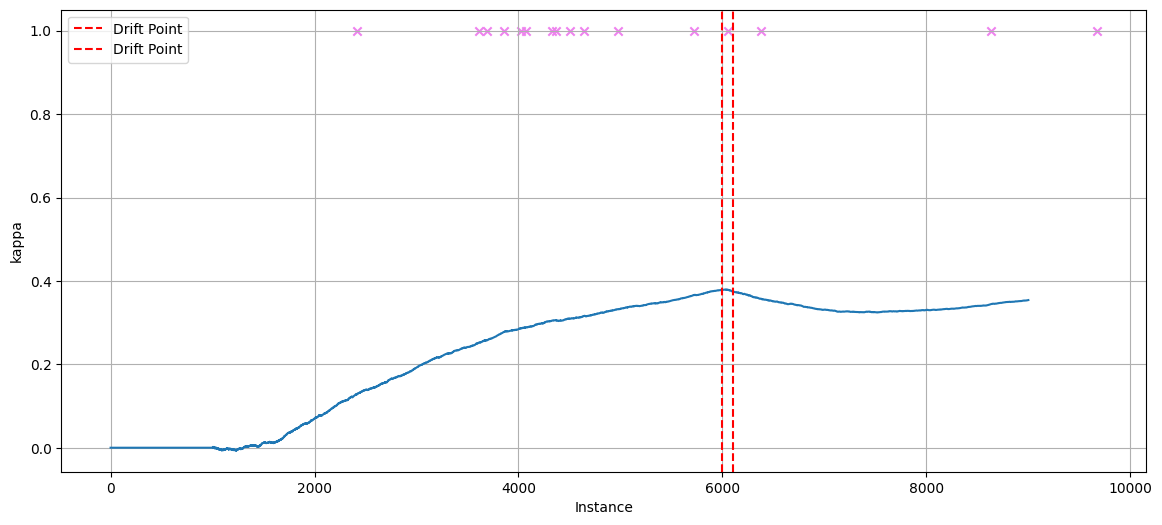

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Agrawal'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=drift_point, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))

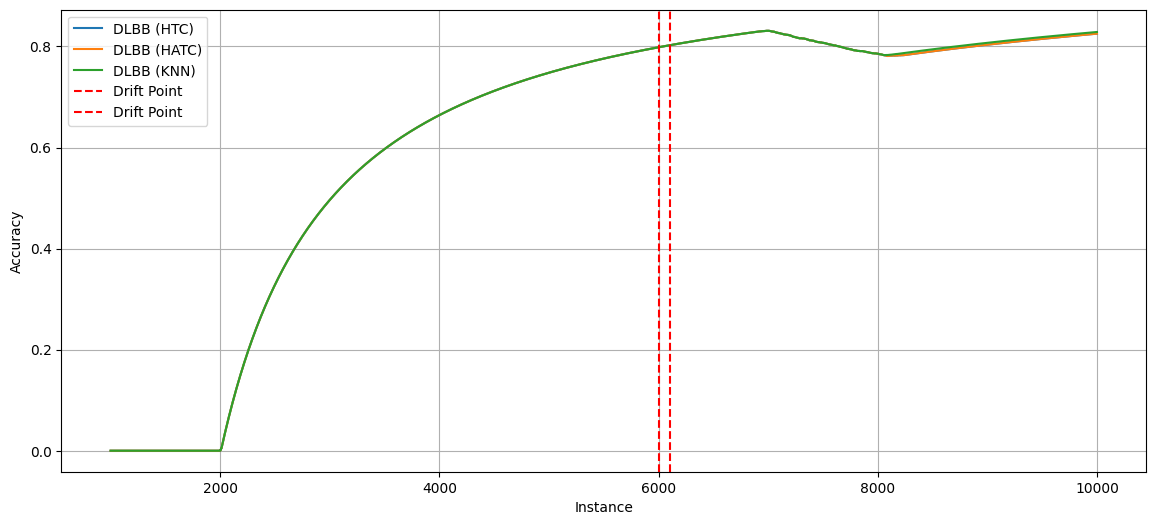

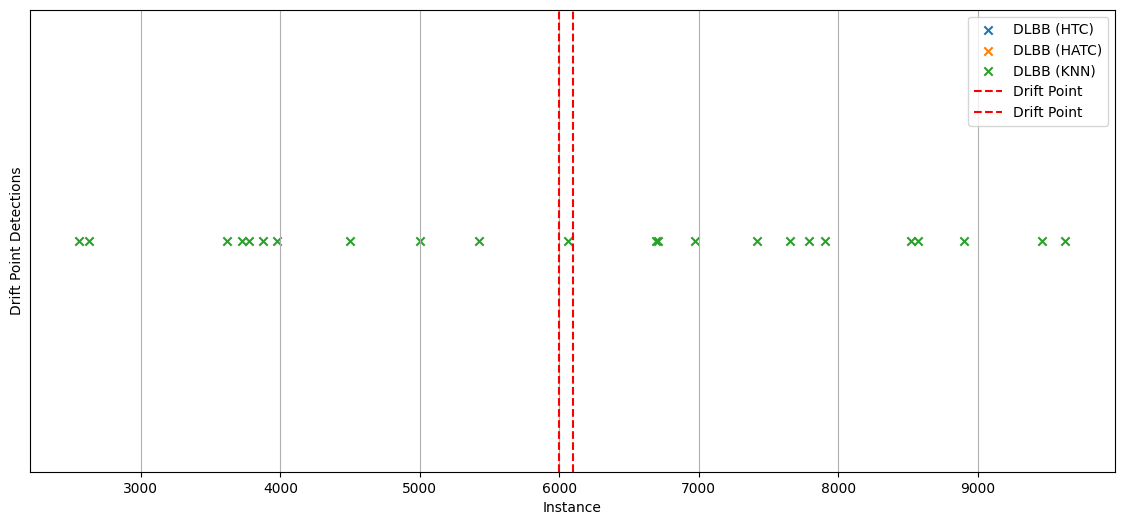

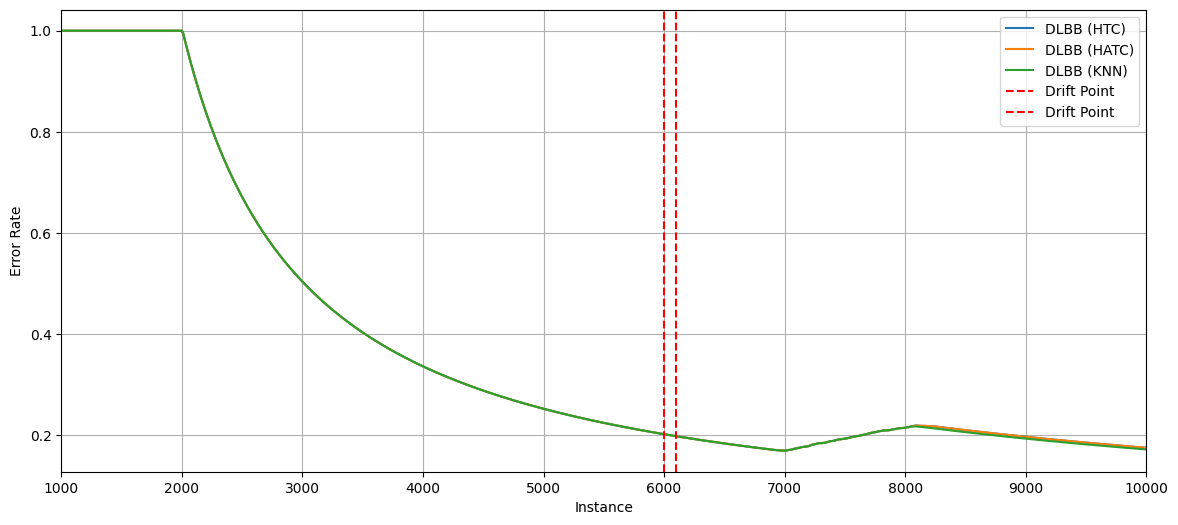

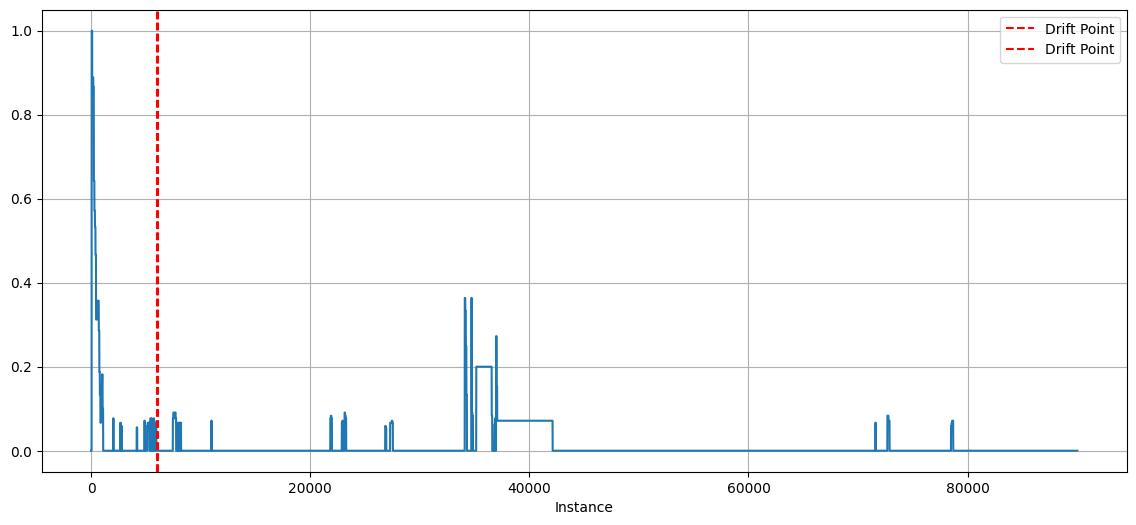

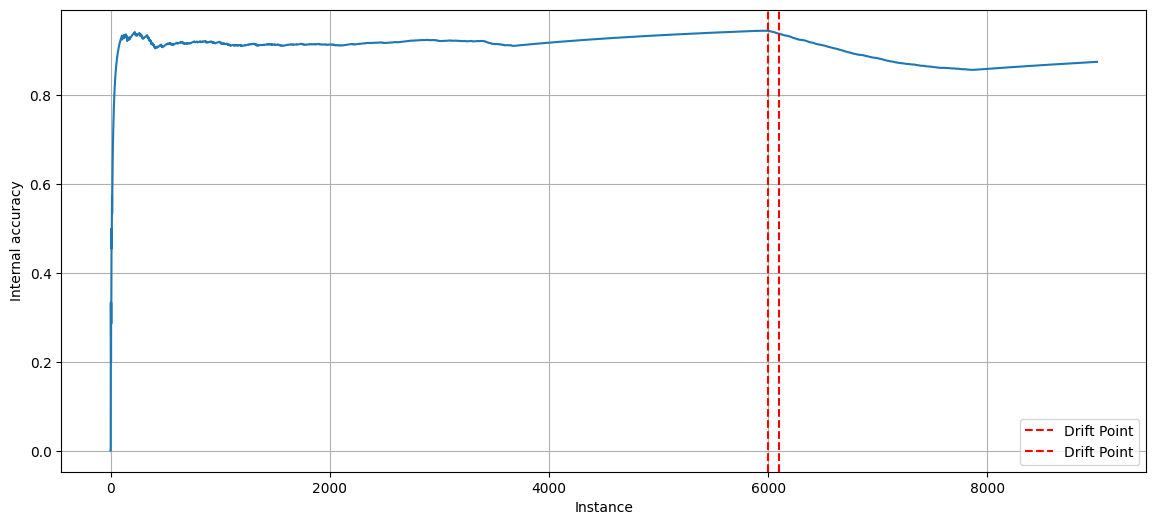

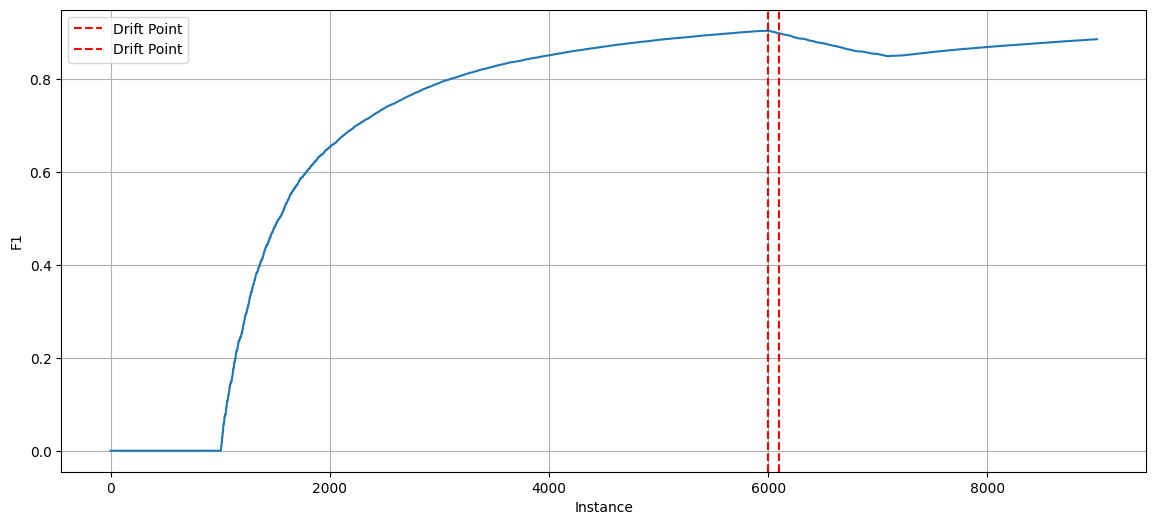

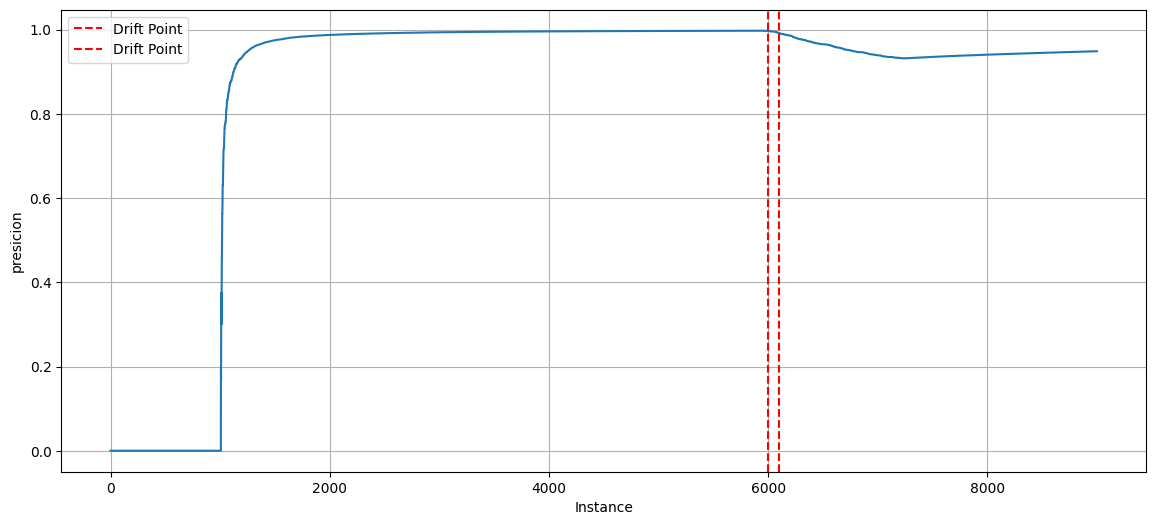

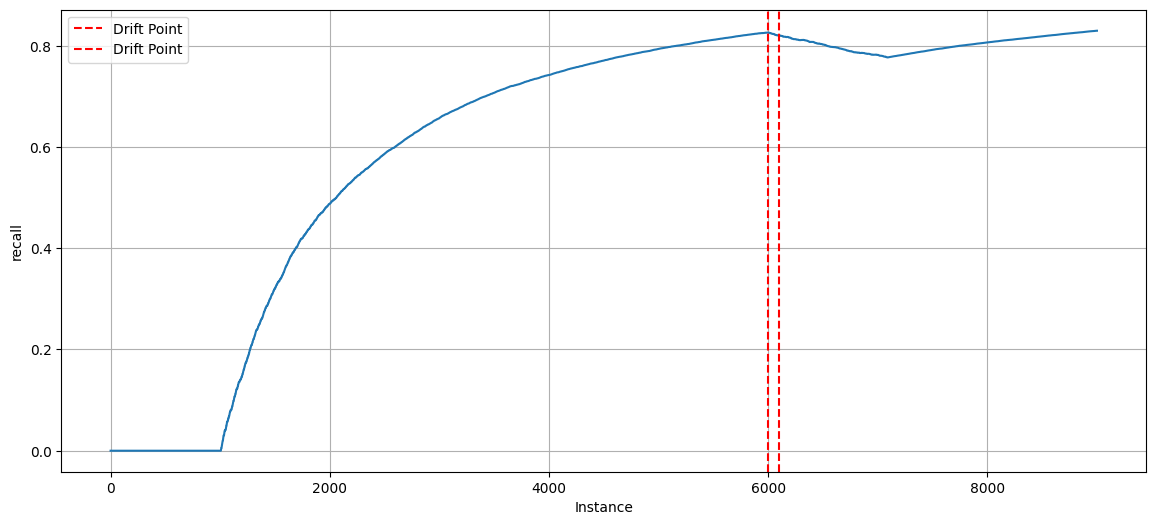

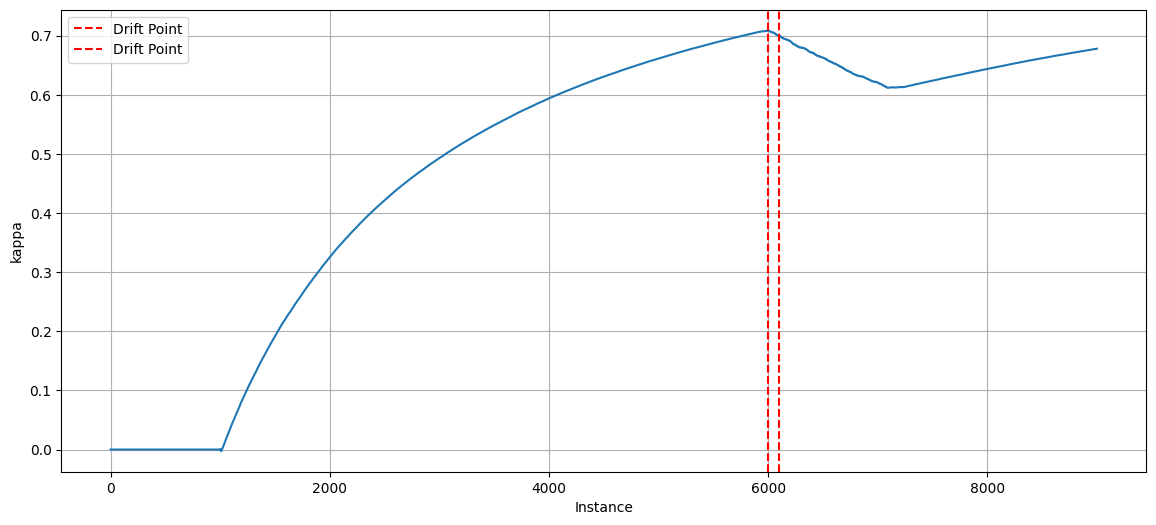

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Stagger'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=drift_point, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))

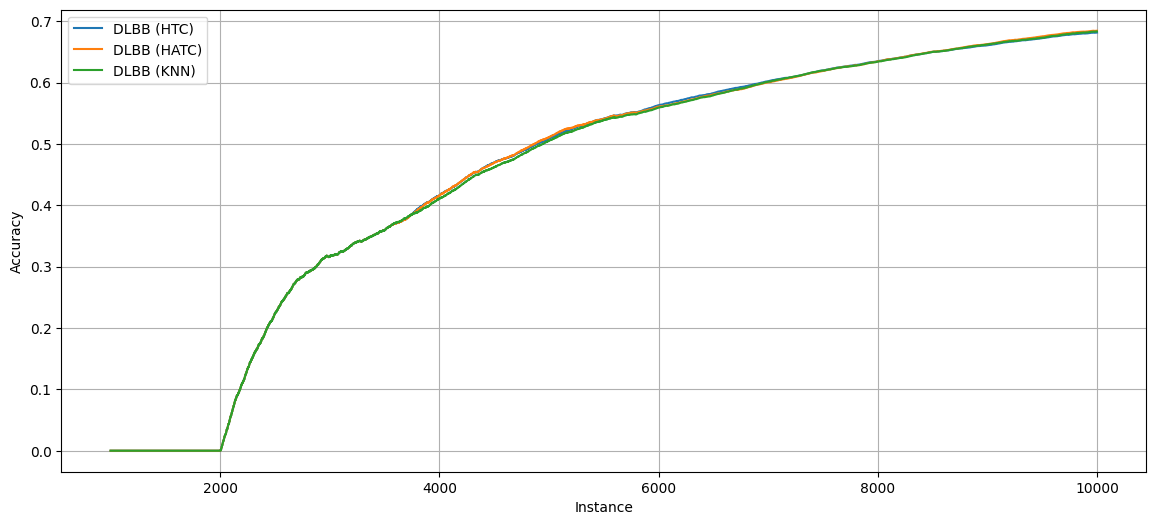

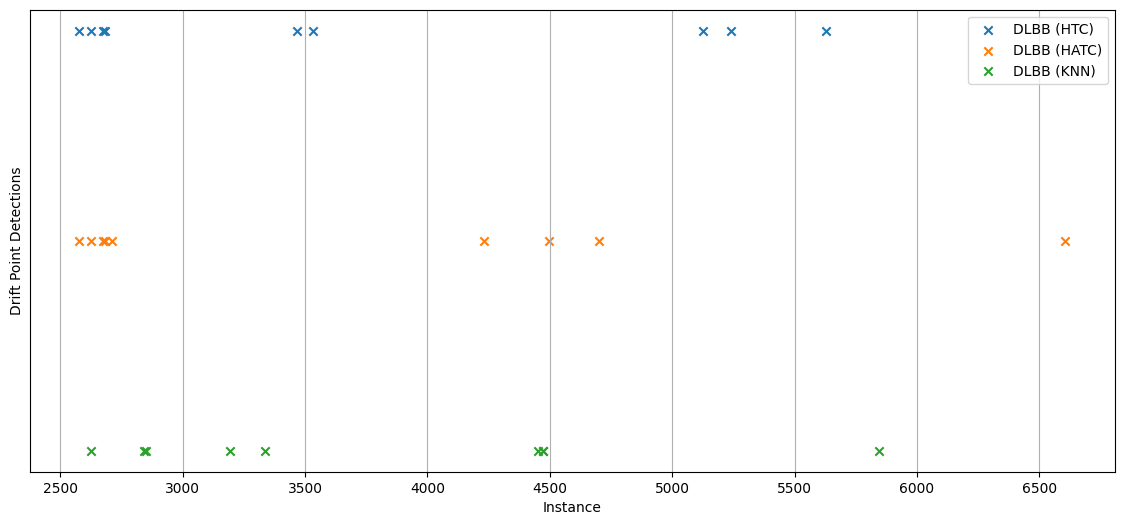

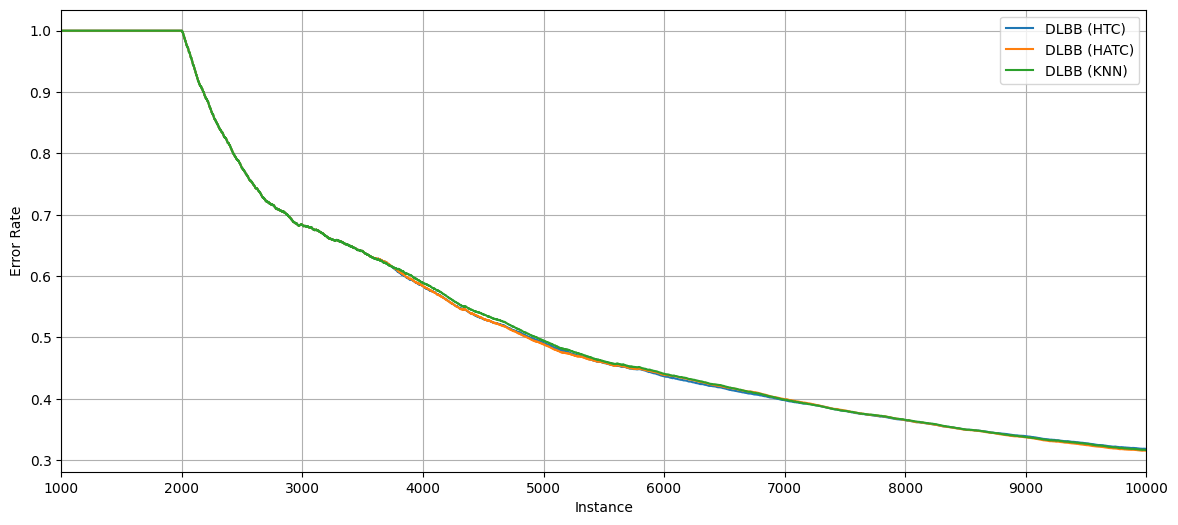

<ipython-input-49-0976e48d5393>:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


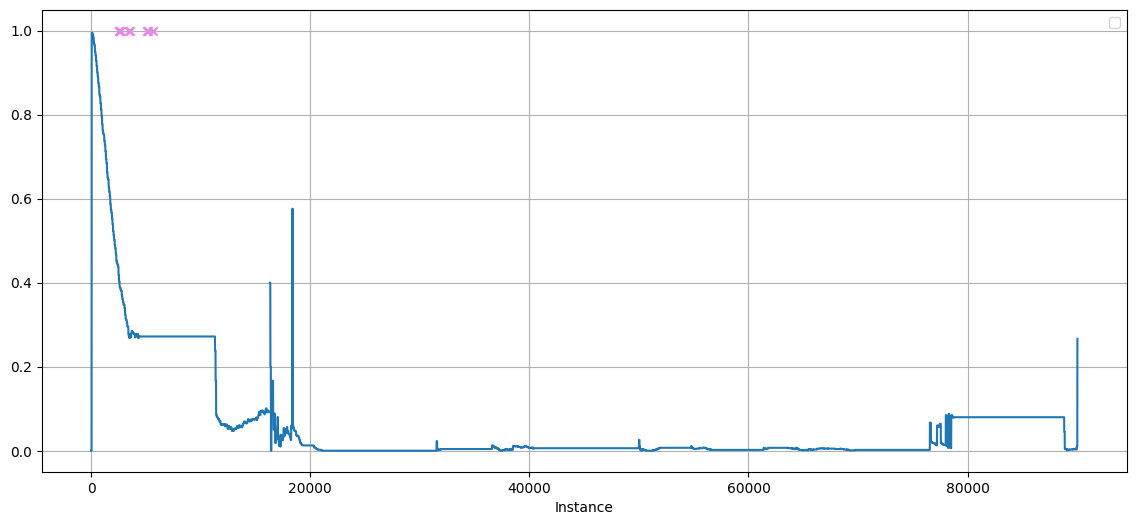

<ipython-input-49-0976e48d5393>:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


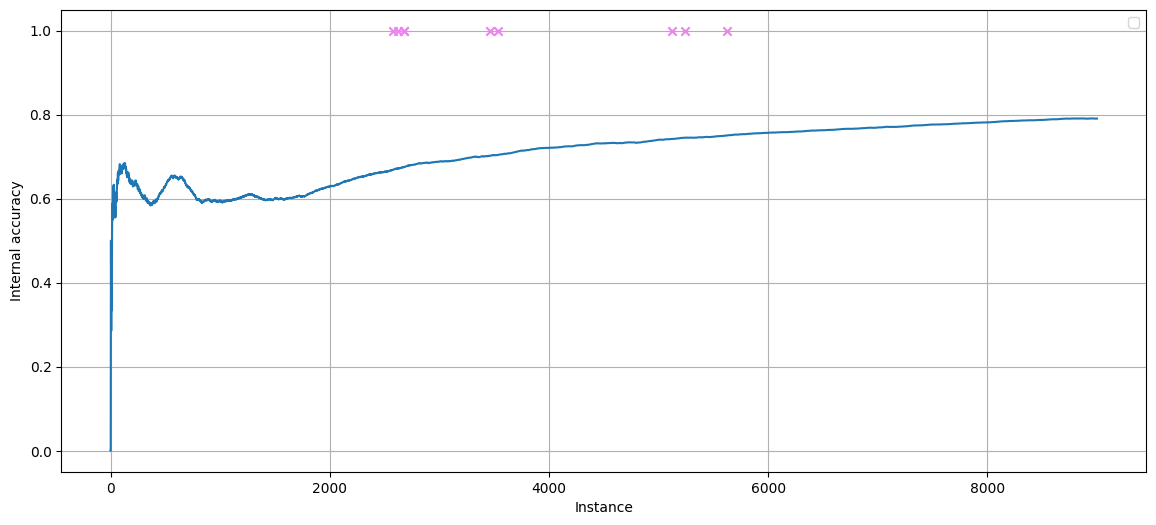

<ipython-input-49-0976e48d5393>:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


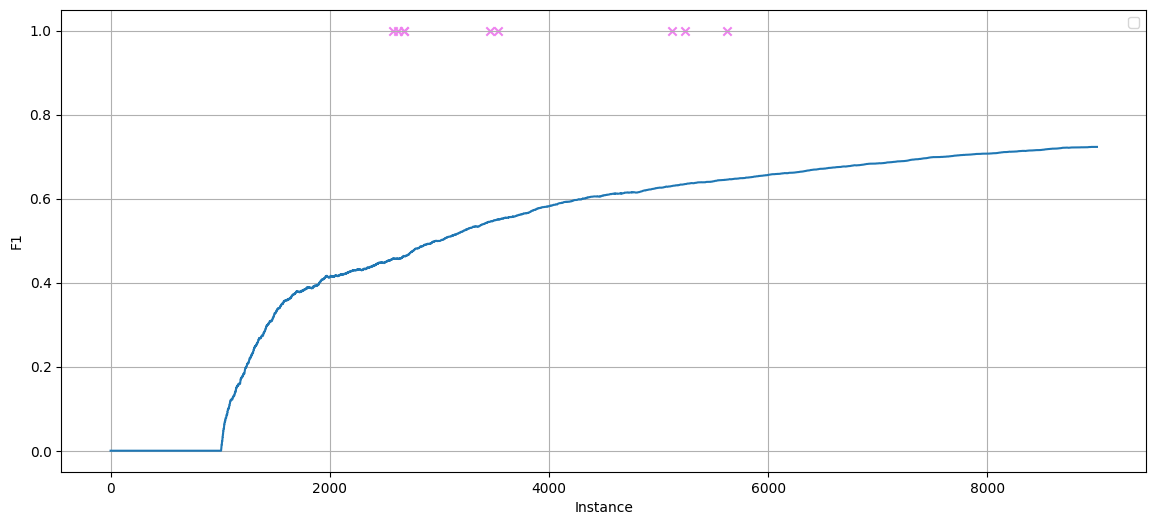

<ipython-input-49-0976e48d5393>:193: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


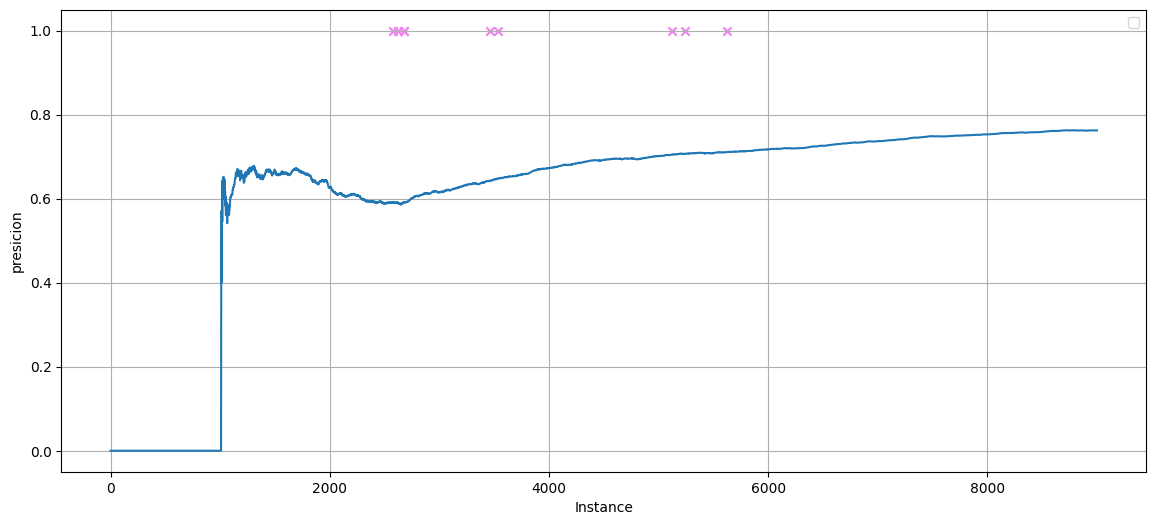

<ipython-input-49-0976e48d5393>:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


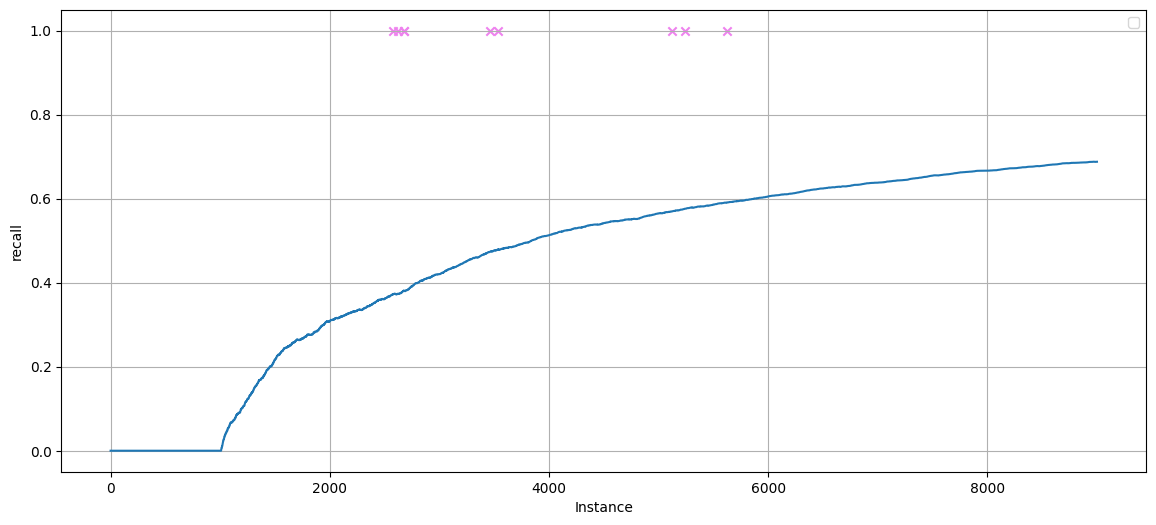

<ipython-input-49-0976e48d5393>:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


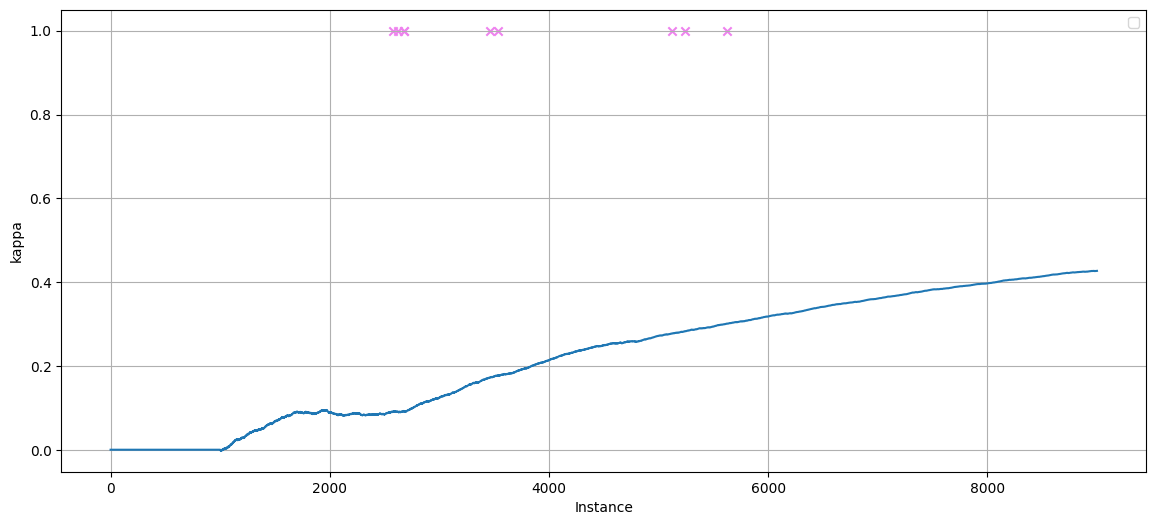

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Hyperplane'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))

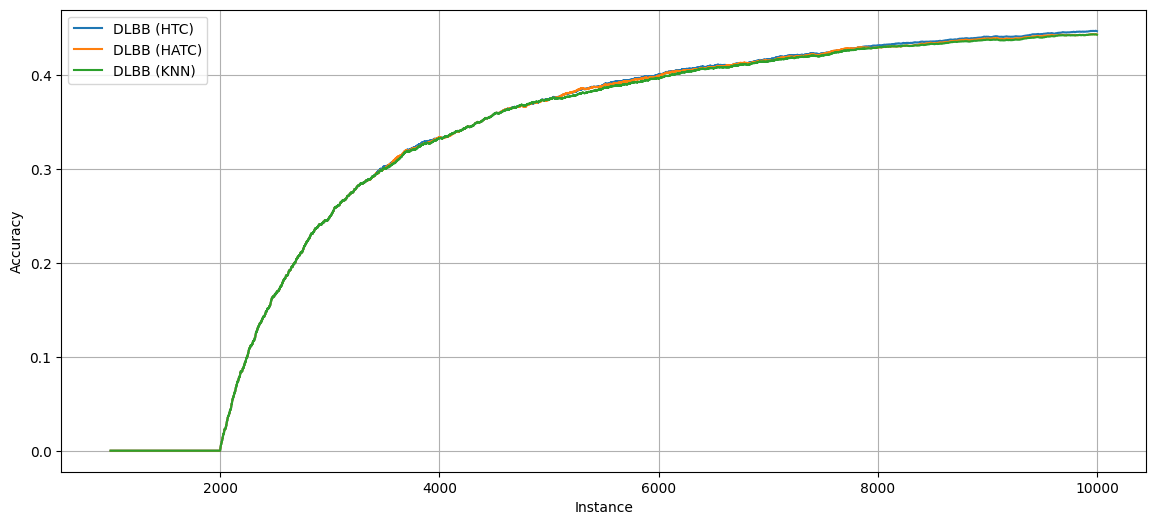

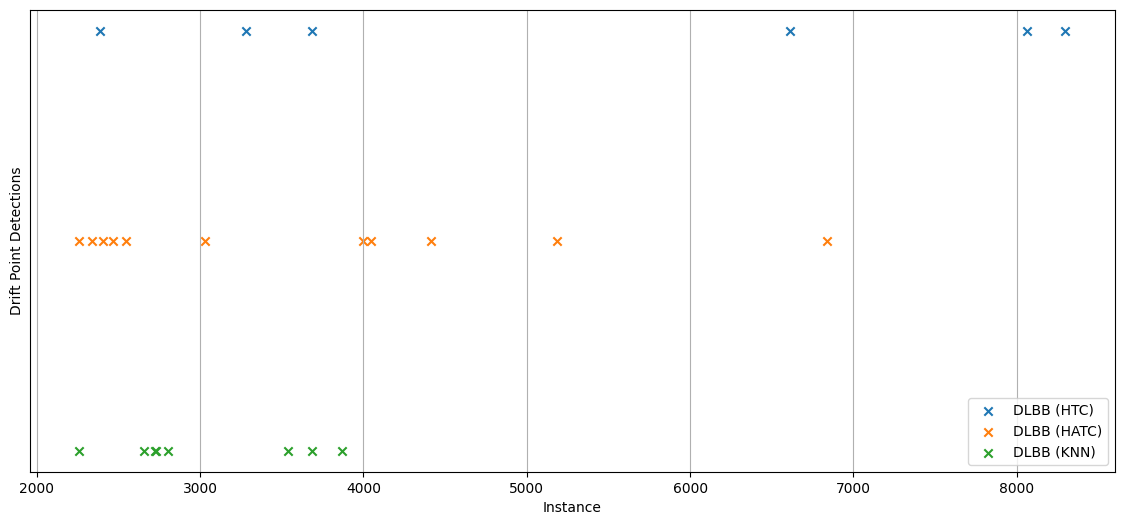

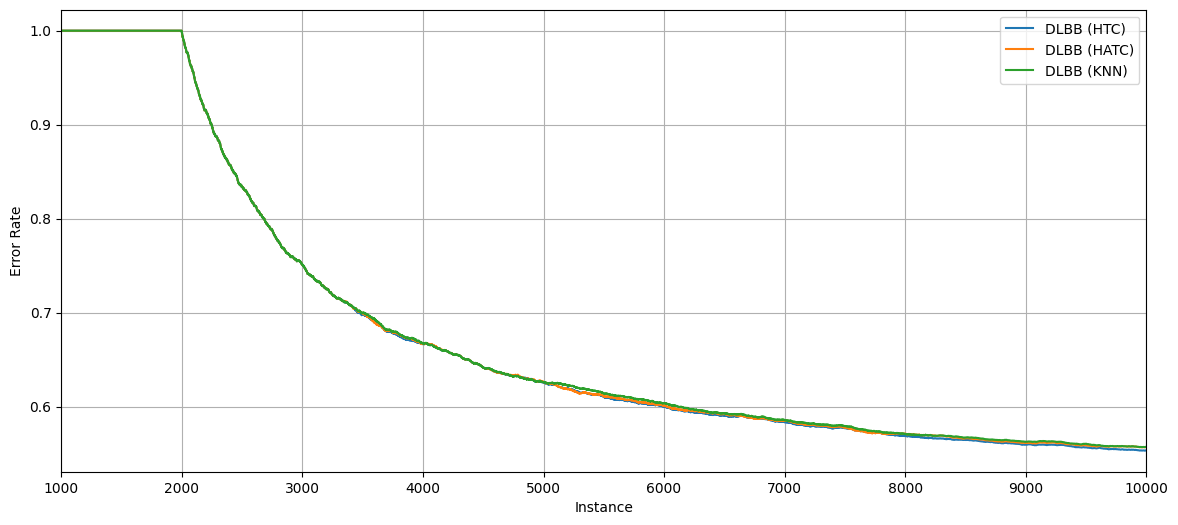

<ipython-input-49-0976e48d5393>:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


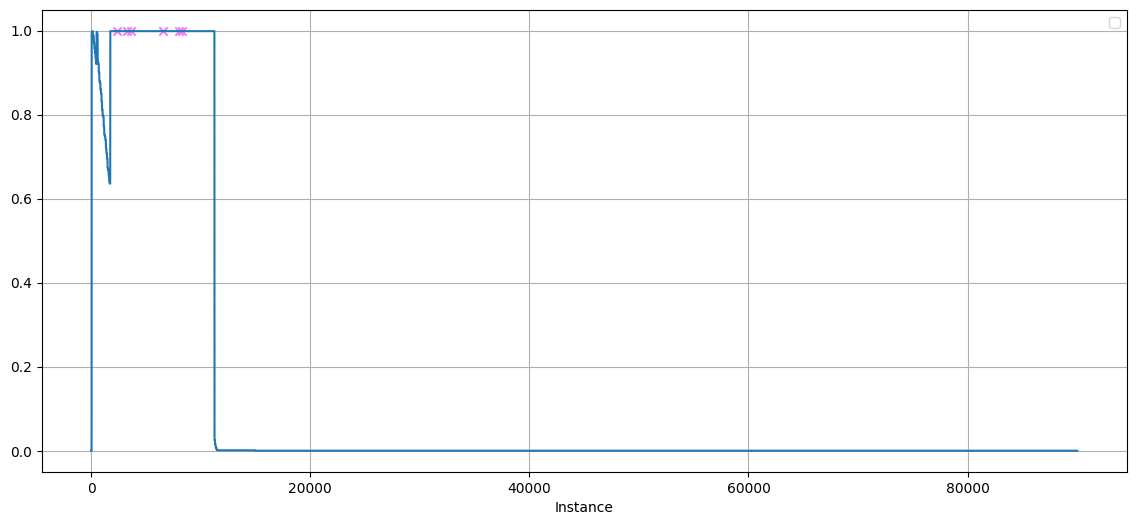

<ipython-input-49-0976e48d5393>:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


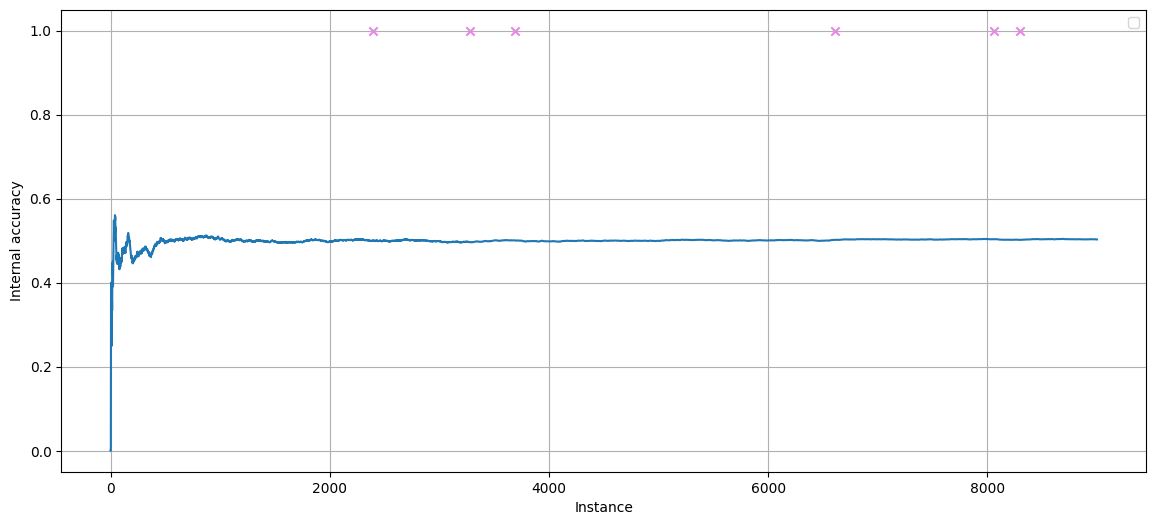

<ipython-input-49-0976e48d5393>:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


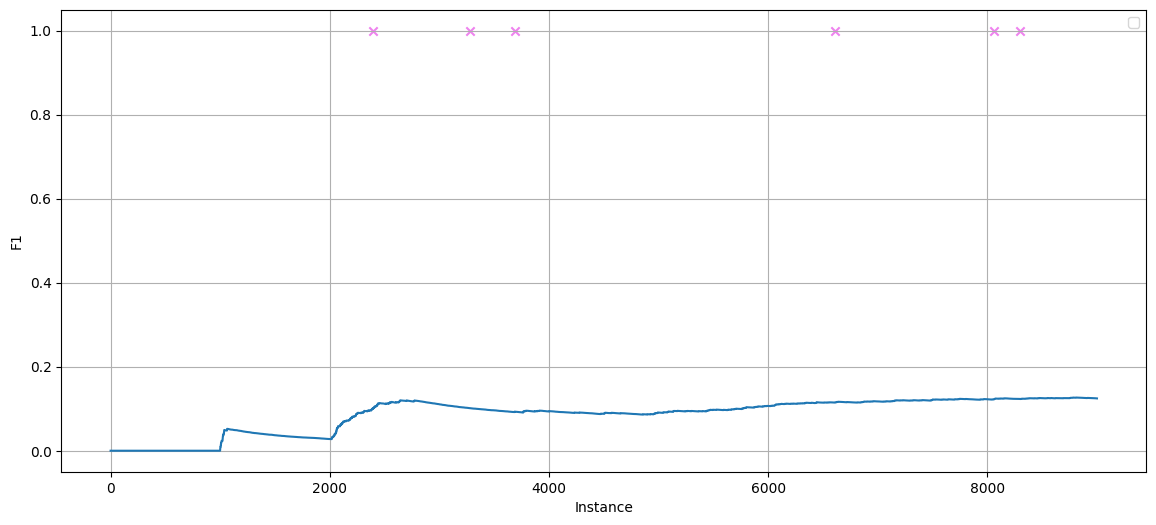

<ipython-input-49-0976e48d5393>:193: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


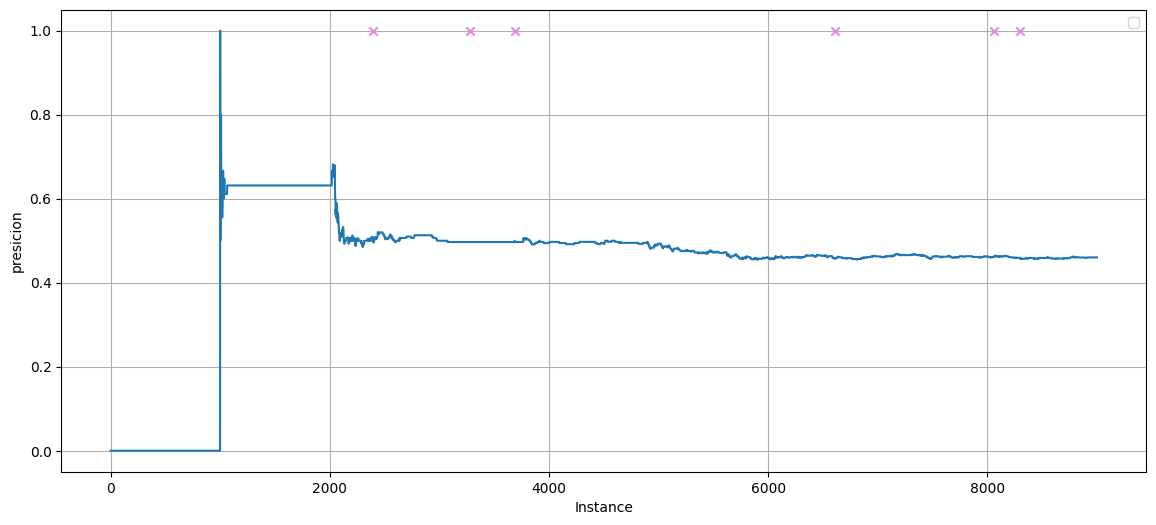

<ipython-input-49-0976e48d5393>:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


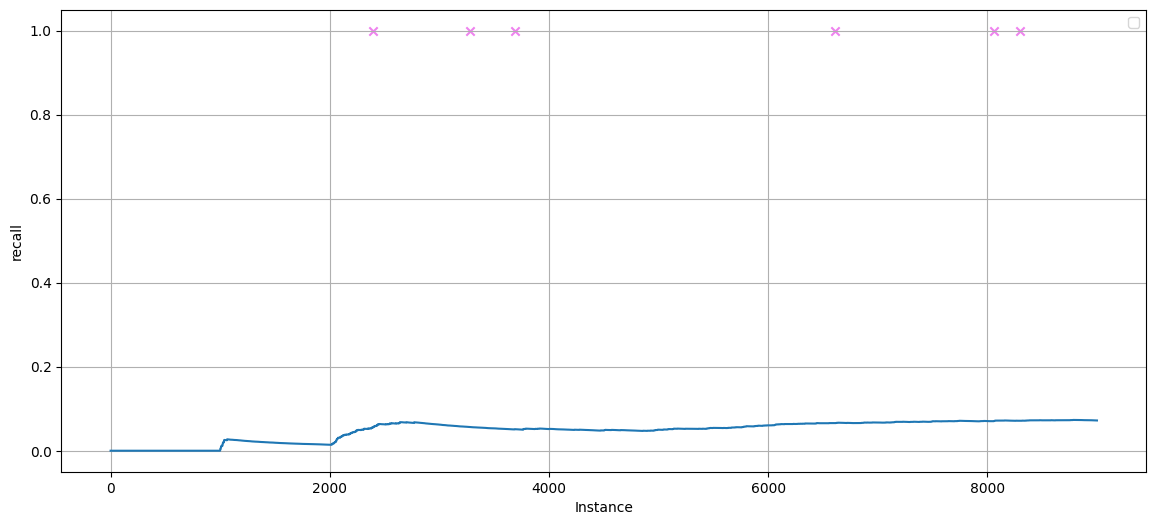

<ipython-input-49-0976e48d5393>:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


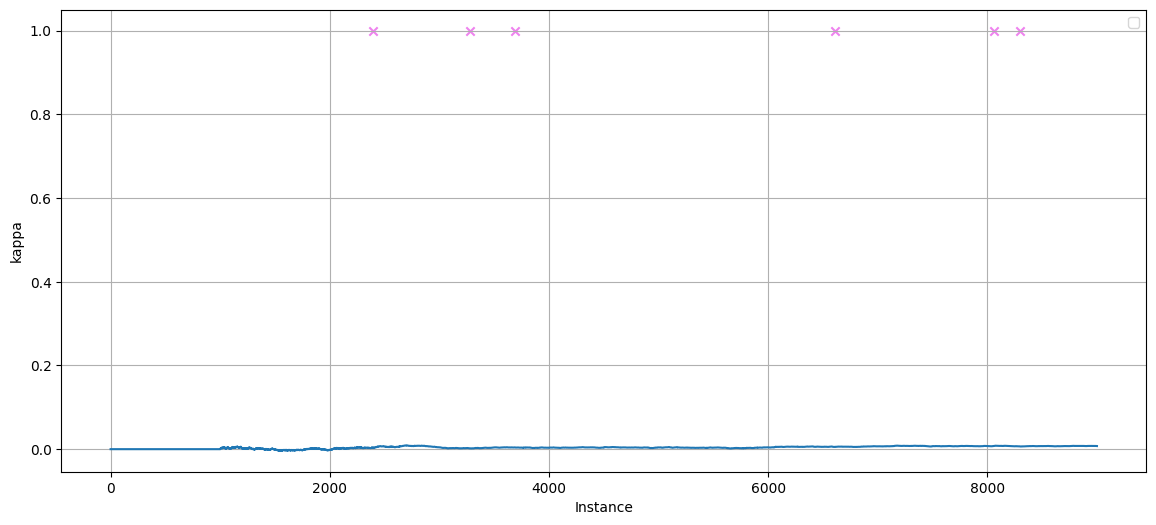

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'PokerHand'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))

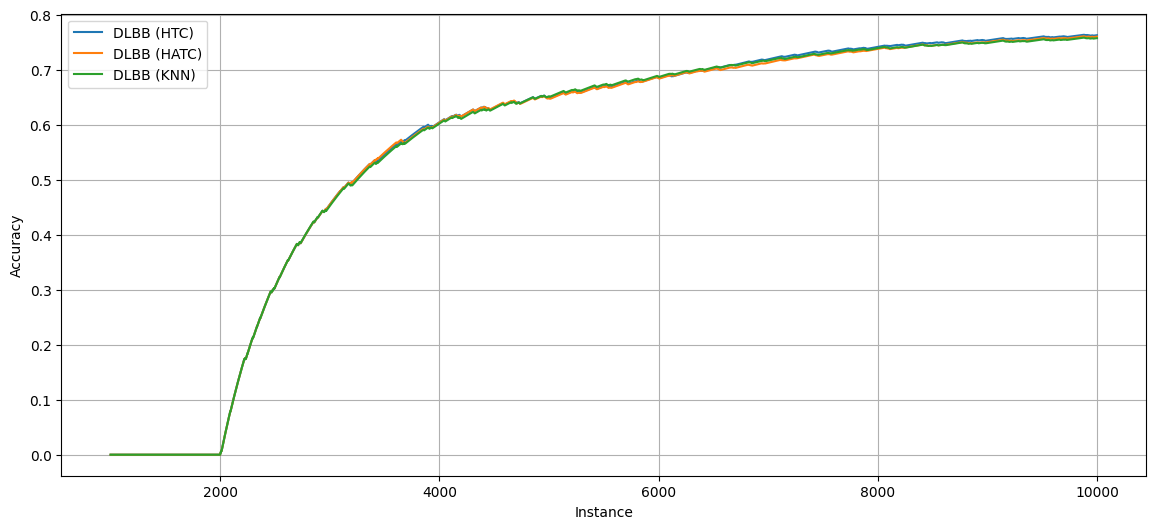

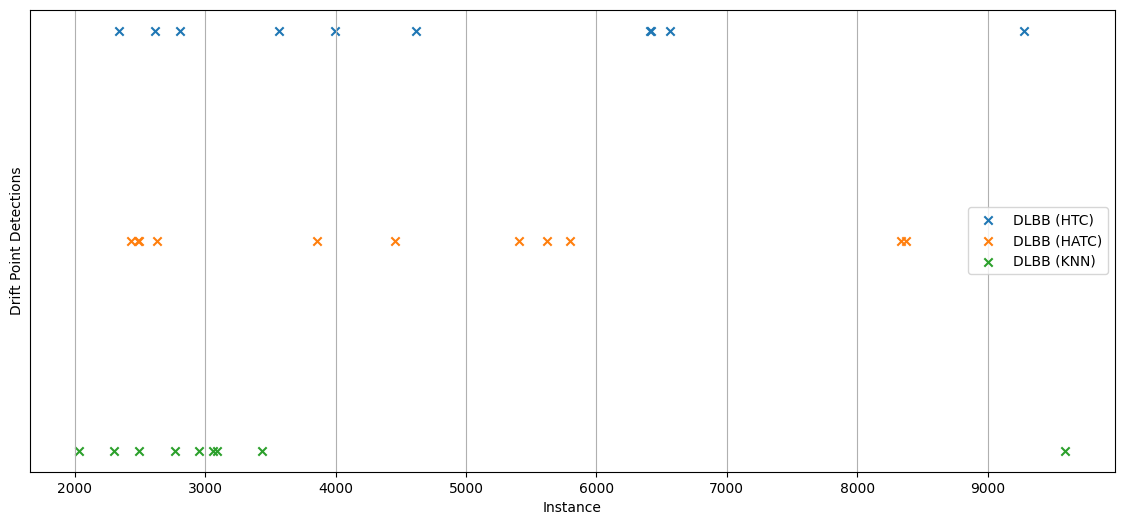

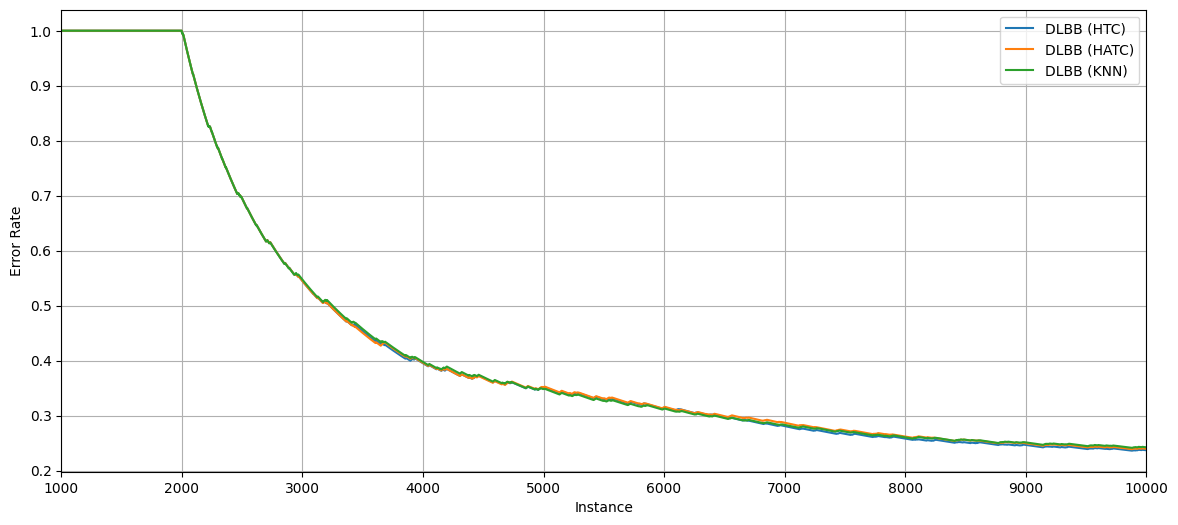

<ipython-input-49-0976e48d5393>:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


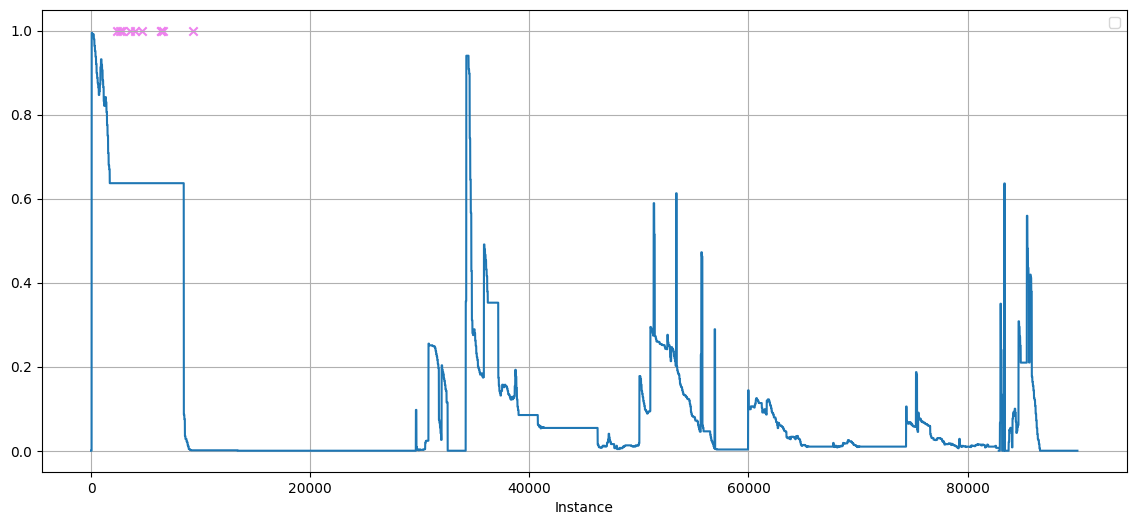

<ipython-input-49-0976e48d5393>:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


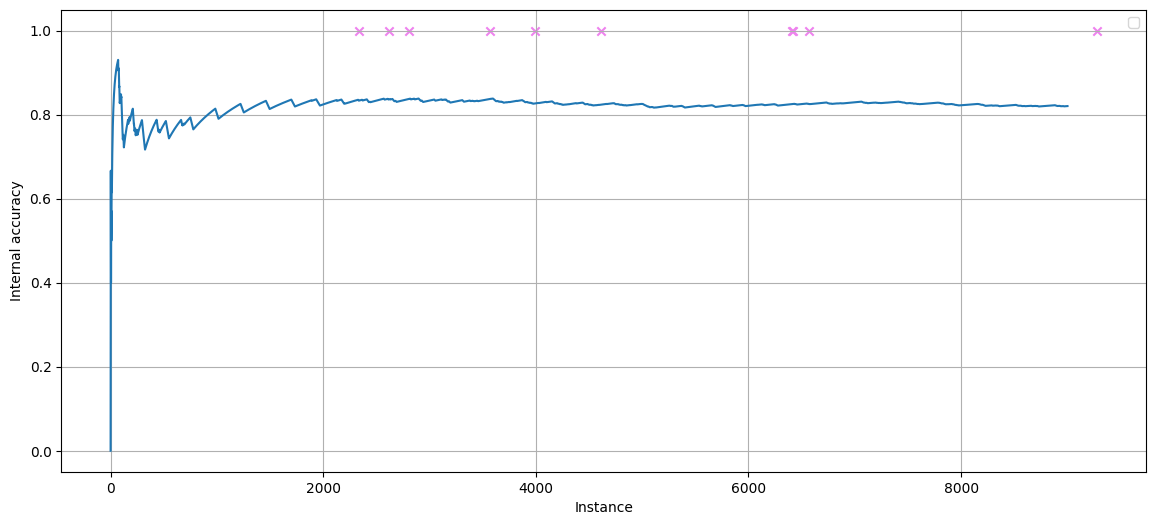

<ipython-input-49-0976e48d5393>:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


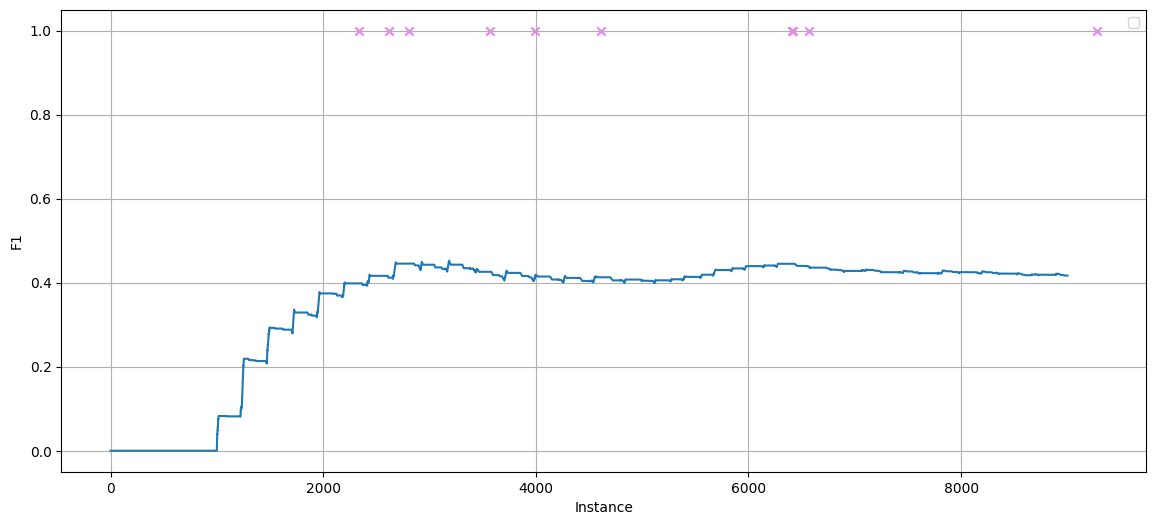

<ipython-input-49-0976e48d5393>:193: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


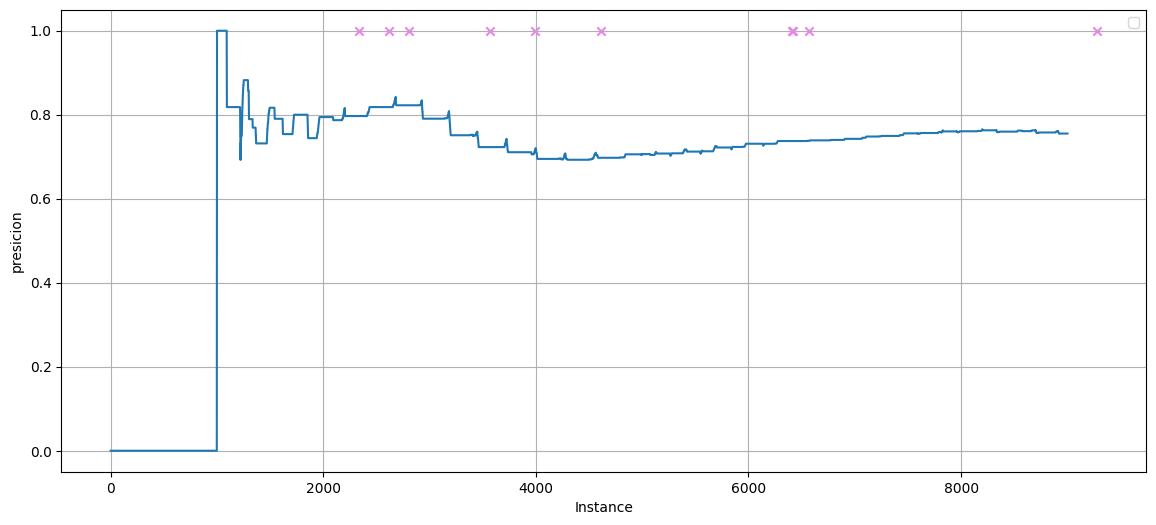

<ipython-input-49-0976e48d5393>:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


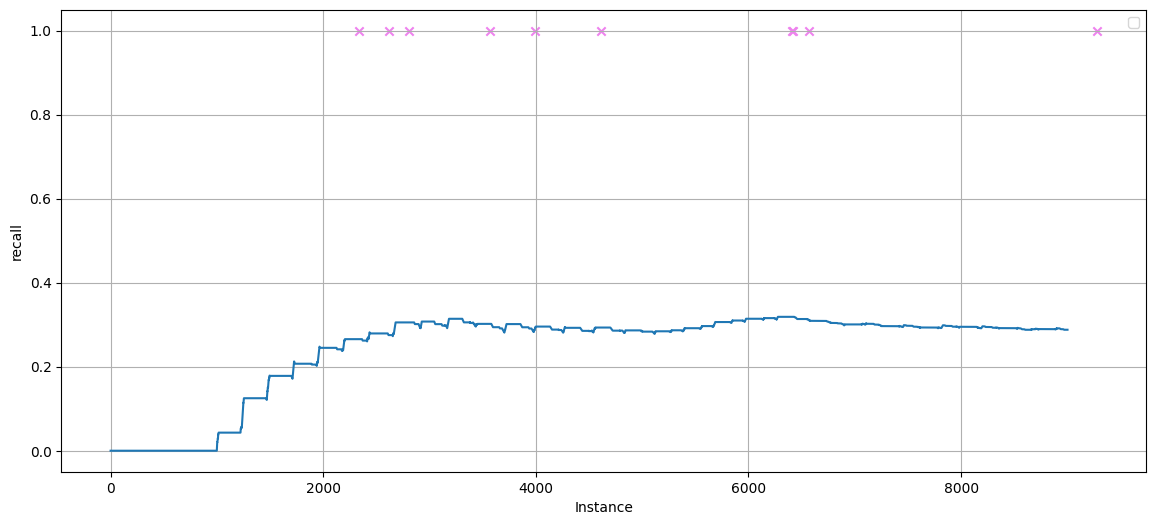

<ipython-input-49-0976e48d5393>:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


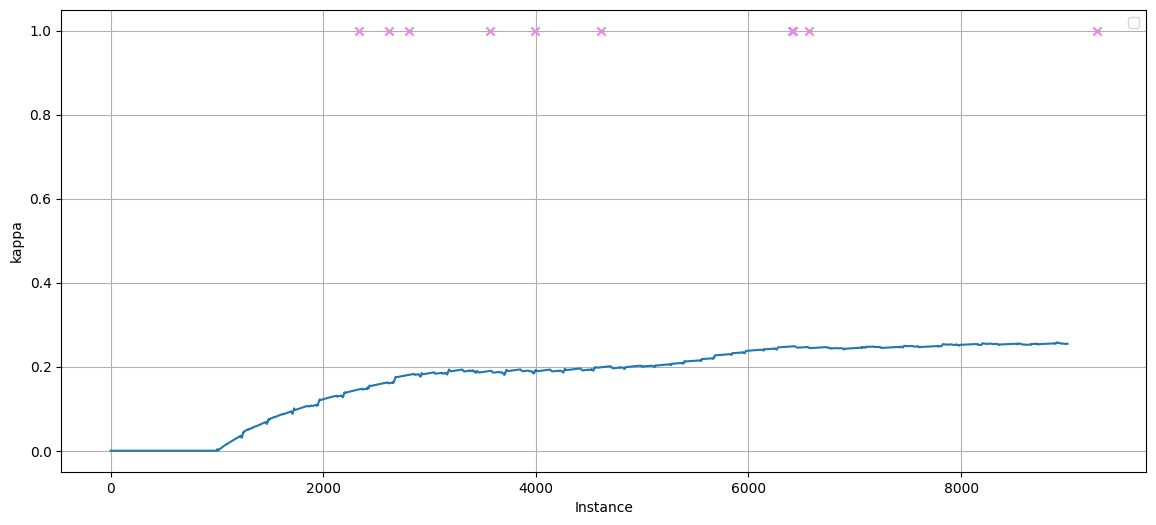

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Covertype'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))
# KNN_ARF_delayed_label_Covertype_drift_point_6000.0_num_sam_10000_delay_1000_K1000

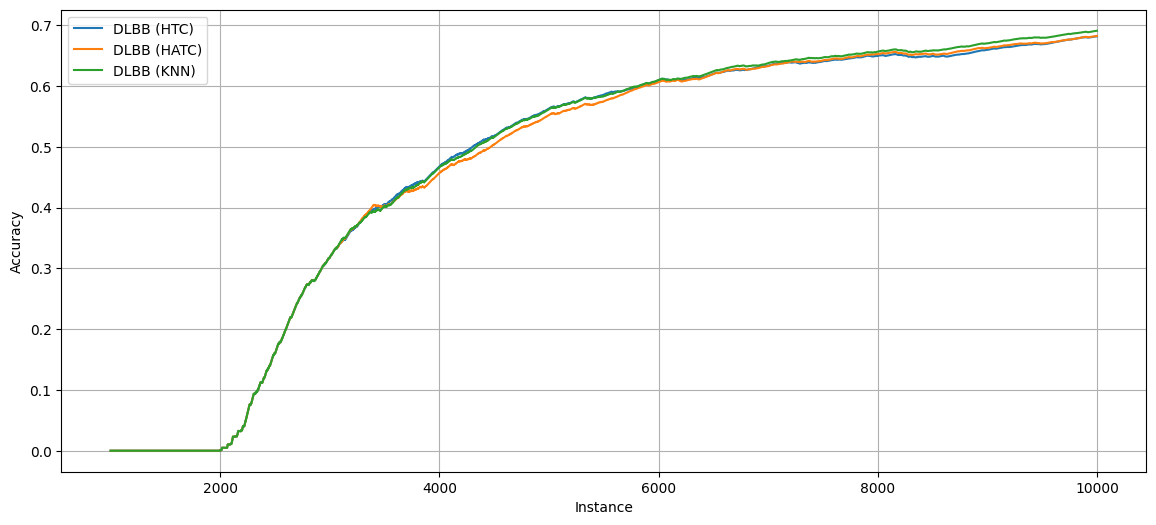

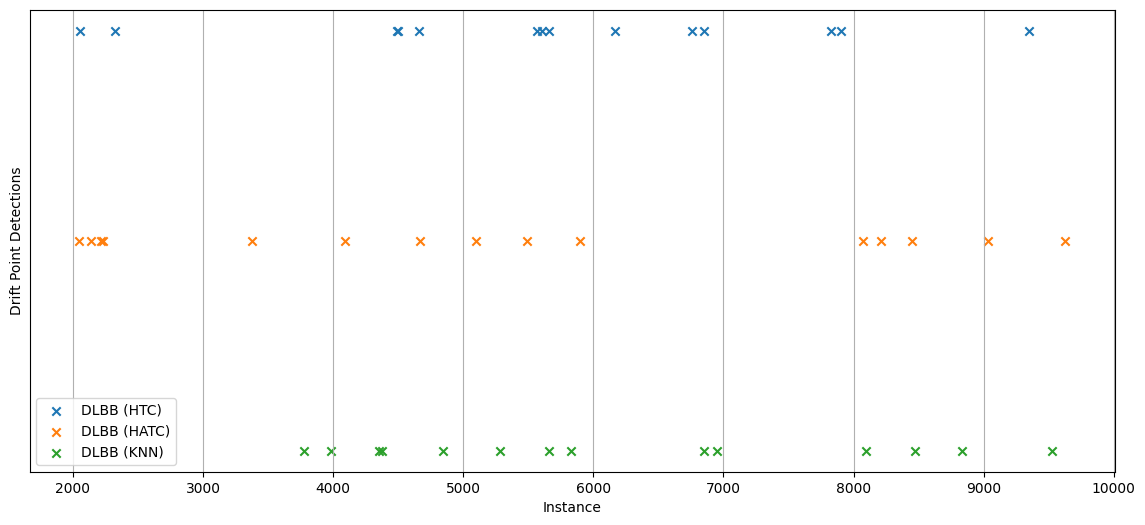

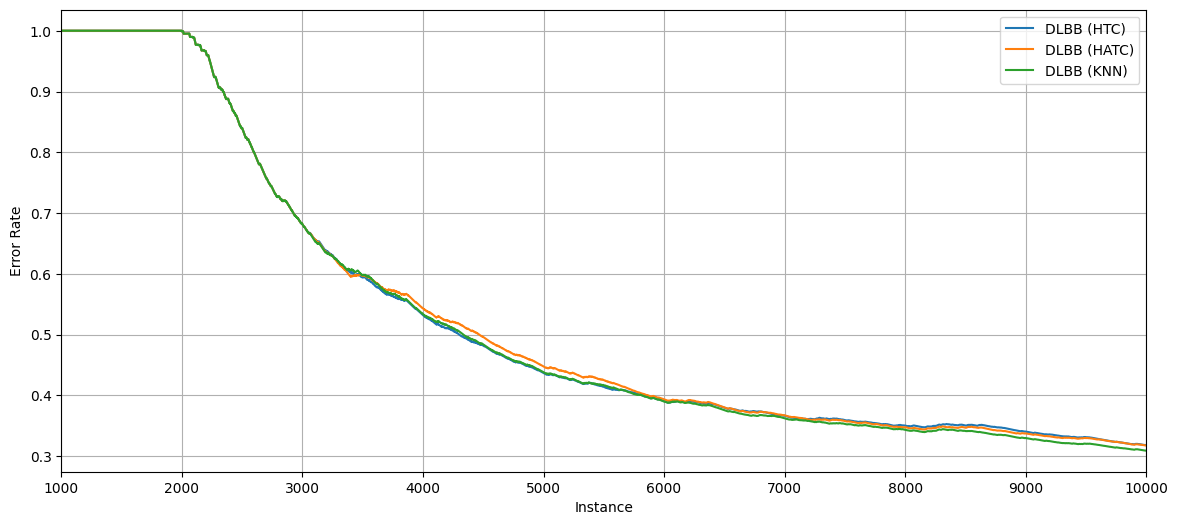

<ipython-input-49-0976e48d5393>:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


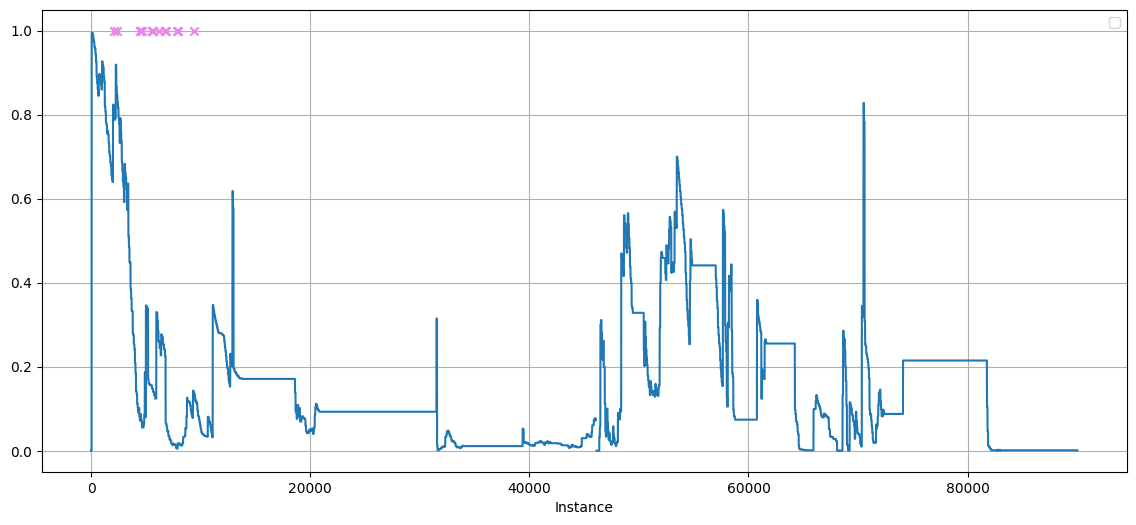

<ipython-input-49-0976e48d5393>:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


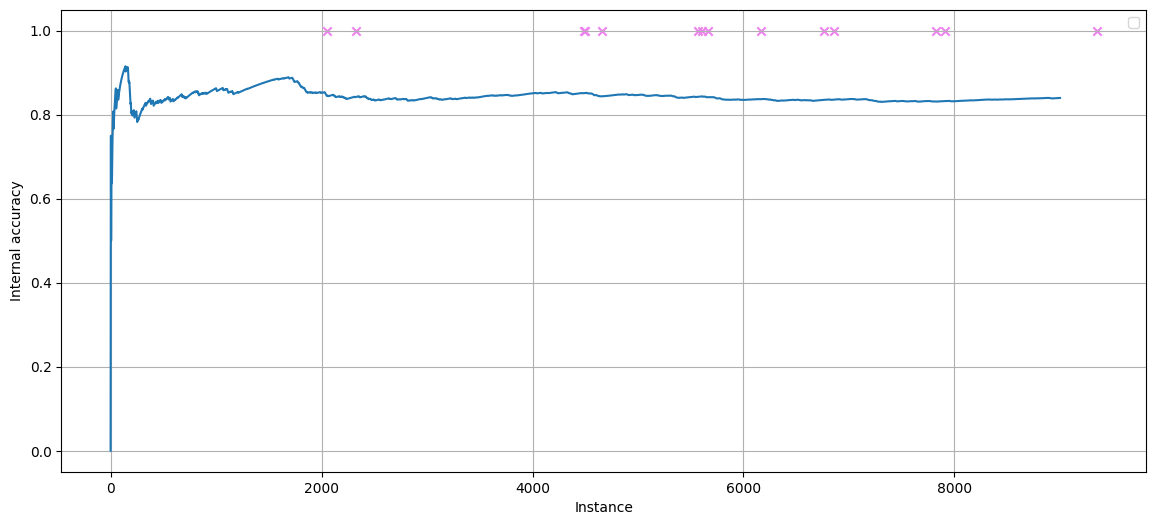

<ipython-input-49-0976e48d5393>:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


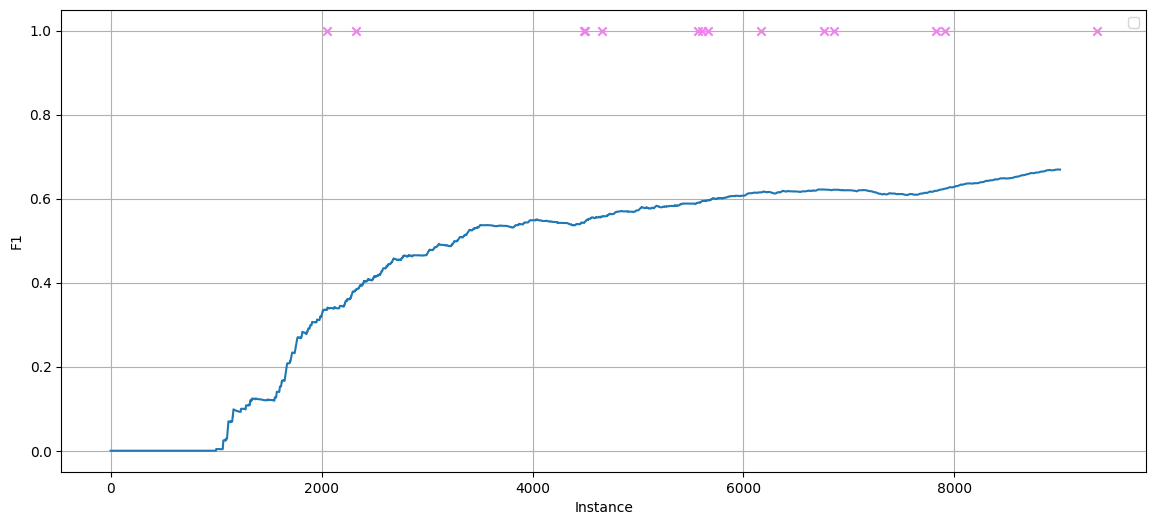

<ipython-input-49-0976e48d5393>:193: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


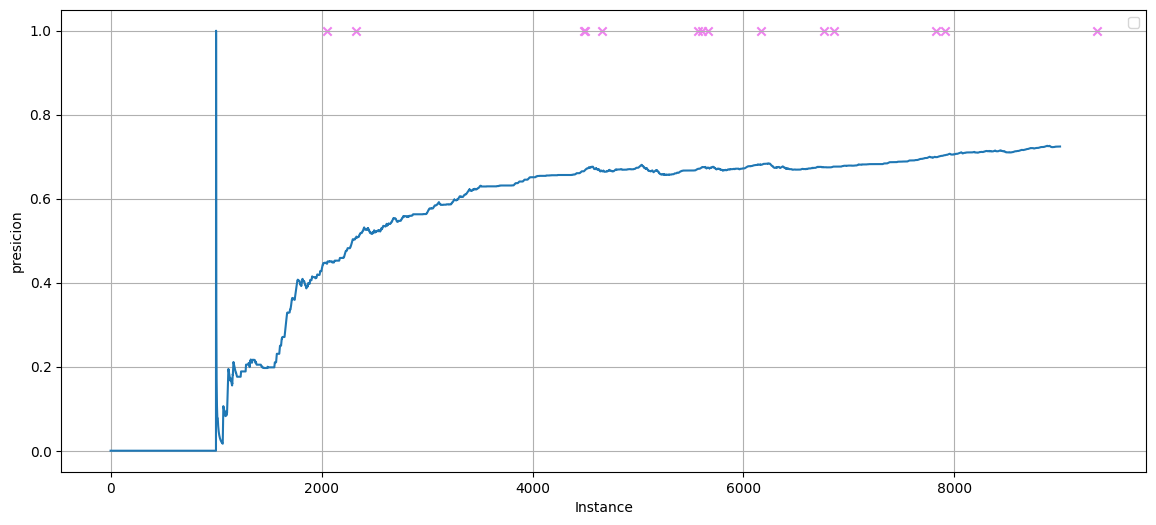

<ipython-input-49-0976e48d5393>:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


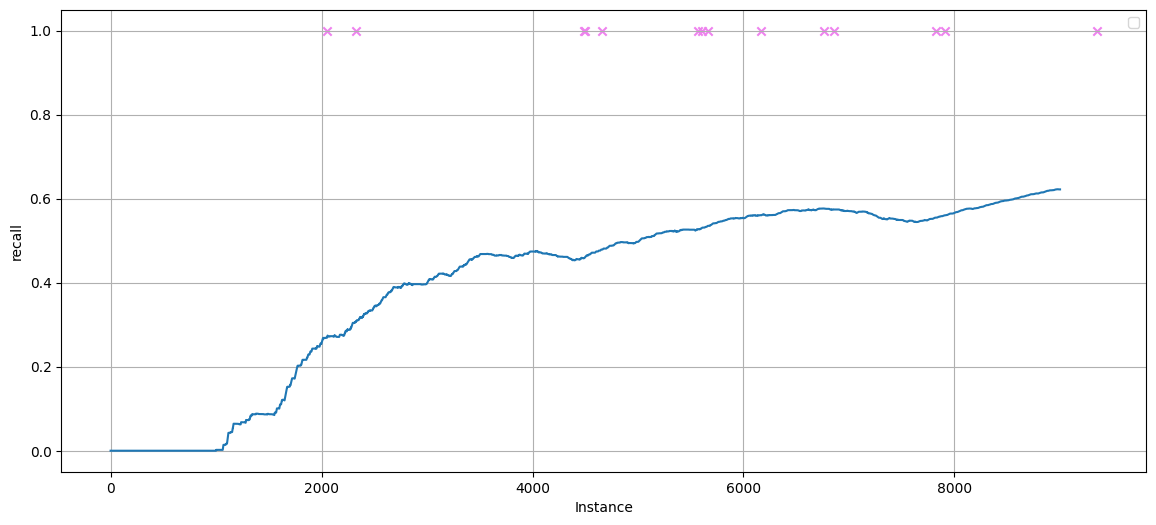

<ipython-input-49-0976e48d5393>:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


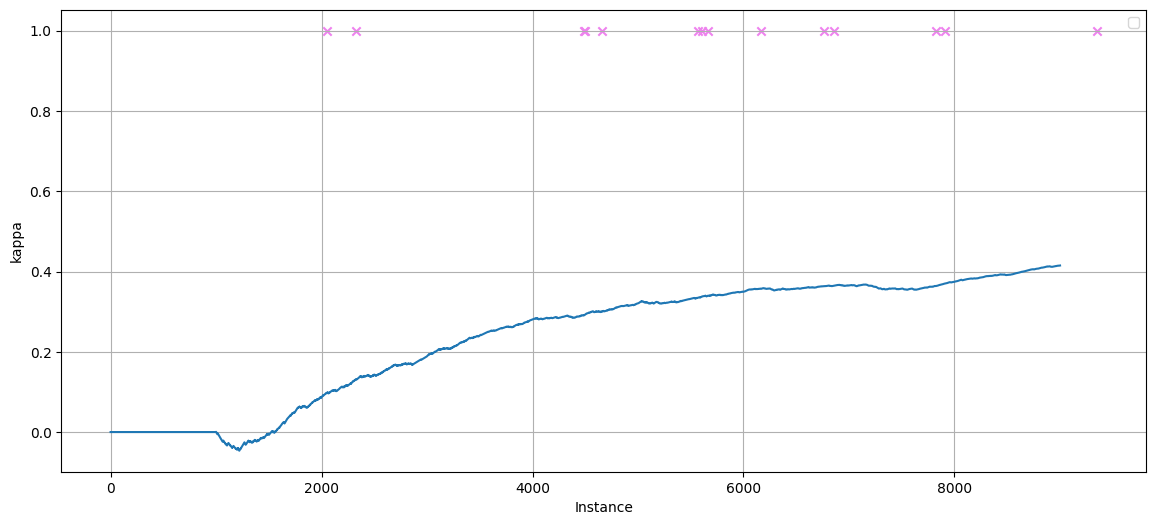

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Elec2'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/HTC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/HATC_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/KNN_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json']
model_names = ['HTC','HATC','KNN']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
wyniki = update_table(wyniki, (metrics,times))

In [ ]:
# Separate ADWIN and KSWIN for mean aggregation (ignoring model)
mean_adwin_kswin = (
    wyniki[wyniki["Detector"].isin(["ADWIN", "KSWIN"])]
    .groupby(["Dataset", "Detector"])
    .mean(numeric_only=True)
    .reset_index()
)

# Keep DLBB values with model differentiation
dlbb = wyniki[wyniki["Detector"] == "DLBB"].reset_index(drop=True)

# Combine the results
comparison_df = pd.concat([mean_adwin_kswin, dlbb], ignore_index=True)

# Optional: Sort for better readability
comparison_df = comparison_df.sort_values(by=["Dataset", "Detector"]).reset_index(drop=True)


In [ ]:
comparison_df

Metric,Dataset,Detector,accuracy,f1,kappa,n_drifts,presicion,recall,Time,Model
0,Agrawal,ADWIN,0.655965,0.639552,0.362132,26.0,0.758741,0.552725,18.081425,NaN
1,Agrawal,DLBB,0.667963,0.646079,0.381447,16.0,0.796269,0.543556,907.561411,HATC
2,Agrawal,DLBB,0.652188,0.631172,0.354076,16.0,0.758399,0.540499,704.035867,HTC
3,Agrawal,DLBB,0.635637,0.605196,0.322176,15.0,0.737285,0.513245,17722.897700,KNN
4,Agrawal,KSWIN,0.674072,0.657605,0.393821,9.5,0.799644,0.558456,88.634739,NaN
5,Covertype,ADWIN,0.304543,0.223836,0.196271,56.5,0.272163,0.190192,64.239355,NaN
6,Covertype,DLBB,0.760275,0.430678,0.262114,11.0,0.705801,0.309885,1850.267009,HATC
7,Covertype,DLBB,0.762830,0.417032,0.254637,10.0,0.755167,0.288053,1548.635069,HTC
8,Covertype,DLBB,0.757498,0.427144,0.258227,9.0,0.681275,0.311098,79008.888589,KNN
9,Covertype,KSWIN,0.359198,0.187507,0.175227,233.5,0.199389,0.176962,68.811443,NaN


In [ ]:
wyniki[wyniki['Detector'] == 'DLBB']

Metric,Dataset,Detector,Model,accuracy,f1,kappa,n_drifts,presicion,recall,Time
2,Sine2.0,DLBB,HATC,0.770273,0.828960,0.581965,12.0,0.878294,0.784873,461.978933
3,Sine2.0,DLBB,HTC,0.770495,0.828593,0.582675,8.0,0.881242,0.781880,309.933600
4,Sine2.0,DLBB,KNN,0.769051,0.826870,0.580232,11.0,0.881410,0.778687,8701.248779
2,Agrawal,DLBB,HATC,0.667963,0.646079,0.381447,16.0,0.796269,0.543556,907.561411
3,Agrawal,DLBB,HTC,0.652188,0.631172,0.354076,16.0,0.758399,0.540499,704.035867
4,Agrawal,DLBB,KNN,0.635637,0.605196,0.322176,15.0,0.737285,0.513245,17722.897700
2,Stagger,DLBB,HATC,0.825372,0.885170,0.677950,0.0,0.948668,0.829639,32.395553
3,Stagger,DLBB,HTC,0.825372,0.885170,0.677950,0.0,0.948668,0.829639,21.330700
4,Stagger,DLBB,KNN,0.828705,0.888154,0.684120,23.0,0.952084,0.832269,367.913946
2,Hyperplane,DLBB,HATC,0.684626,0.723916,0.432297,9.0,0.771222,0.682078,819.516278


In [ ]:
wyniki[wyniki['Detector'] != 'DLBB'][['Dataset','Detector','accuracy' ,	'f1', 	'kappa' ,	'n_drifts' ,	'presicion' ,	'recall' ,	'Time']].groupby(['Dataset','Detector']).mean()

Metric               accuracy        f1     kappa  n_drifts  presicion  \
Dataset    Detector                                                      
Agrawal    ADWIN     0.655965  0.639552  0.362132      26.0   0.758741   
           KSWIN     0.674072  0.657605  0.393821       9.5   0.799644   
Covertype  ADWIN     0.304543  0.223836  0.196271      56.5   0.272163   
           KSWIN     0.359198  0.187507  0.175227     233.5   0.199389   
Elec2      ADWIN     0.696623  0.694997  0.445017      42.0   0.733295   
           KSWIN     0.684515  0.677085  0.421705     112.0   0.721821   
Hyperplane ADWIN     0.680182  0.720354  0.424263      20.0   0.764009   
           KSWIN     0.681848  0.723028  0.427232       8.0   0.764010   
PokerHand  ADWIN     0.426683  0.219231  0.000301       0.0   0.428571   
           KSWIN     0.444568  0.111924  0.003537      24.0   0.435978   
Sine2.0    ADWIN     0.782493  0.840451  0.604255      34.0   0.891100   
           KSWIN     0.780604  0.838811  0.600737       9.0   0.888417   
Stagger    ADWIN     0.830704  0.889892  0.687877      24.0   0.954604   
           KSWIN     0.826150  0.885883  0.679372       0.5   0.949324   

Metric                 recall       Time  
Dataset    Detector                       
Agrawal    ADWIN     0.552725  18.081425  
           KSWIN     0.558456  88.634739  
Covertype  ADWIN     0.190192  64.239355  
           KSWIN     0.176962  68.811443  
Elec2      ADWIN     0.660500  22.716102  
           KSWIN     0.637572  74.038078  
Hyperplane ADWIN     0.681418  19.692535  
           KSWIN     0.686262  98.104574  
PokerHand  ADWIN     0.147287  34.134057  
           KSWIN     0.064717  83.196414  
Sine2.0    ADWIN     0.795250  11.081259  
           KSWIN     0.794452  80.637599  
Stagger    ADWIN     0.833396   8.759248  
           KSWIN     0.830391  72.267169

### dimensions plots

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Hyperplane_2'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 1000  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_5_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_10_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_20_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_50_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_100_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_200_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json'
]
model_names = ['Hyperplane_2','Hyperplane_5','Hyperplane_10','Hyperplane_20','Hyperplane_50','Hyperplane_100','Hyperplane_200']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
# wyniki = update_table(wyniki, (metrics,times))
wyniki = extract_metrics((metrics,times))

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master/HTC_ARF_delayed_label_Hyperplane_200_drift_point_6000.0_num_sam_10000_delay_1000_K:1000.json'

In [ ]:
wyniki.sort_values('Model')

Metric,Dataset,Detector,Model,accuracy,f1,kappa,n_drifts,presicion,recall,Time
0,Hyperplane_2,DLBB,Hyperplane_10,0.721951,0.767728,0.499410,9.0,0.799617,0.738285,NaN
1,Hyperplane_2,DLBB,Hyperplane_100,0.512331,0.520874,0.121525,13.0,0.573553,0.477058,NaN
2,Hyperplane_2,DLBB,Hyperplane_2,0.839147,0.885830,0.710440,9.0,0.943854,0.834526,NaN
3,Hyperplane_2,DLBB,Hyperplane_20,0.644746,0.684683,0.360511,11.0,0.721050,0.651807,NaN
4,Hyperplane_2,DLBB,Hyperplane_5,0.768385,0.812367,0.583077,6.0,0.868761,0.762848,NaN
5,Hyperplane_2,DLBB,Hyperplane_50,0.567985,0.578685,0.220737,12.0,0.632553,0.533272,NaN


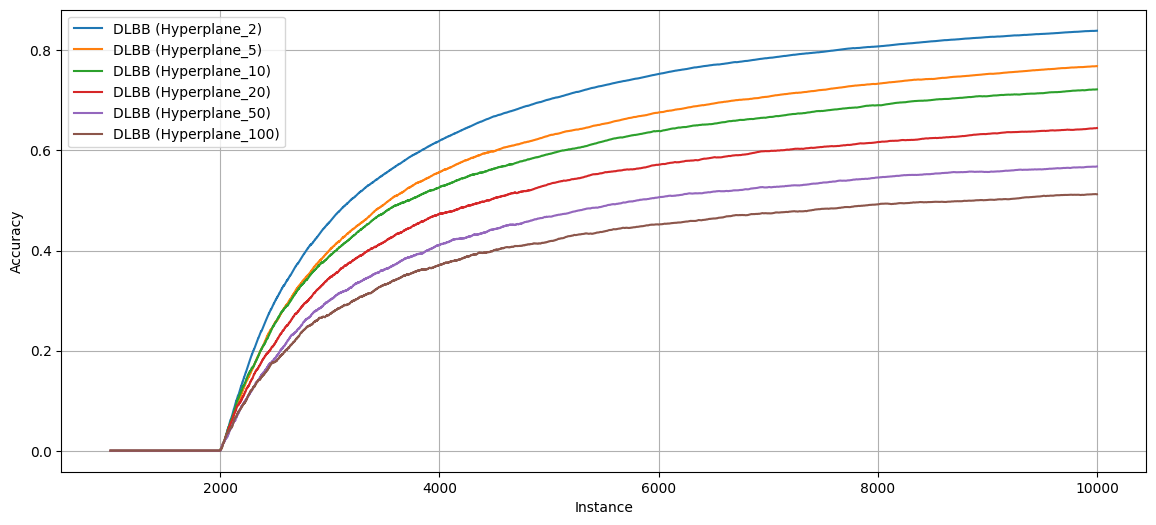

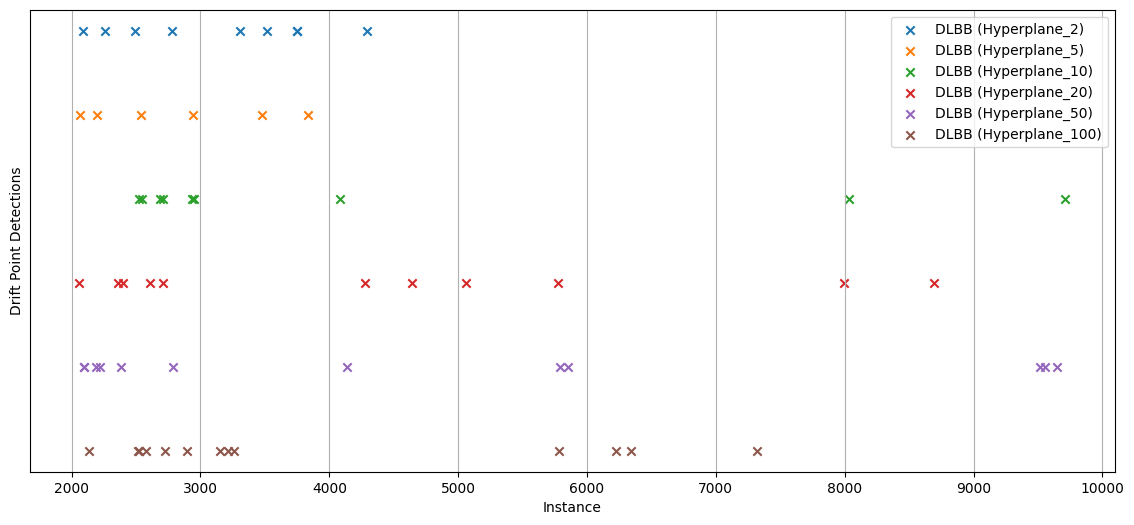

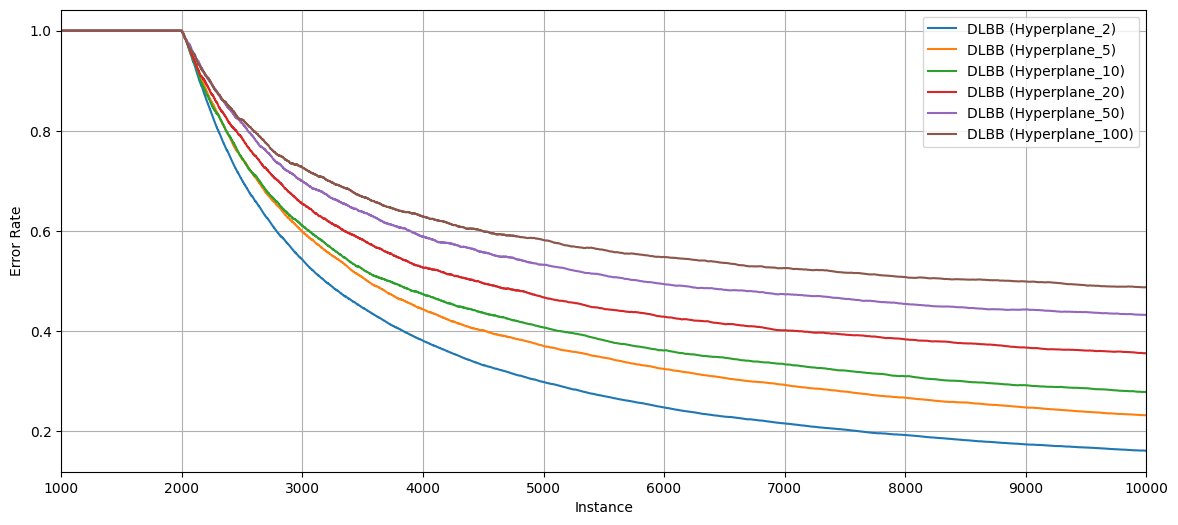

<ipython-input-16-0976e48d5393>:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


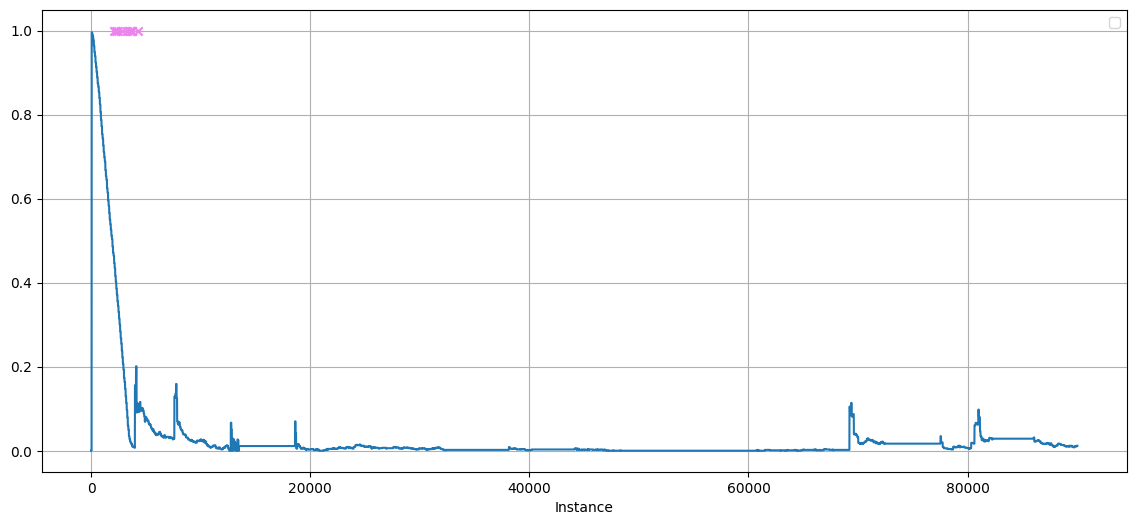

<ipython-input-16-0976e48d5393>:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


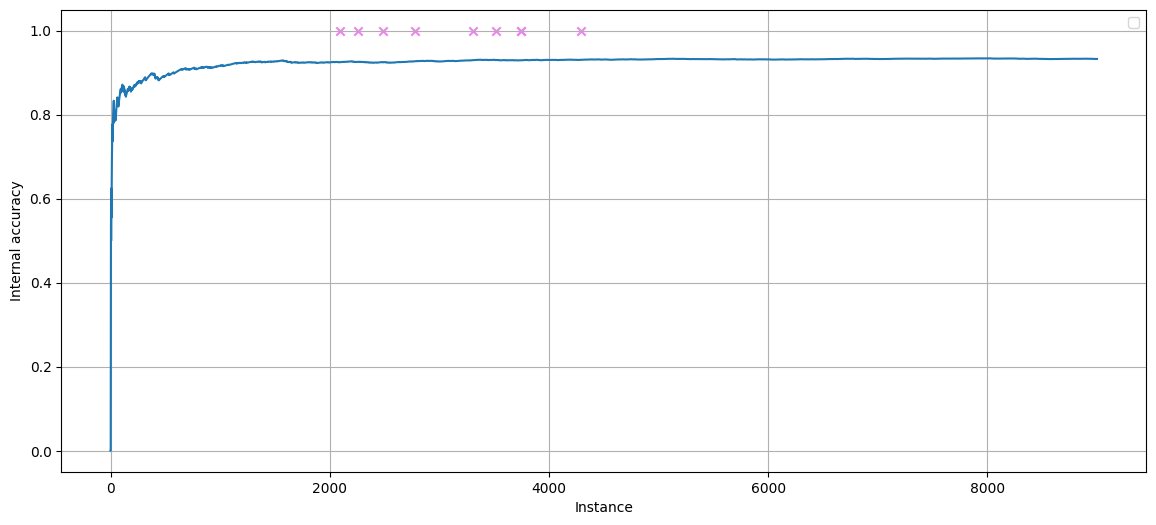

<ipython-input-16-0976e48d5393>:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


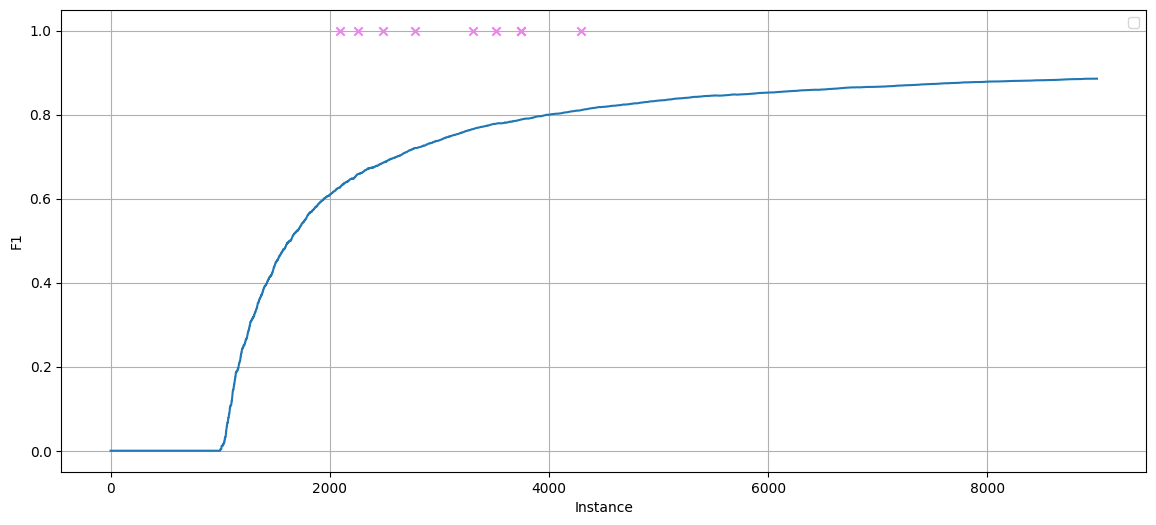

<ipython-input-16-0976e48d5393>:193: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


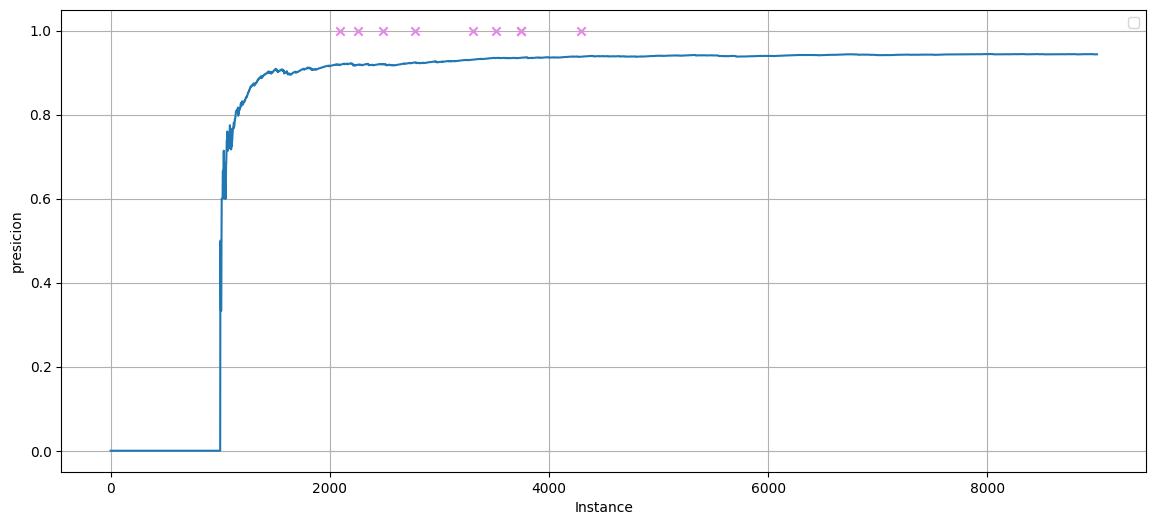

<ipython-input-16-0976e48d5393>:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


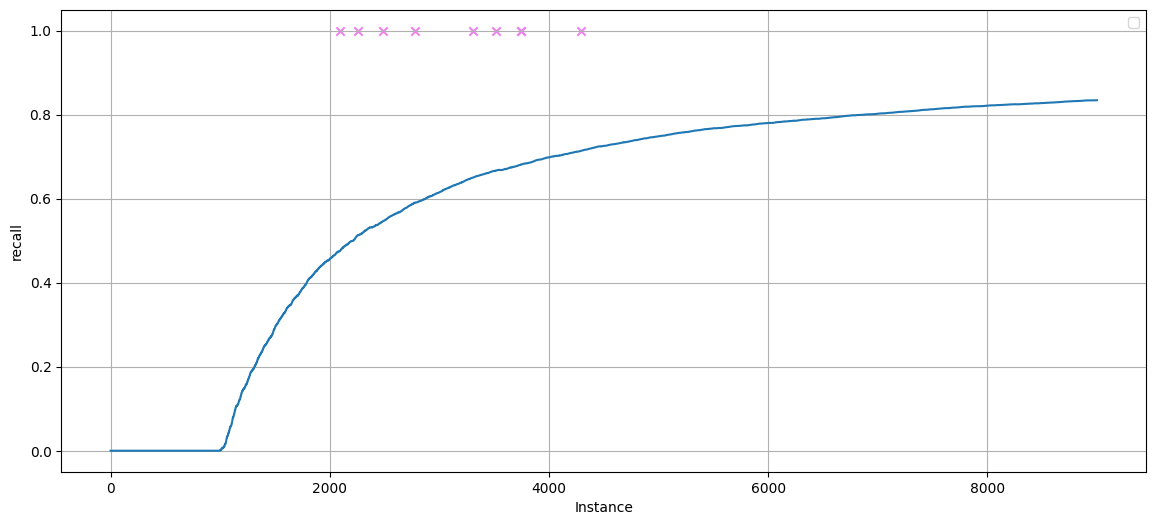

<ipython-input-16-0976e48d5393>:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


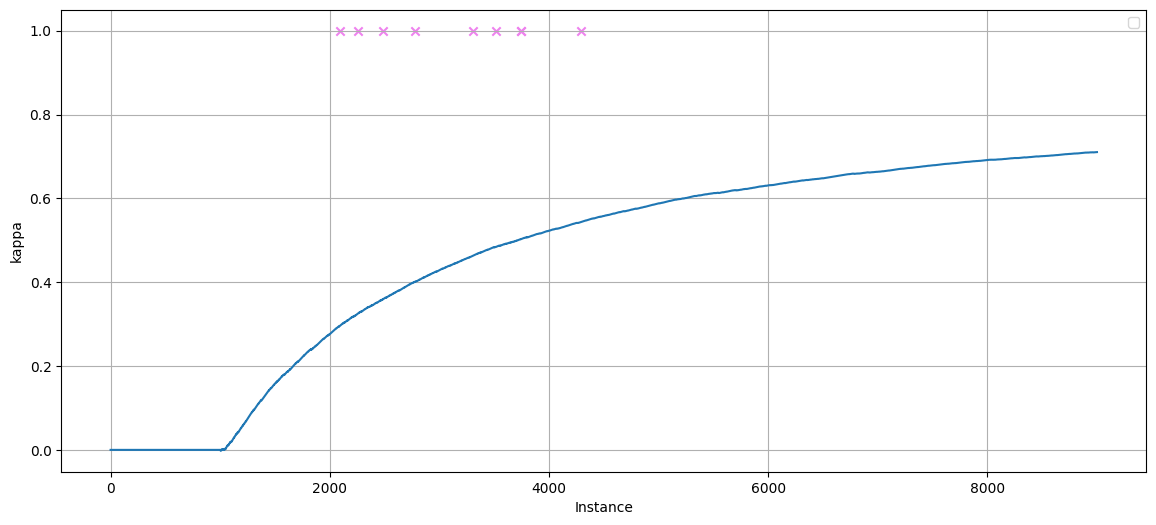

In [ ]:
# Define parameters
num_samples = 10000
delay = 1000  # Define a specific delay here
images_dir = '/content/gdrive/My Drive/Colab Notebooks/magisterka/final_results_master'  # Define the directory where the JSON will be saved
dataset_name = 'Hyperplane_2'
drift_point = 0.6 * num_samples  # Calculate drift point for filename
K = 500  # DLBBDetector parameter
external_model = "ARF"
inside_model = 'HTC'
images_dirs = [f'{images_dir}/{inside_model}_{external_model}_delayed_label_{dataset_name}_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_5_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_10_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_20_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_50_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_100_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json',
               f'{images_dir}/{inside_model}_{external_model}_delayed_label_Hyperplane_200_drift_point_{drift_point}_num_sam_{num_samples}_delay_{delay}_K:{K}.json'
]
model_names = ['Hyperplane_2','Hyperplane_5','Hyperplane_10','Hyperplane_20','Hyperplane_50','Hyperplane_100','Hyperplane_200']
metrics,times = generate_plots(images_dirs,model_names, dataset_name, drift_point, num_samples, delay, K, drift=None, only_dlbb = True)
# wyniki = update_table(wyniki, (metrics,times))
wyniki = extract_metrics((metrics,times))

In [ ]:
wyniki.sort_values('Model')

Metric,Dataset,Detector,Model,accuracy,f1,kappa,n_drifts,presicion,recall,Time
0,Hyperplane_2,DLBB,Hyperplane_10,0.721951,0.767728,0.499410,9.0,0.799617,0.738285,NaN
1,Hyperplane_2,DLBB,Hyperplane_100,0.512331,0.520874,0.121525,13.0,0.573553,0.477058,NaN
2,Hyperplane_2,DLBB,Hyperplane_2,0.839147,0.885830,0.710440,9.0,0.943854,0.834526,NaN
3,Hyperplane_2,DLBB,Hyperplane_20,0.644746,0.684683,0.360511,11.0,0.721050,0.651807,NaN
4,Hyperplane_2,DLBB,Hyperplane_5,0.768385,0.812367,0.583077,6.0,0.868761,0.762848,NaN
5,Hyperplane_2,DLBB,Hyperplane_50,0.567985,0.578685,0.220737,12.0,0.632553,0.533272,NaN
